# Contexto:
Este conjunto de dados contém informações relevantes de clientes de uma loja. Ao todo são 29 features

# Fonte:
Esse conjunto de dados foi retirado do <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">Kaggle</a>.

# Objetivo: 
- O meu objetivo nesse projeto é desenvolver um modelo de machine learning de clusterização, sendo a segmentação de clientes o enfoque, para que dessa forma, a empresa possa implementar estratégias de marketing e propaganda mais efetivas, visando o aumento de lucro. 

# Entendendo Features
- **ID**: identificador exclusivo do cliente

- **Year_Birth**: Ano de nascimento do cliente

- **Education**: nível de escolaridade do cliente

- **Marital_Status**: estado civil do cliente

- **Income**: renda familiar anual do cliente

- **Kidhome**: Número de crianças na residência do cliente

- **Teenhome**: Número de adolescentes na residência do cliente

- **Dt_Customer**: Data de cadastro do cliente na empresa

- **Recency**: número de dias desde a última compra do cliente

- **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

- **MntWines**: Valor gasto em vinho nos últimos 2 anos

- **MntFruits**: Valor gasto com frutas nos últimos 2 anos

- **MntMeatProducts**: Valor gasto com carne nos últimos 2 anos

- **MntFishProducts**: Valor gasto com pescado nos últimos 2 anos

- **MntSweetProducts**: Valor gasto em doces nos últimos 2 anos

- **MntGoldProds**: Valor gasto em ouro nos últimos 2 anos

- **NumDealsPurchases**: Número de compras realizadas com desconto

- **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

- **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

- **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

- **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

- **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

- **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

- **NumWebPurchases**: Quantidade de compras realizadas pelo site da empresa

- **NumCatalogPurchases**: Número de compras feitas usando um catálogo

- **NumStorePurchases**: Número de compras feitas diretamente nas lojas

- **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês

# Importando bibliotecas

In [805]:
# Bibliotecas para visualização e manipulação de dados
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importando modelos e ferramentas para tratamento de dados, PCA e Clustering
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# Removendo warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 300)

# Definindo um estilo para os gráficos
mpl.style.use("ggplot")

mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["figure.dpi"] = 180
mpl.rcParams["axes.grid"] = True
mpl.rcParams["font.size"] = 12

# Importando funções úteis

In [742]:
def set_annotate(fig, h=False, porcentages=False):
    """
    Adiciona anotações aos retângulos em um gráfico de barras.

    Args:
        fig: matplotlib.figure.Figure 
            Objeto figura matplotlib.
        h: bool
            Se verdadeiro, a anotação será horizontal; caso contrário, será vertical.
        porcentage: bool: 
            Se verdadeiro, os valores serão exibidos como porcentagens; caso contrário, como valores brutos.
    """
    
    for ax in fig.get_axes():
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            if width > 0 and height > 0:
                if h:
                    reference = width 
                    xy = (p.get_x() + width, p.get_y() + height / 2)
                    ha="left"
                    va="center"
                else:
                    reference =  height
                    xy = (p.get_x() + width / 2, p.get_y() + height)
                    ha="center"
                    va="bottom"
                if reference < 0.01:
                    text = "{:.2e}".format(reference)
                else:
                    text = "{:.2f}%".format(reference * 100) if porcentages else "{:.2f}".format(reference)
                
                ax.annotate(text, xy=xy, ha=ha, va=va, fontsize=12, color="black", xytext=(5, 0),
                            textcoords="offset points")

# Lendo, entendendo e limpando o dataset

In [743]:
customers = pd.read_csv("marketing_campaign.csv", sep="\t")

In [744]:
customers.head().T

0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4  
ID                         5324  
Year_Birth                 1981  
Education                   PhD  
Marital_Status          Married  
Income                  58293.0  
Kidhome                       1  
Teenhome                      0  
Dt_Customer          19-01-2014  
Recency                      94  
MntWines                    173  
MntFruits                    43  
MntMeatProducts             118  
MntFishProducts              46  
MntSweetProducts             27  
MntGoldProds                 15  
NumDealsPurchases             5  
NumWebPurchases               5  
NumCatalogPurchases           3  
NumStorePurchases             6  
NumWebVisitsMonth             5  
AcceptedCmp3                  0  
AcceptedCmp4                  0  
AcceptedCmp5                  0  
AcceptedCmp1                  0  
AcceptedCmp2                  0  
Complain                      0  
Z_CostContact                 3  
Z_Revenue                    11  
Response                      0

In [745]:
to_drop = ["ID", "Z_CostContact", "Z_Revenue"]

customers = customers.drop(to_drop, axis=1)

Optei por remover Z_CostContact e Z_Revenue(constantes) e ID pois essas features não representam uma informação significativa

In [746]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

<h4>Observações: </h4>
<ul> 
    <li>Há 2240 observações no dataset</li>
    <li>Ao todo, há 26 features no dataset, sendo apenas 2 categóricas, e 23 numéricas, assumindo Dt_Customer como datetime, mas é preciso convertê-la</li>  
</ul>

In [747]:
customers.Dt_Customer = pd.to_datetime(customers.Dt_Customer, format="%d-%m-%Y")

In [748]:
for column in customers.select_dtypes(include=["object", "category"]).columns:
    customers[column] = customers[column].replace(" ", np.nan)

customers.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [749]:
print(f"Apenas {(len(customers[customers.Income.isnull()]) / customers.shape[0]) * 100:.2f}% dos clientes possuem Income nula")

Apenas 1.07% dos clientes possuem Income nula


Irei remover dados com Income nula para evitar introduzir estimativas e prejudicar a clusterização

In [750]:
print(f"Há {customers[customers.duplicated()].shape[0] * 100 / customers.shape[0]:.2f}% observações duplicadas")

Há 8.12% observações duplicadas


Da mesa forma, irei remover os valores duplicados

In [751]:
customers = customers.dropna()

In [752]:
customers = customers.drop_duplicates()

In [753]:
print(f"O novo dataset sem valores duplicados e sem valores nulos contém {customers.shape[0]} observações")

O novo dataset sem valores duplicados e sem valores nulos contém 2034 observações


Para fins de clareza, vou susbtituir a coluna Year_Birt por Age e a coluna Marital_Status por Livin_With, o que preserva as informações das colunas

In [754]:
customers["Age"] = 2021 - customers["Year_Birth"]
customers["Living_With"]= customers["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
                                                    "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 
                                                    "Divorced":"Alone", "Single":"Alone"})
customers = customers.drop(["Year_Birth", "Marital_Status"], axis=1)

Usei o ano de 2021 nesse caso pois foi o ano em que o dataset foi publicado no Kaggle

Da mesma maneira, criarei a feature Customer_Since_Days em alternativa ao Dt_Customer

In [755]:
customers["Customer_Since_Days"] = (max(customers.Dt_Customer) - customers["Dt_Customer"]).dt.days.apply(lambda x: max(x, 1))


customers = customers.drop(["Dt_Customer"], axis=1)

In [756]:
for column in customers.columns.tolist():

    print(customers[column].value_counts())
    print("-="*20)

Education
Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Income
7500.0     12
47025.0     3
34176.0     3
48432.0     3
35860.0     3
           ..
58398.0     1
33249.0     1
55250.0     1
25252.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Kidhome
0    1174
1     819
2      41
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Teenhome
0    1049
1     936
2      49
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Recency
56    30
29    28
46    28
2     28
54    27
30    27
71    27
3     27
72    27
65    27
49    27
92    26
0     26
81    26
80    26
24    25
48    25
51    25
38    25
68    24
19    24
86    24
13    24
1     24
8     24
87    23
40    23
11    23
27    23
9     23
12    23
37    23
94    23
4     23
23    23
74    22
25    22
10    22
50    22
77    22
28    2

Claramente há algum erro em relação a idade de algum ou alguns clientes, pois a maior idade é de 128 anos

In [757]:
customers[customers.Age > 100]

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
192  2n Cycle  36640.0        1         0       99        15          6   
239  2n Cycle  60182.0        0         1       23         8          0   
339       PhD  83532.0        0         0       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp3  \
192                8                7                 4  ...             0   
239                5                7                 0  ...             0   
339              562              104                64  ...             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Response  Age  Living_With  Customer_Since_Days  
192         0  121        Alone                  276  
239         0  128        Alone                   43  
339         0  122      Partner                  276  

[3 rows x 26 columns]

Vou optar por remover essas observações estranhas

In [758]:
customers = customers.drop(customers[customers.Age > 100].index, axis=0)

In [759]:
customers[customers.Age > 100]

Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Age, Living_With, Customer_Since_Days]
Index: []

[0 rows x 26 columns]

In [760]:
customers.describe().T

count          mean           std     min      25%  \
Income               2031.0  52346.328902  25533.464407  1730.0  35482.0   
Kidhome              2031.0      0.443131      0.535987     0.0      0.0   
Teenhome             2031.0      0.508616      0.546191     0.0      0.0   
Recency              2031.0     48.838996     28.976637     0.0     24.0   
MntWines             2031.0    305.248646    337.298807     0.0     23.0   
MntFruits            2031.0     26.257509     39.709576     0.0      2.0   
MntMeatProducts      2031.0    167.728213    226.732978     0.0     16.0   
MntFishProducts      2031.0     37.446578     54.804255     0.0      3.0   
MntSweetProducts     2031.0     27.147710     41.509472     0.0      1.0   
MntGoldProds         2031.0     43.750862     51.615450     0.0      9.0   
NumDealsPurchases    2031.0      2.339734      1.934593     0.0      1.0   
NumWebPurchases      2031.0      4.101920      2.757694     0.0      2.0   
NumCatalogPurchases  2031.0      2.671098      2.938306     0.0      0.0   
NumStorePurchases    2031.0      5.786805      3.238826     0.0      3.0   
NumWebVisitsMonth    2031.0      5.325455      2.438391     0.0      3.0   
AcceptedCmp3         2031.0      0.074348      0.262400     0.0      0.0   
AcceptedCmp4         2031.0      0.076317      0.265570     0.0      0.0   
AcceptedCmp5         2031.0      0.071886      0.258362     0.0      0.0   
AcceptedCmp1         2031.0      0.065485      0.247441     0.0      0.0   
AcceptedCmp2         2031.0      0.012802      0.112445     0.0      0.0   
Complain             2031.0      0.009355      0.096291     0.0      0.0   
Response             2031.0      0.153619      0.360672     0.0      0.0   
Age                  2031.0     52.091581     11.663994    25.0     44.0   
Customer_Since_Days  2031.0    352.613983    202.521557     1.0    178.0   

                         50%      75%       max  
Income               51529.0  68474.5  666666.0  
Kidhome                  0.0      1.0       2.0  
Teenhome                 0.0      1.0       2.0  
Recency                 49.0     74.0      99.0  
MntWines               176.0    505.0    1493.0  
MntFruits                8.0     33.0     199.0  
MntMeatProducts         68.0    230.0    1725.0  
MntFishProducts         12.0     50.0     259.0  
MntSweetProducts         8.0     33.5     262.0  
MntGoldProds            24.0     56.0     321.0  
NumDealsPurchases        2.0      3.0      15.0  
NumWebPurchases          4.0      6.0      27.0  
NumCatalogPurchases      2.0      4.0      28.0  
NumStorePurchases        5.0      8.0      13.0  
NumWebVisitsMonth        6.0      7.0      20.0  
AcceptedCmp3             0.0      0.0       1.0  
AcceptedCmp4             0.0      0.0       1.0  
AcceptedCmp5             0.0      0.0       1.0  
AcceptedCmp1             0.0      0.0       1.0  
AcceptedCmp2             0.0      0.0       1.0  
Complain                 0.0      0.0       1.0  
Response                 0.0      0.0       1.0  
Age                     51.0     62.0      81.0  
Customer_Since_Days    352.0    528.5     699.0

In [761]:
customers.describe(include=["object", "category"])

Education Living_With
count         2031        2031
unique           5           2
top     Graduation     Partner
freq          1019        1301

In [762]:
customers.Customer_Since_Days.mean()

352.61398325947806

<h4>Observações: </h4>
<ul> 
    <li>Income visivelmente tem muitos outliers, o valor máximo equivale a aproximadamente 10 vezes a Income referente a até 75% dos clientes</li>
    <li>A média de dias sem comprar é de 48</li>  
    <li>A média de dias que um cliente está com a empresa de 352 dias</li>
    <li>Os clientes, por uma vantagem significativa, tendem a gastar mais com vinhos</li>
    <li>O número de compras na loja supera o número de compras na internet</li>
</ul>

# Análise Exploratória

## Análise Univariada 

In [763]:
customers.select_dtypes(exclude=["object", "category"]).columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Customer_Since_Days']

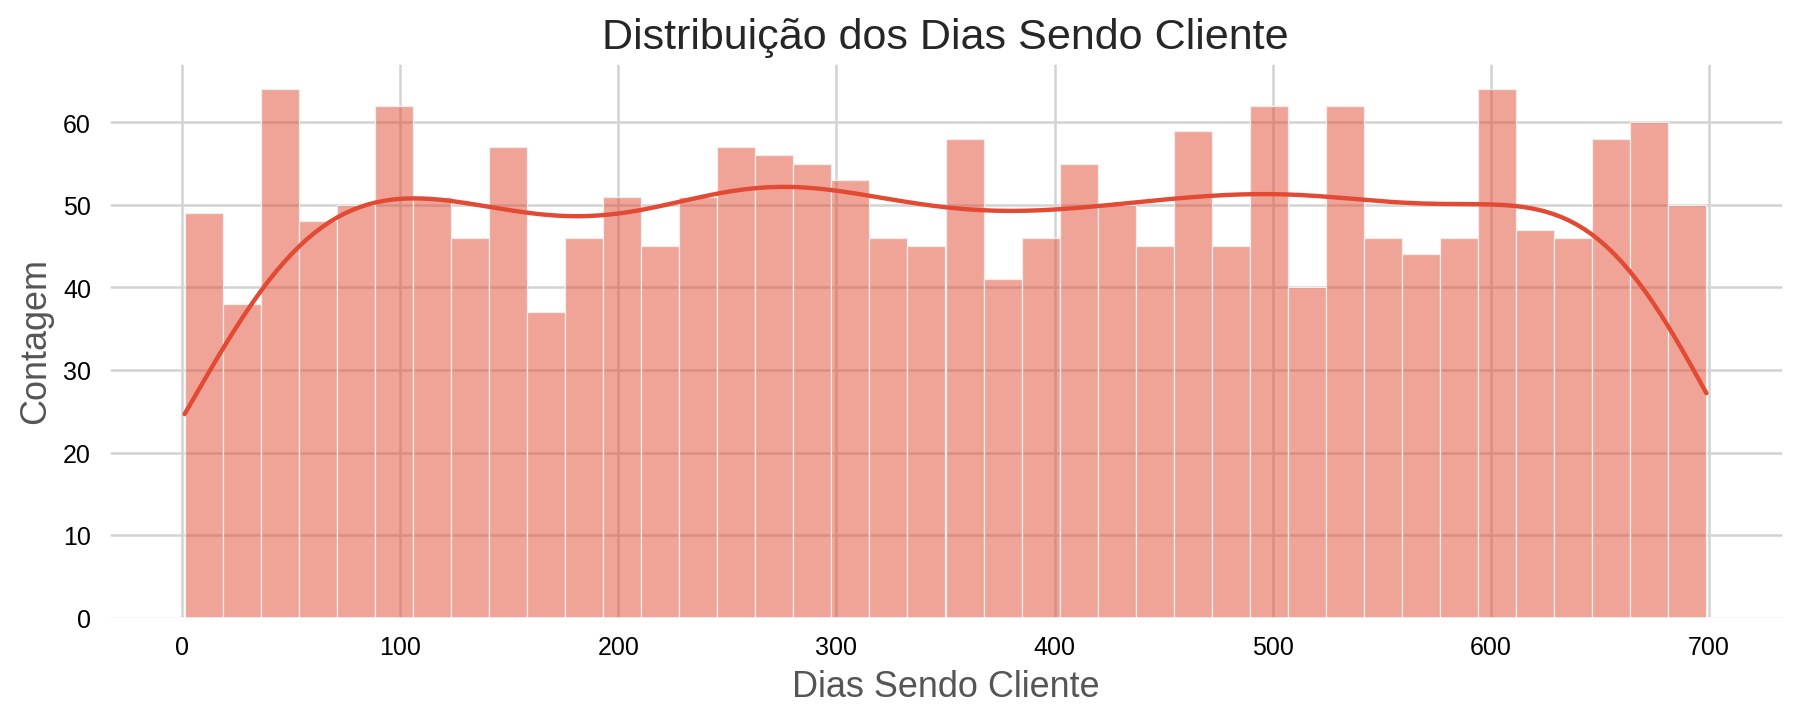

In [784]:
fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(customers.Customer_Since_Days, bins=40,  kde=True, ax=ax)

ax.set_xlabel("Dias Sendo Cliente")
ax.set_ylabel("Contagem")
ax.set_title("Distribuição dos Dias Sendo Cliente")


plt.show()

<h4>Observações: </h4>
<ul> 
    <li>Não há padrão aparentente em relação ao tempo em dias sendo cliente, o que é mostrado bem pelas curvas extremamente suaves do KDE</li>
</ul>

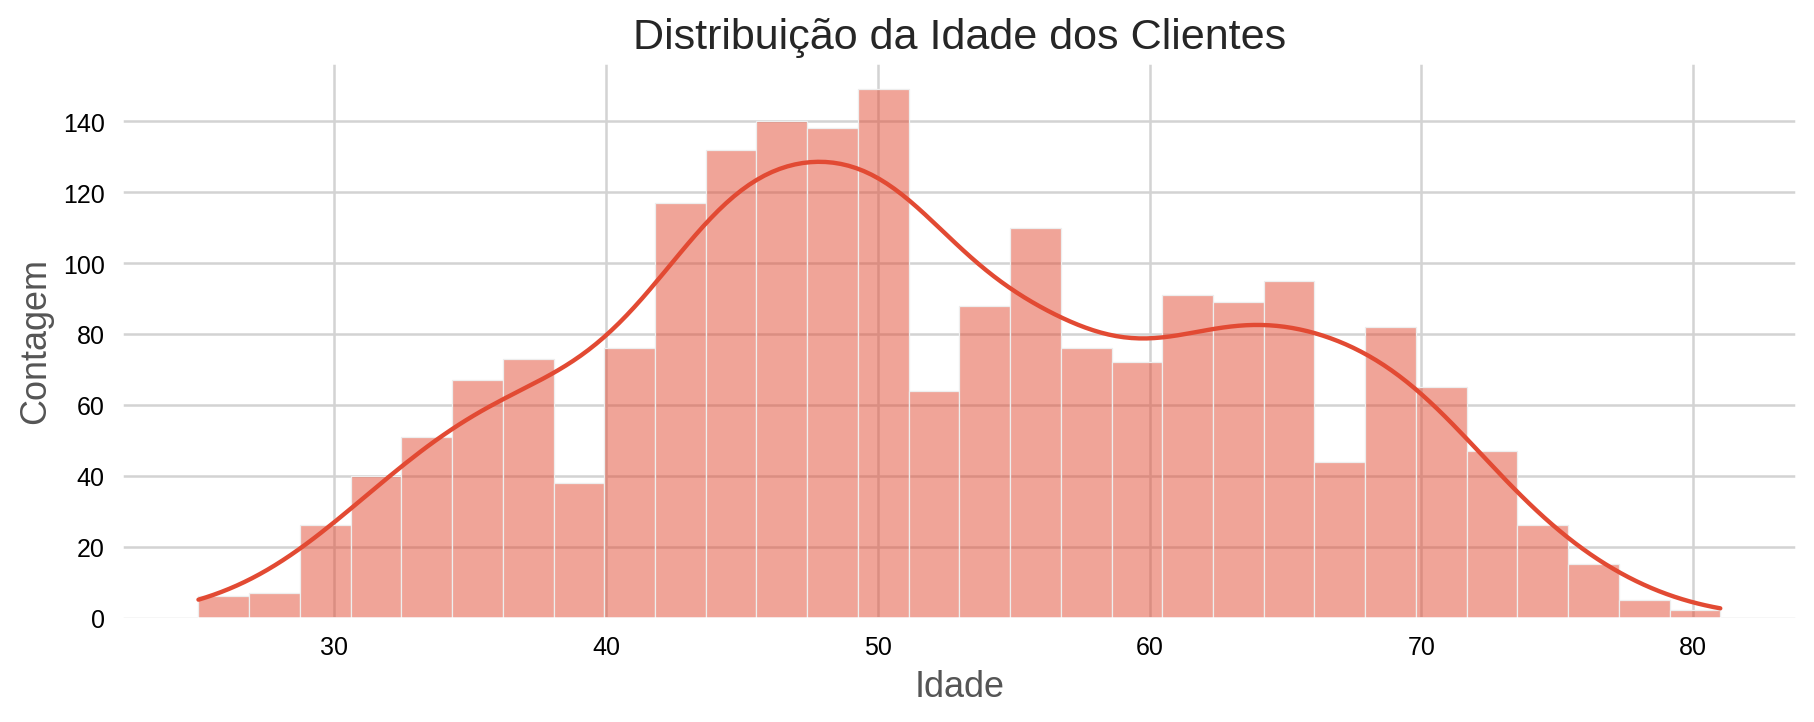

In [783]:
fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(customers.Age, bins=30, kde=True, ax=ax)

ax.set_xlabel("Idade")
ax.set_ylabel("Contagem")
ax.set_title("Distribuição da Idade dos Clientes")


plt.show()

<h4>Observações: </h4>
<ul> 
    <li>A mediana é ligeiramente menor que a média, sendo que a distribuição não possui pontos irregulares</li>
    <li>A idade em cerca de 90% dos clientes chega em até 69 anos</li>  
</ul>

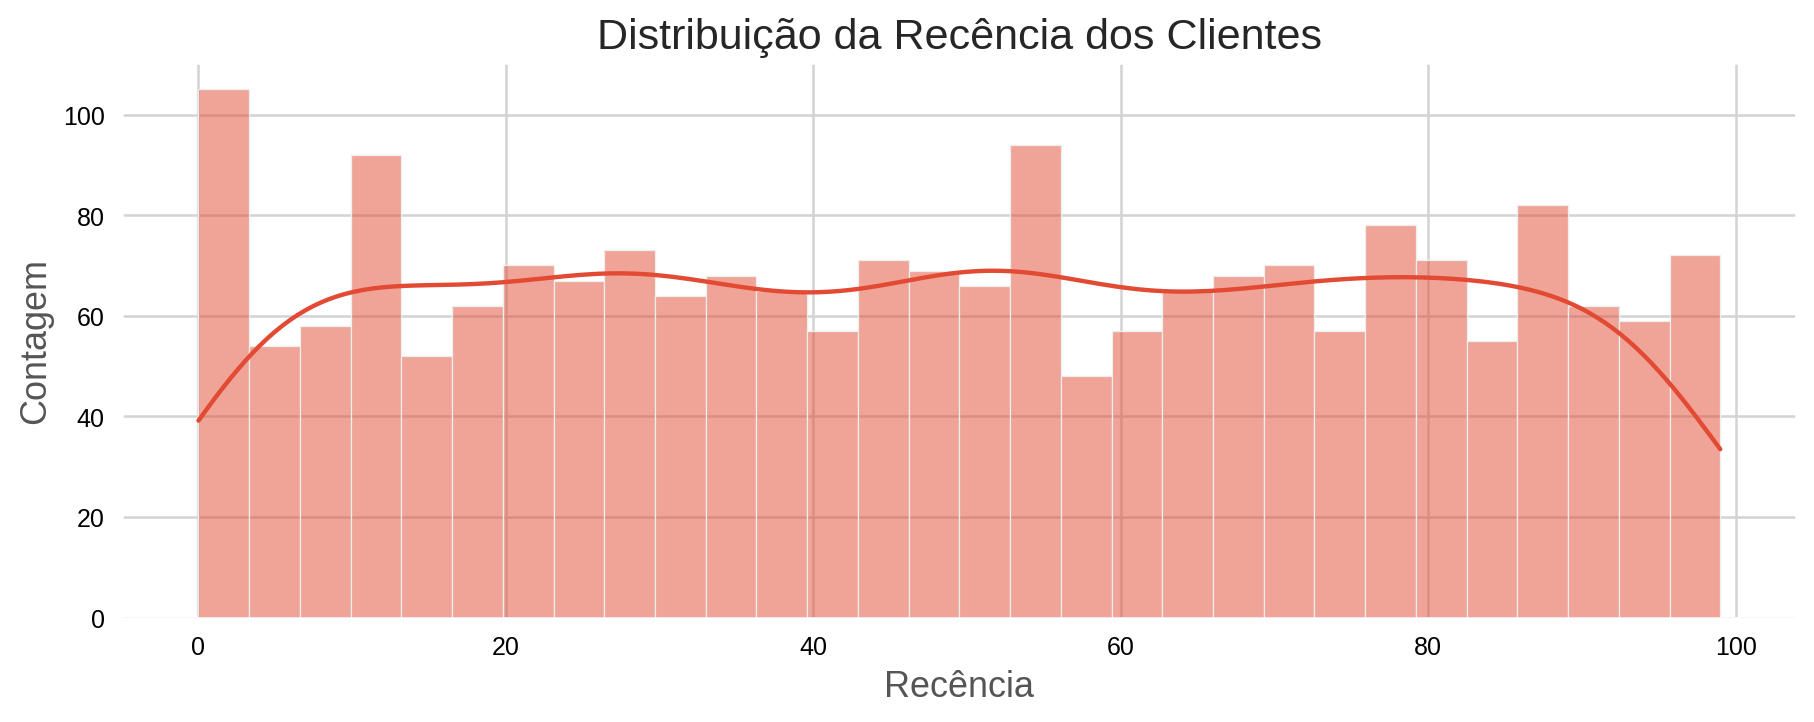

In [785]:
fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(customers.Recency, bins=30, kde=True, ax=ax)

ax.set_xlabel("Recência")
ax.set_ylabel("Contagem")
ax.set_title("Distribuição da Recência dos Clientes")


plt.show()

<h4>Observações: </h4>
<ul> 
    <li>Semelhante a primeira distribuição analisada, aqui não é possível notar um padrão significativo</li>
</ul>

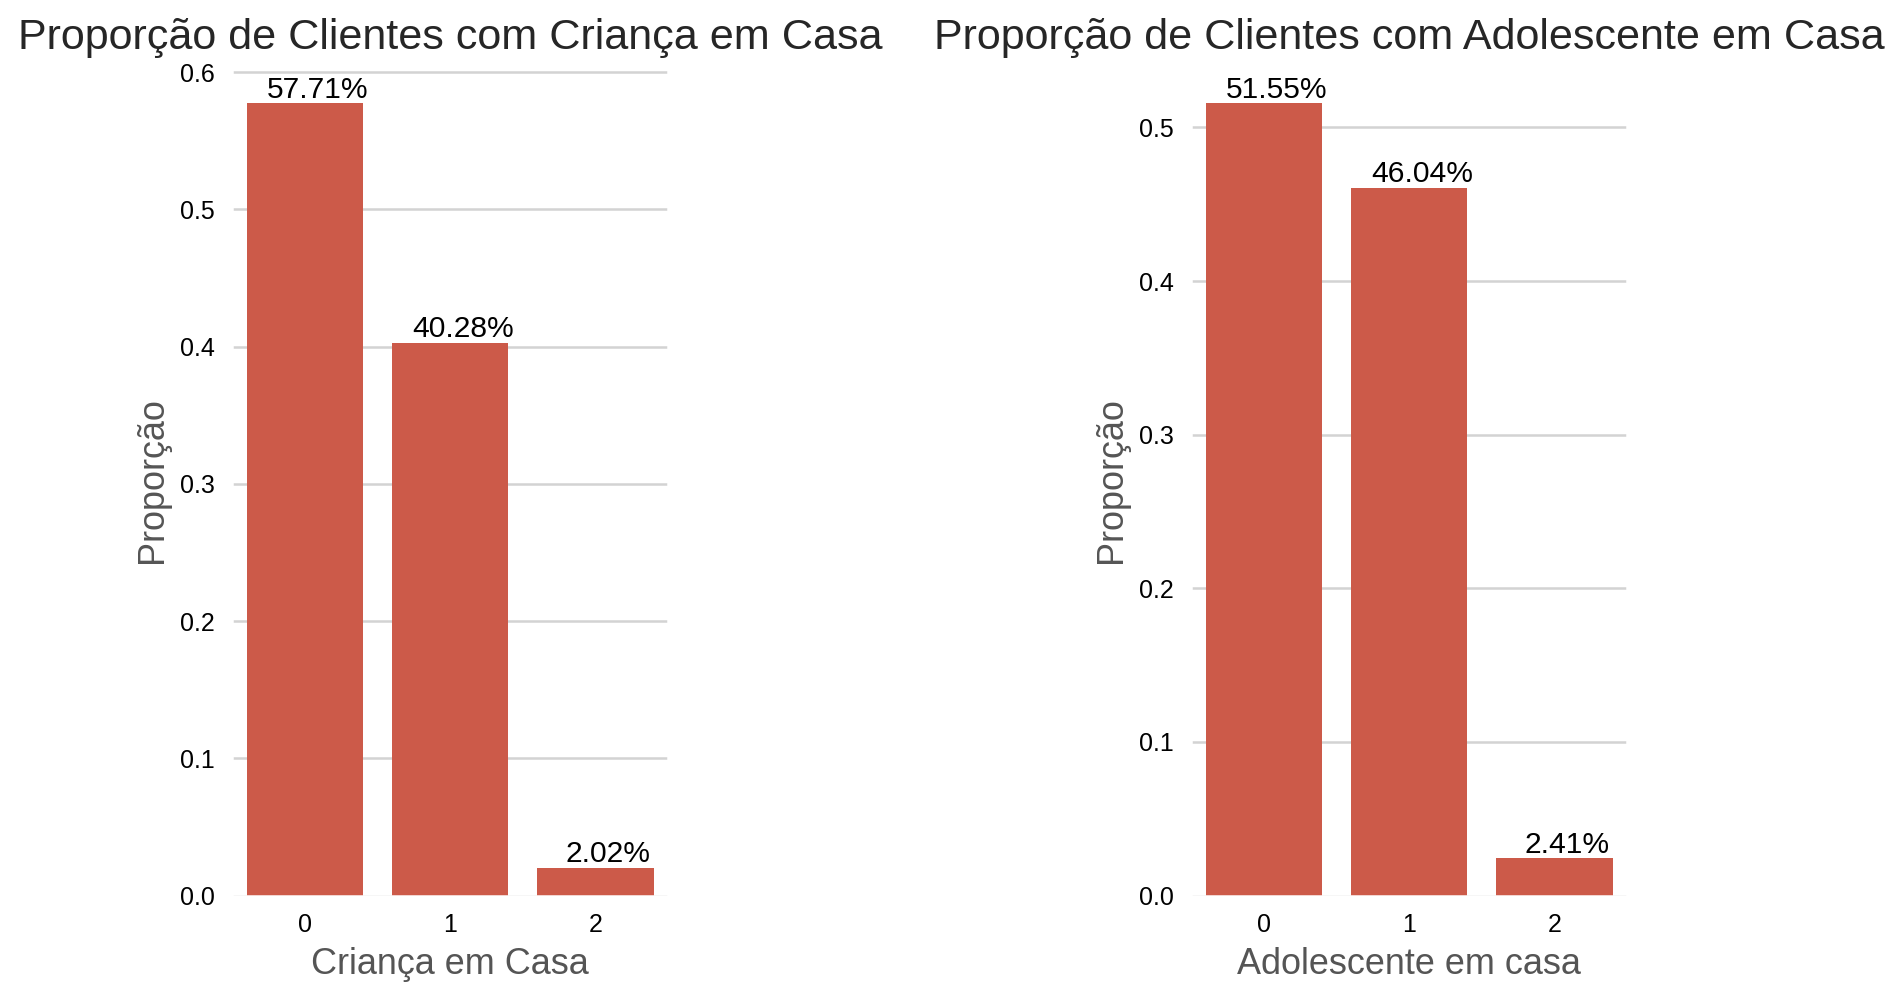

In [789]:
fig, ax = plt.subplots(figsize=(10,6), ncols=2)

plt.subplots_adjust(wspace=1.2)

sns.barplot(data=customers.Kidhome.value_counts(normalize=True).reset_index(), x="Kidhome", y="proportion", ax=ax[0])

ax[0].set_xlabel("Criança em Casa")
ax[0].set_ylabel("Proporção")
ax[0].set_title("Proporção de Clientes com Criança em Casa")


sns.barplot(data=customers.Teenhome.value_counts(normalize=True).reset_index(), x="Teenhome", y="proportion", ax=ax[1])

ax[1].set_xlabel("Adolescente em casa")
ax[1].set_ylabel("Proporção")
ax[1].set_title("Proporção de Clientes com Adolescente em Casa")


set_annotate(fig, porcentages=True)

plt.show()

<h4>Observações: </h4>
<ul> 
    <li>57.71% dos clientes não possuem crianças em casa, e 51.55% não possuem adolescentes em casa</li>
    <li>Apenas pouco mais de 2% possuem 2 crianças em casa</li>  
    <li>Semelhante a taxa das crianças, apenas pouco mais de 2% dos clientes possuem adolescentes em casa</li>
</ul>

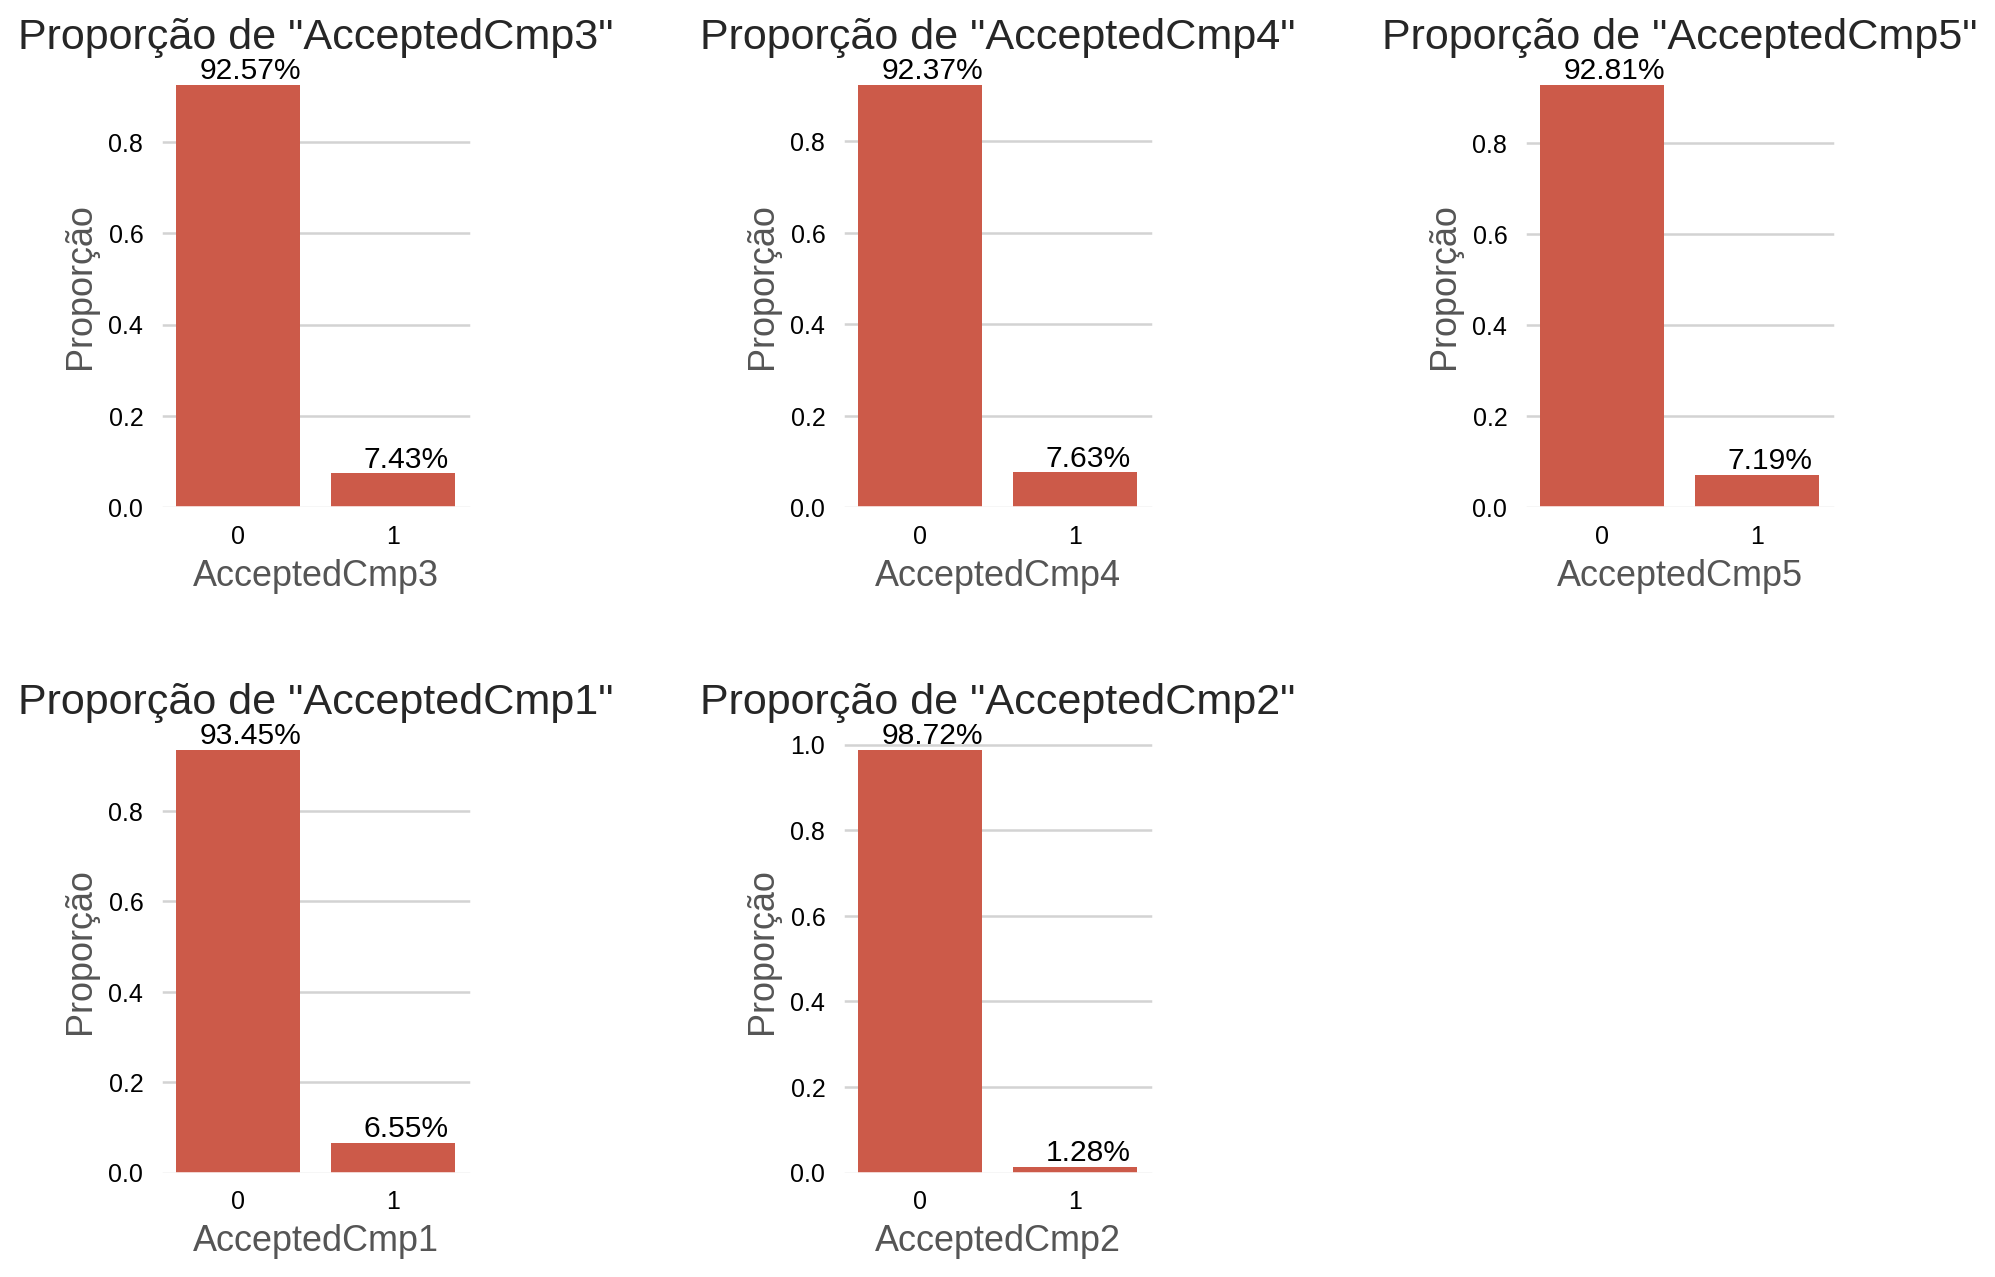

In [768]:
cols = ['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2', ]



fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=3)

ax[1,2].axis("off")   
ax = ax.flatten()

plt.subplots_adjust(wspace=1.2)
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols):
    sns.barplot(data=customers[col].value_counts(normalize=True).reset_index(), x=col, y="proportion", ax=ax[i])
    ax[i].set_title(f'Proporção de "{col}"')
    ax[i].set_ylabel("Proporção")


set_annotate(fig, porcentages=True)

plt.show()

<h4>Observações: </h4>
<ul> 
    <li>As campanhas de forma geral tiveram uma conversão bastante baixa, sendo que a campanha 4 possue uma ligeira vantagem em relação as outras</li>
    <li>A taxa de conversão da campanha 2 foram péssimas, sendo que menos de 1.3% dos clientes aceitaram a oferta nessa campanha</li>  

</ul>

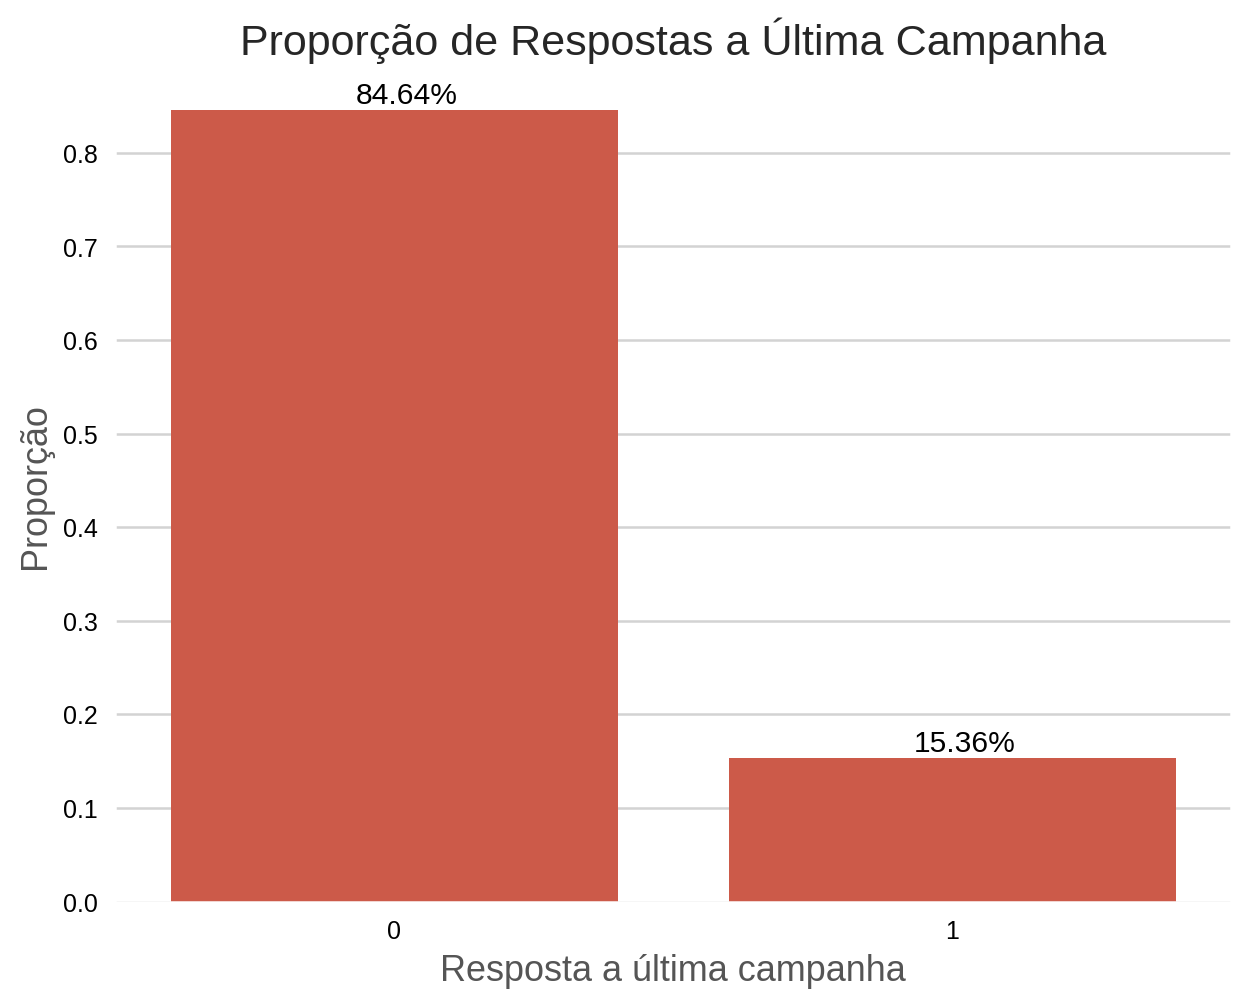

In [790]:
fig, ax = plt.subplots(figsize=(8,6))


sns.barplot(data=customers.Response.value_counts(normalize=True).reset_index(), x="Response", y="proportion", ax=ax)

ax.set_xlabel("Resposta a última campanha")
ax.set_ylabel("Proporção")
ax.set_title("Proporção de Respostas a Última Campanha")


set_annotate(fig, porcentages=True)

plt.show()

<h4>Observações: </h4>
<ul> 
    <li>A última campanha bate as outras com certa facilidade, sendo uma taixa de conversão de 15.36% </li>
</ul>

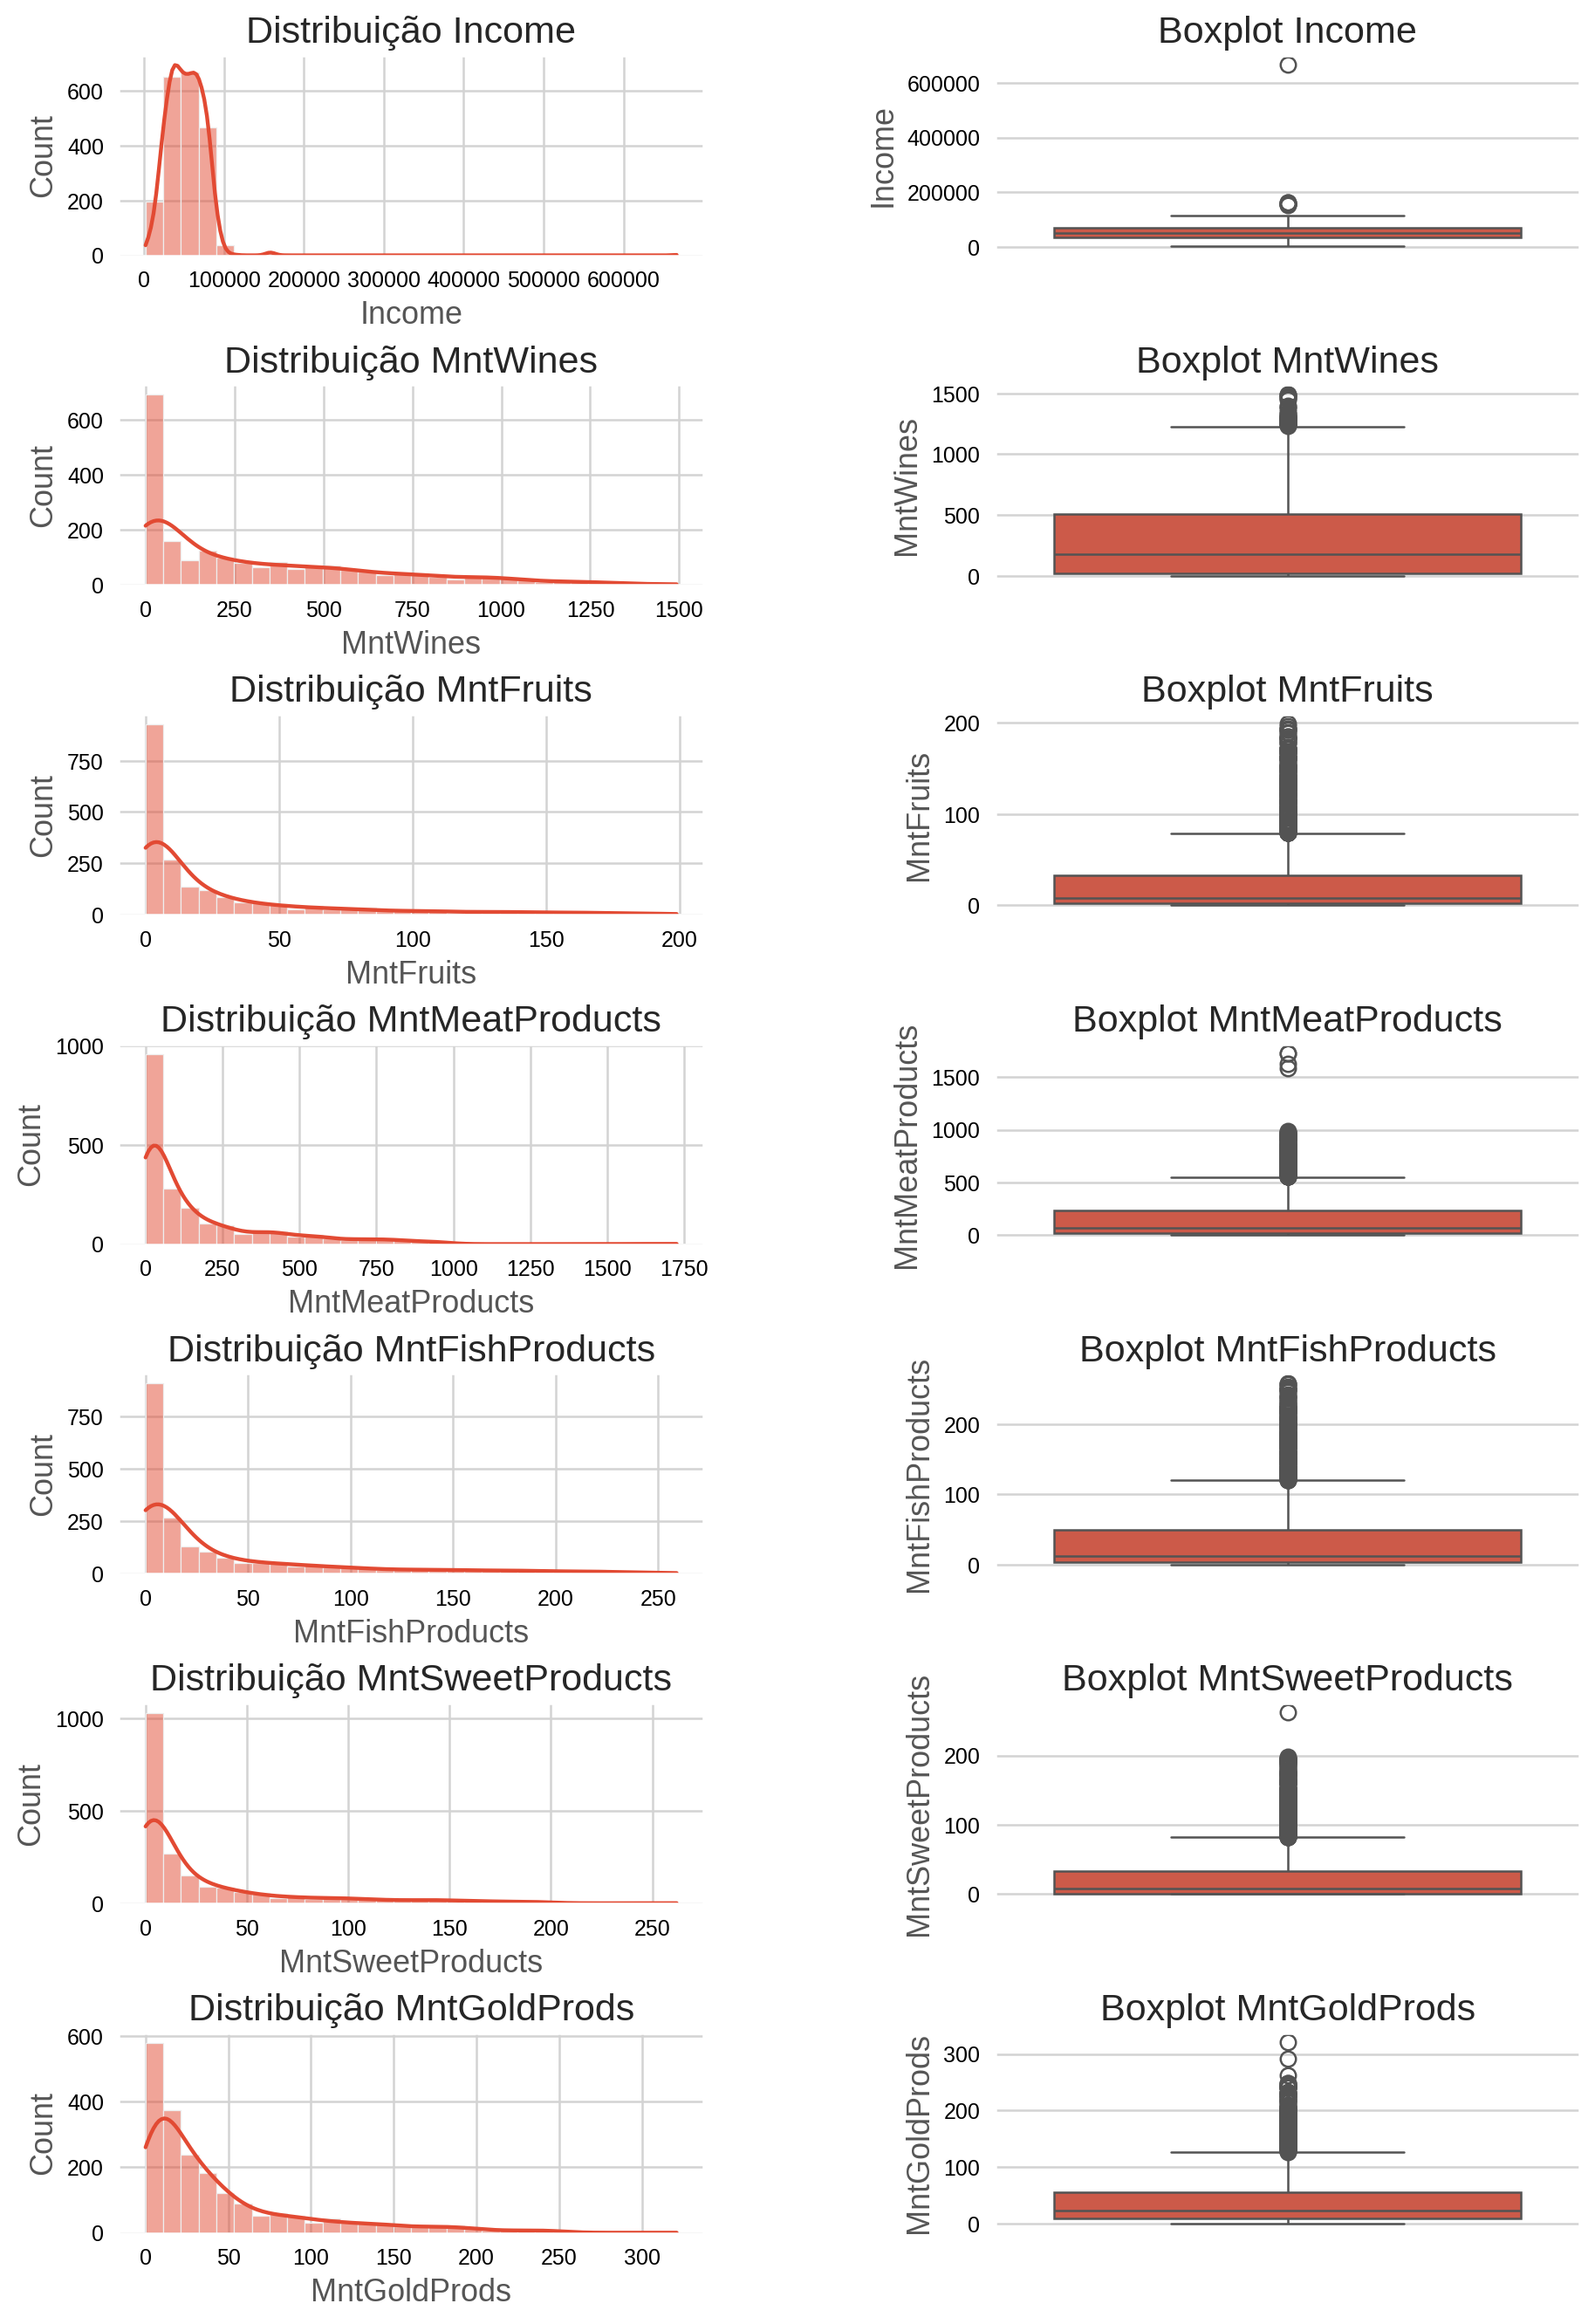

In [770]:
cols = ['Income','MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

fig, ax = plt.subplots(figsize=(12,18), nrows=7, ncols=2)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.65)

for i in range(0, 7):    
    col = cols[i]

    sns.histplot(data=customers, x=col, kde=True, bins=30, ax=ax[i][0])
    ax[i][0].set_title(f"Distribuição {col}")

    sns.boxplot(data=customers, y=col, ax=ax[i][1])
    ax[i][1].set_title(f"Boxplot {col}")


<h4>Observações: </h4>
<ul> 
    <li>Impressionantemente, todas as distribuições analisadas acima são assimétricas à direita</li>
    <li>É possível observar que existe uma gigantesca quantidade de outliers, dessa forma, fazer a remoção desses certamente será bem prejudicial</li>  
    <li>Income, assim como as outras, possui bastante outliers, mas um ponto específico chama a atenção, o mencionado ainda na etapa inicial do projeto. Existe um cliente que possui uma Income 10 vezes maior que o Income referente a 75% das pessoas</li>
    <li>Com a análise visual, pode-se perceber com facilidade que a categoria de vinhos faz bem mais sucesso entre os clientes</li>
</ul>

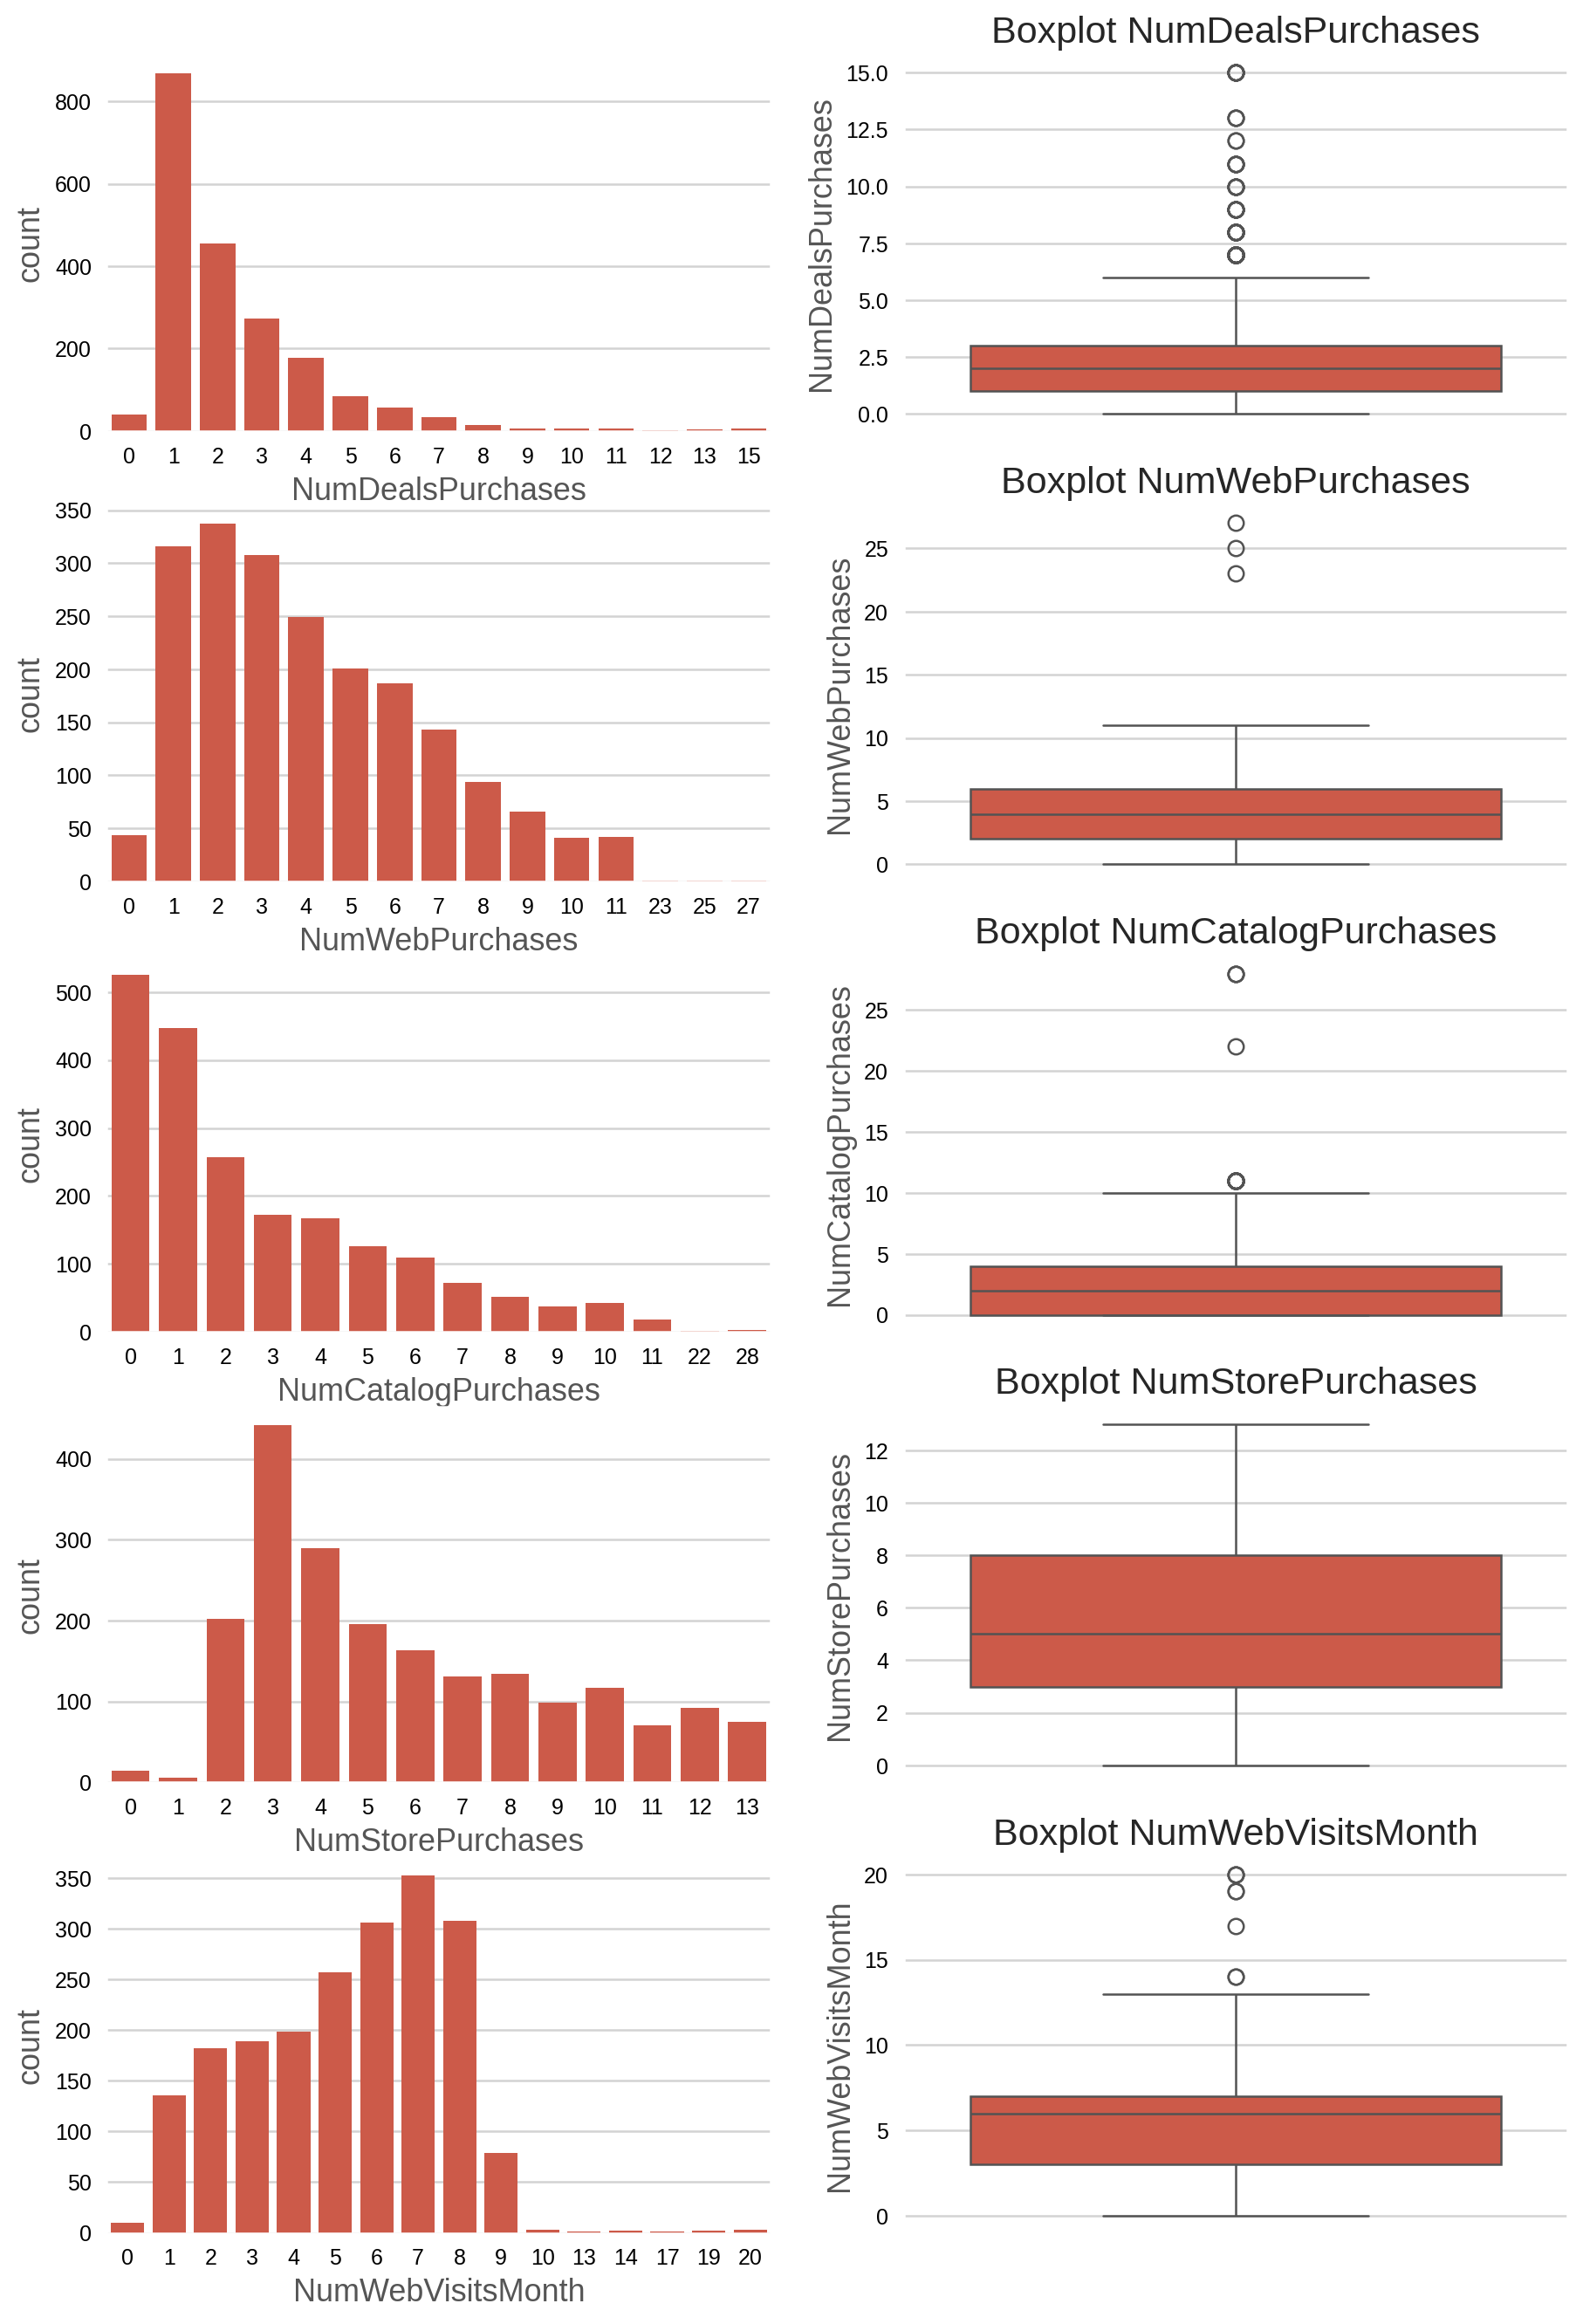

In [771]:
cols = ['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

fig, ax = plt.subplots(figsize=(12,18), nrows=5, ncols=2)

for i in range(0, 5):    
    col = cols[i]

    sns.countplot(x=customers[col], ax=ax[i][0])

    sns.boxplot(data=customers, y=col, ax=ax[i][1])
    ax[i][1].set_title(f"Boxplot {col}")



<h4>Observações: </h4>
<ul> 
    <li>A maior parte dos clientes tem de 1 a 4 compras online</li>
    <li>A maior parte dos clientes nunca comprou usando um catálogo</li>  
    <li>Até 3/4 dos clientes tem até 8 compras na loja</li>
    <li>A maior parcela dos clientes visita o site da loja, sendo que a maior parte deles chegam a acessar pelo menos 6 vezes</li>

</ul>

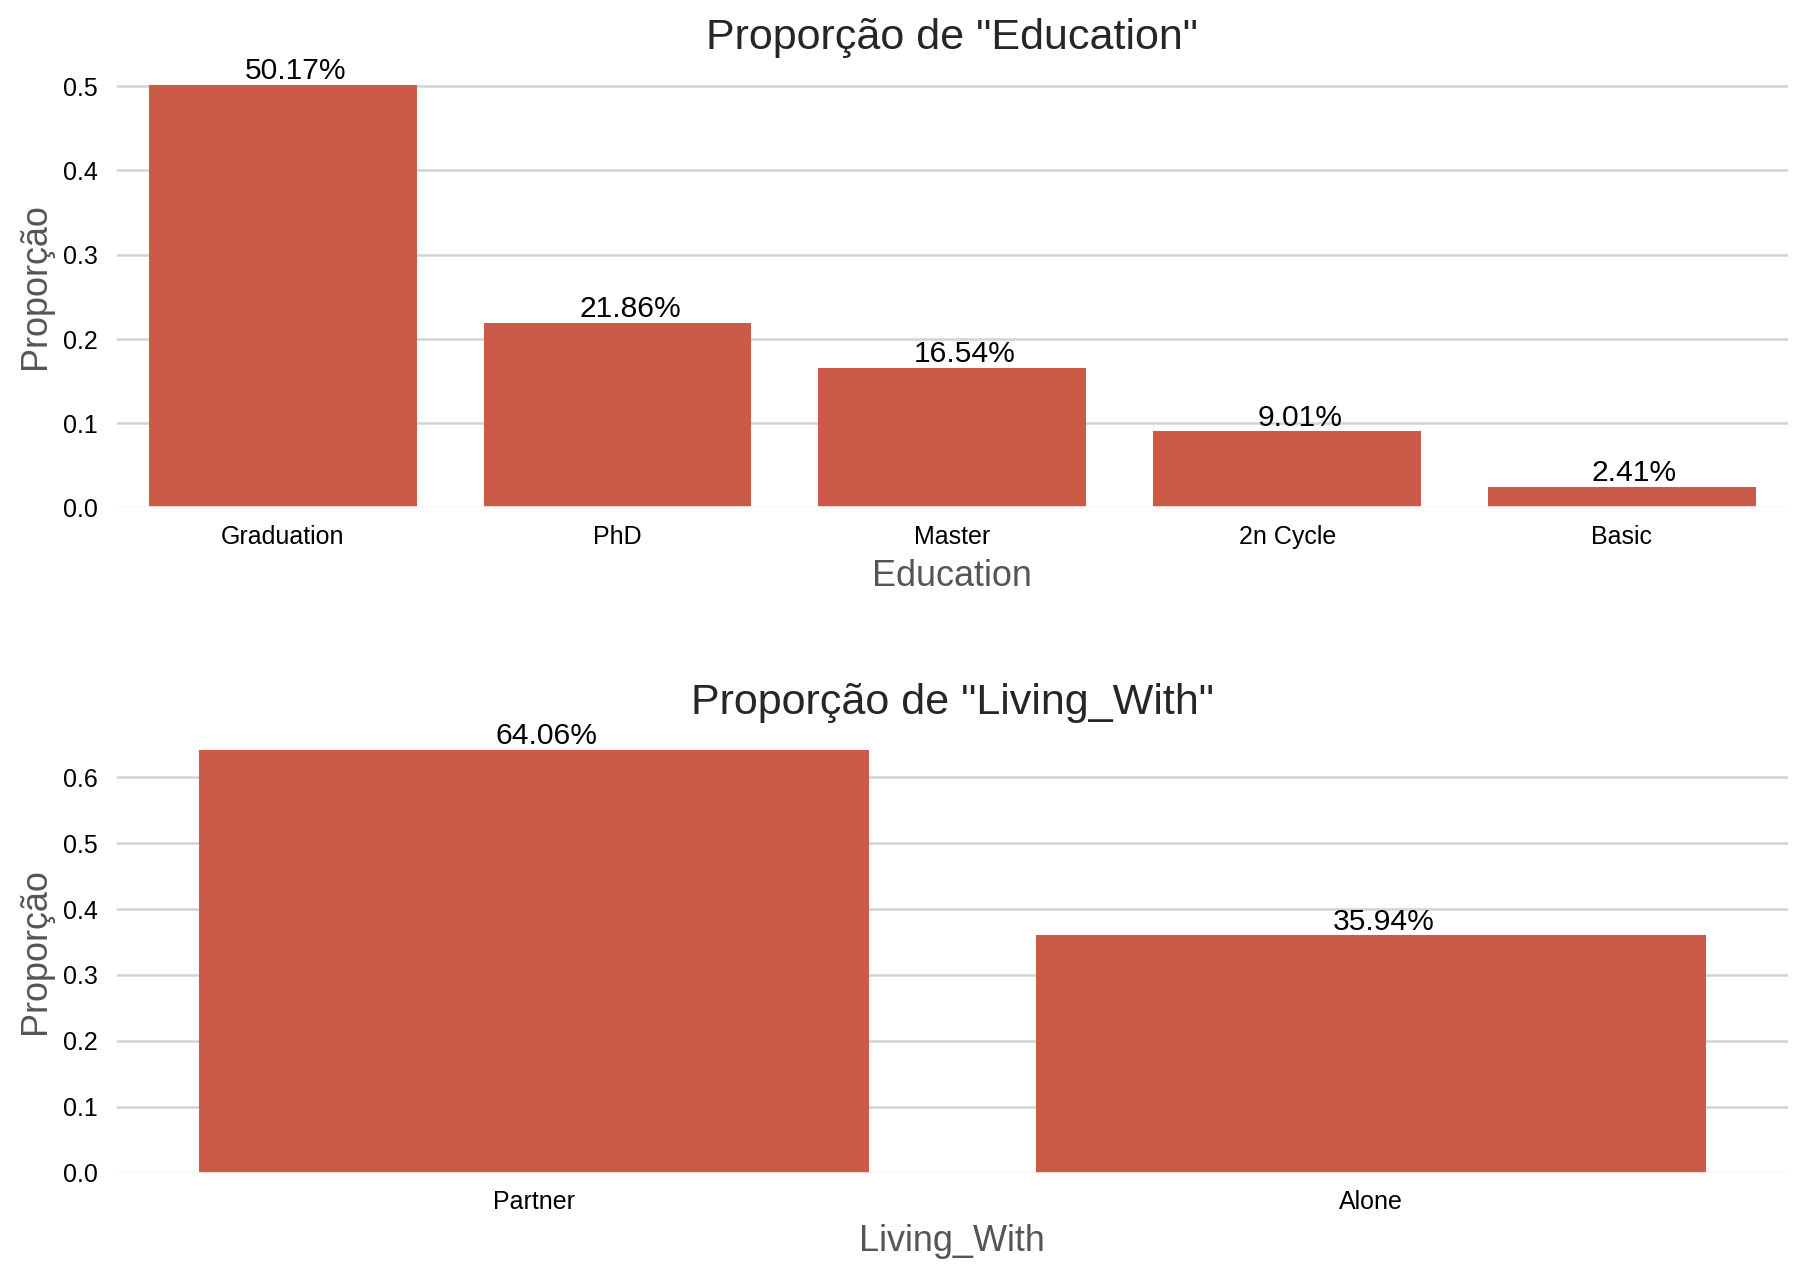

In [772]:
cols = ["Education", "Living_With"]

fig, ax = plt.subplots(figsize=(12,8), nrows=2)
   
ax = ax.flatten()

plt.subplots_adjust(wspace=1.2)
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols):
    sns.barplot(data=customers[col].value_counts(normalize=True).reset_index(), x=col, y="proportion", ax=ax[i])
    ax[i].set_title(f'Proporção de "{col}"')
    ax[i].set_ylabel("Proporção")


set_annotate(fig, porcentages=True)

plt.show()

<h4>Observações: </h4>
<ul> 
    <li>A maior parte dos clientes possuem até a graduação, sendo que apenas 2.41% possuem apenas o nível básico</li>
    <li>A proporção de clientes com PhD é maior que do que a proporção de clientes mestres</li>  
    <li>Pouco mais de 64% dos clientes vivem com um parceiro</li>
</ul>

# Análise Bivariada e Multivariada

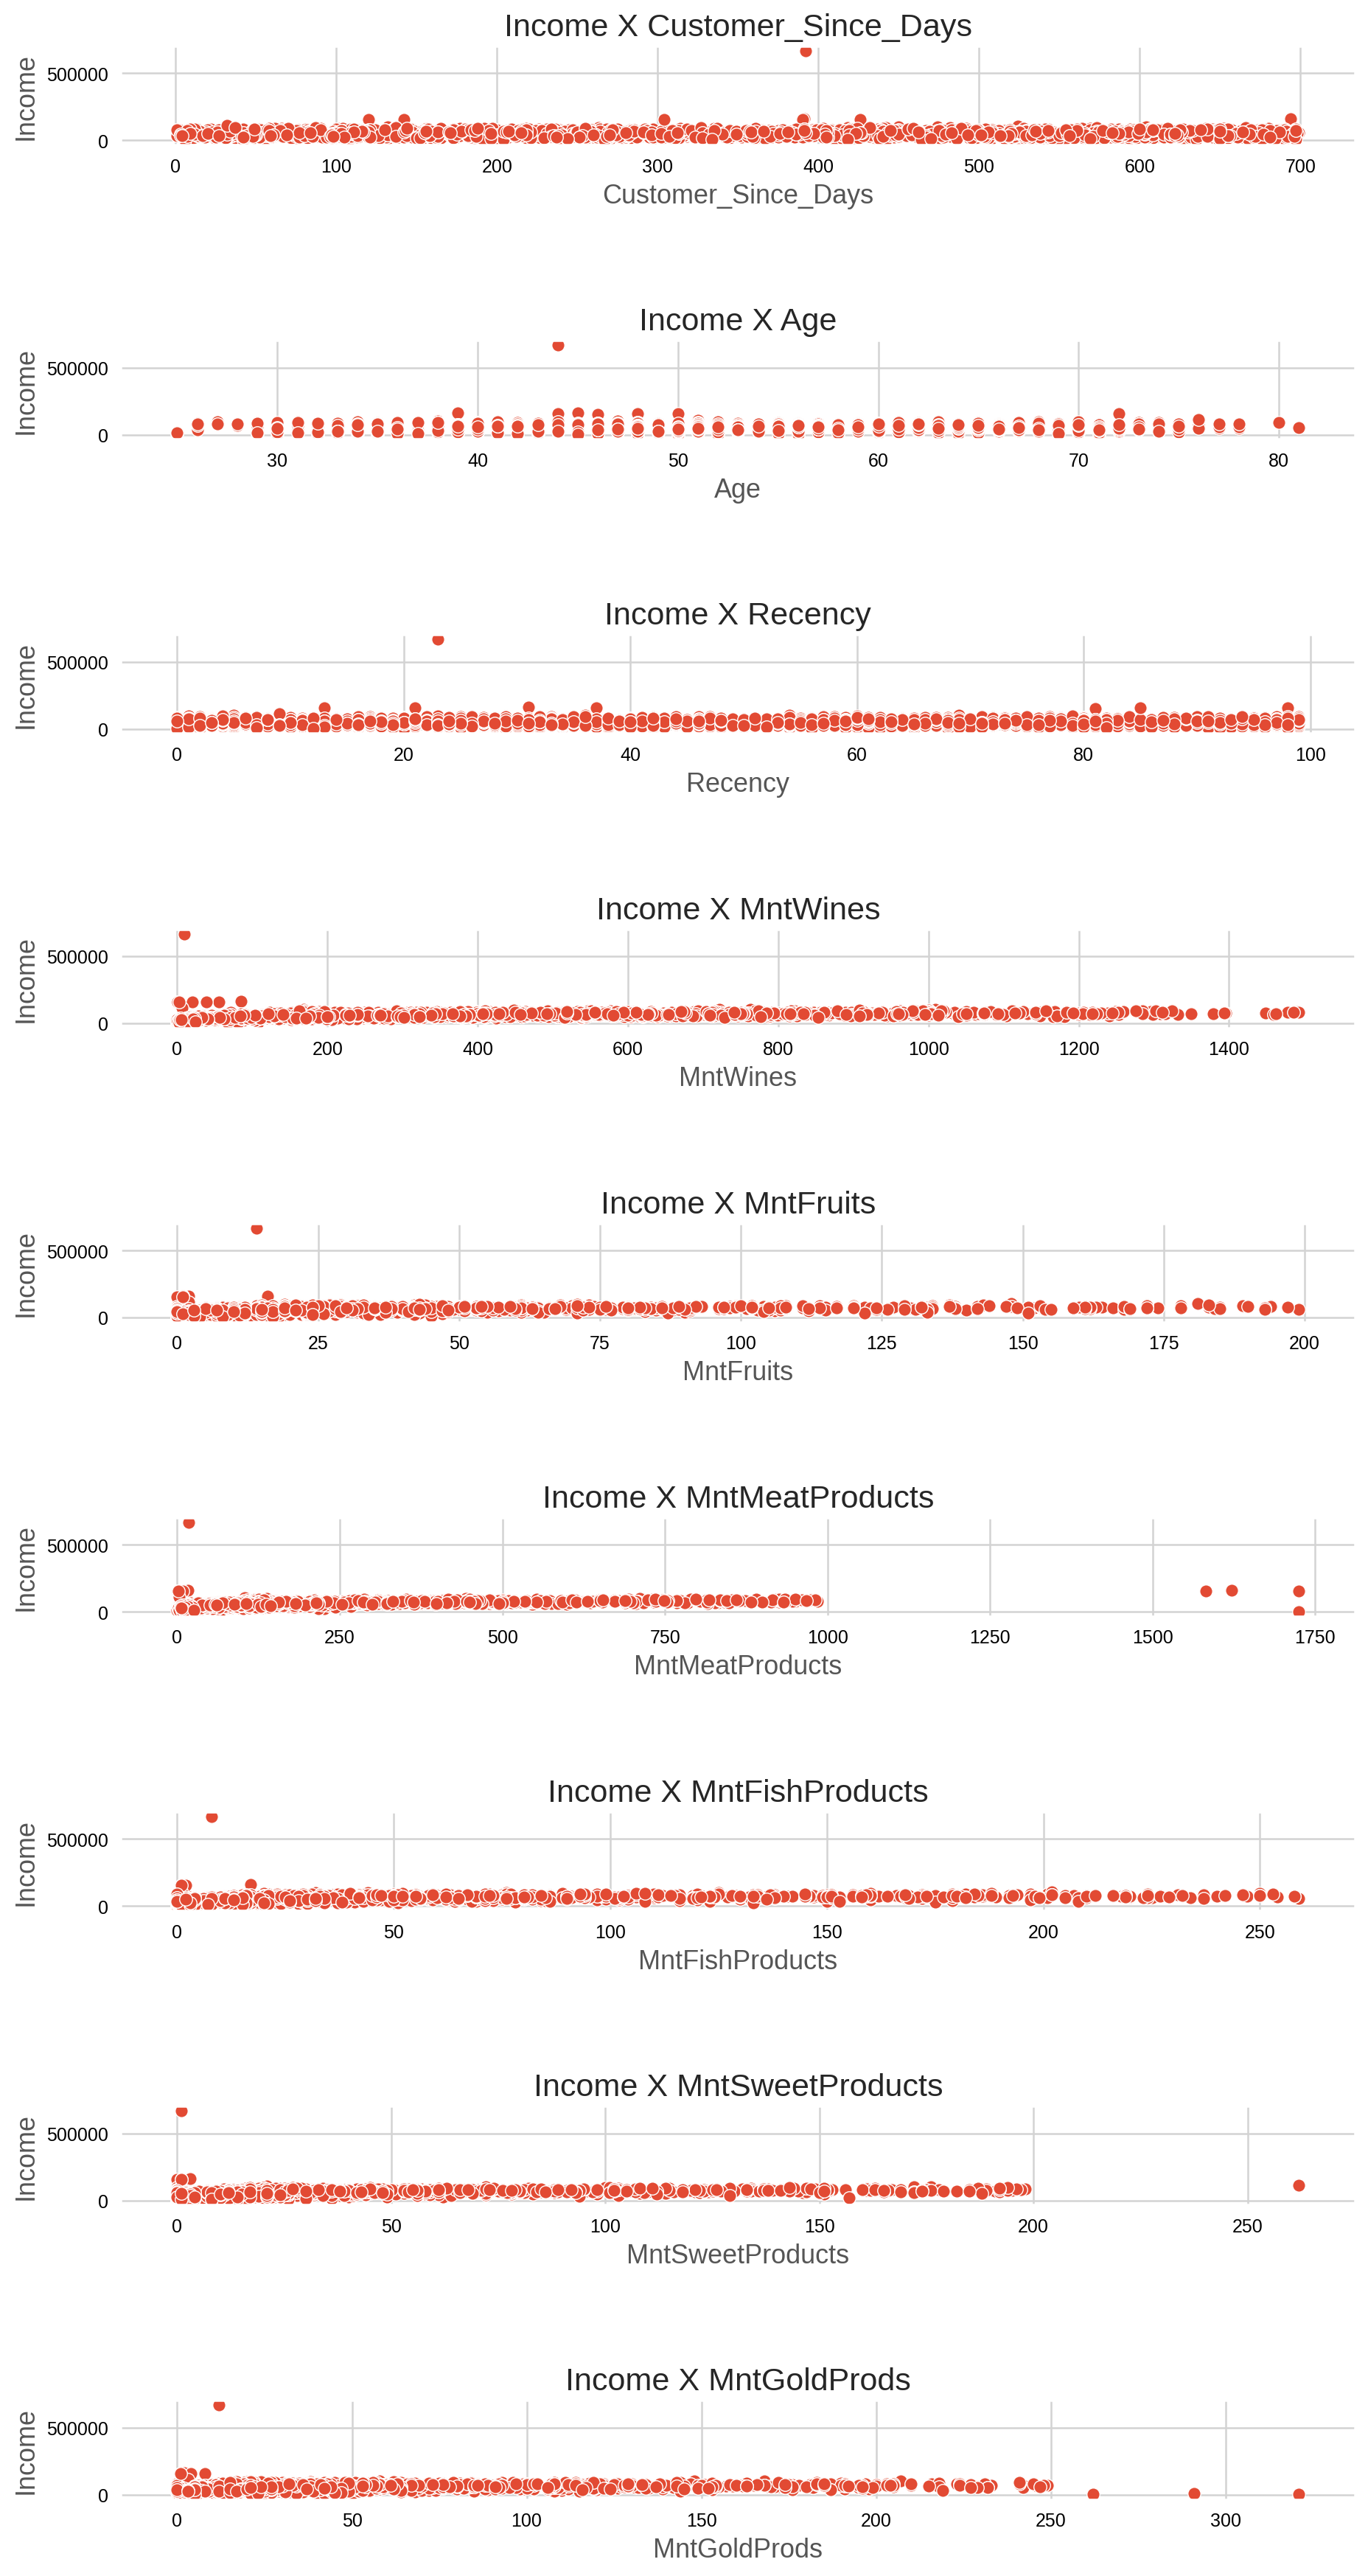

In [808]:
cols = ['Customer_Since_Days', 'Age', 'Recency', 
        'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

fig, ax = plt.subplots(figsize=(12,24), nrows=9)
ax = ax.flatten()

plt.subplots_adjust(hspace=2)

for i, col in enumerate(cols):
    sns.scatterplot(data=customers, x=col, y="Income", ax=ax[i])
    ax[i].set_title(f"Income X {col}")
    ax[i].set_ylabel("Income")


plt.show()

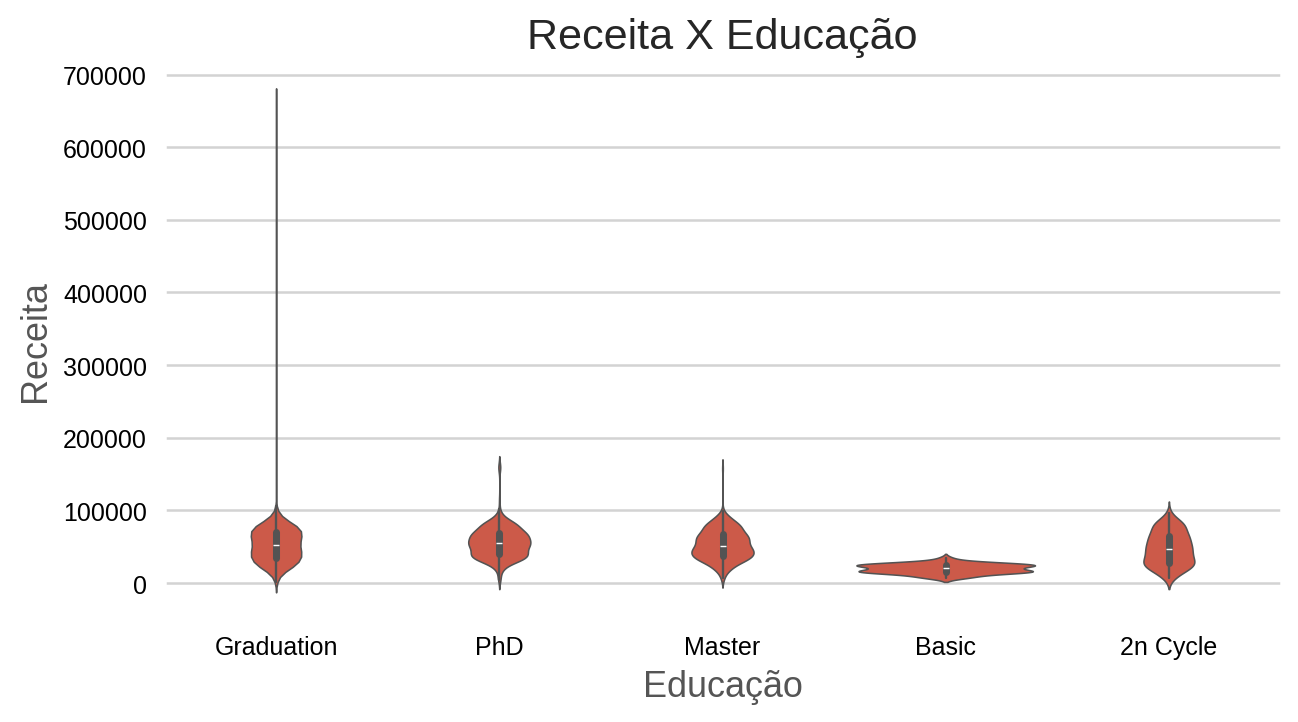

In [802]:
fig, ax = plt.subplots(figsize=(8,4))

sns.violinplot(x="Education", y="Income", data=customers, ax=ax)

ax.set_xlabel("Educação")
ax.set_ylabel("Receita")
ax.set_title("Receita X Educação")


plt.show()

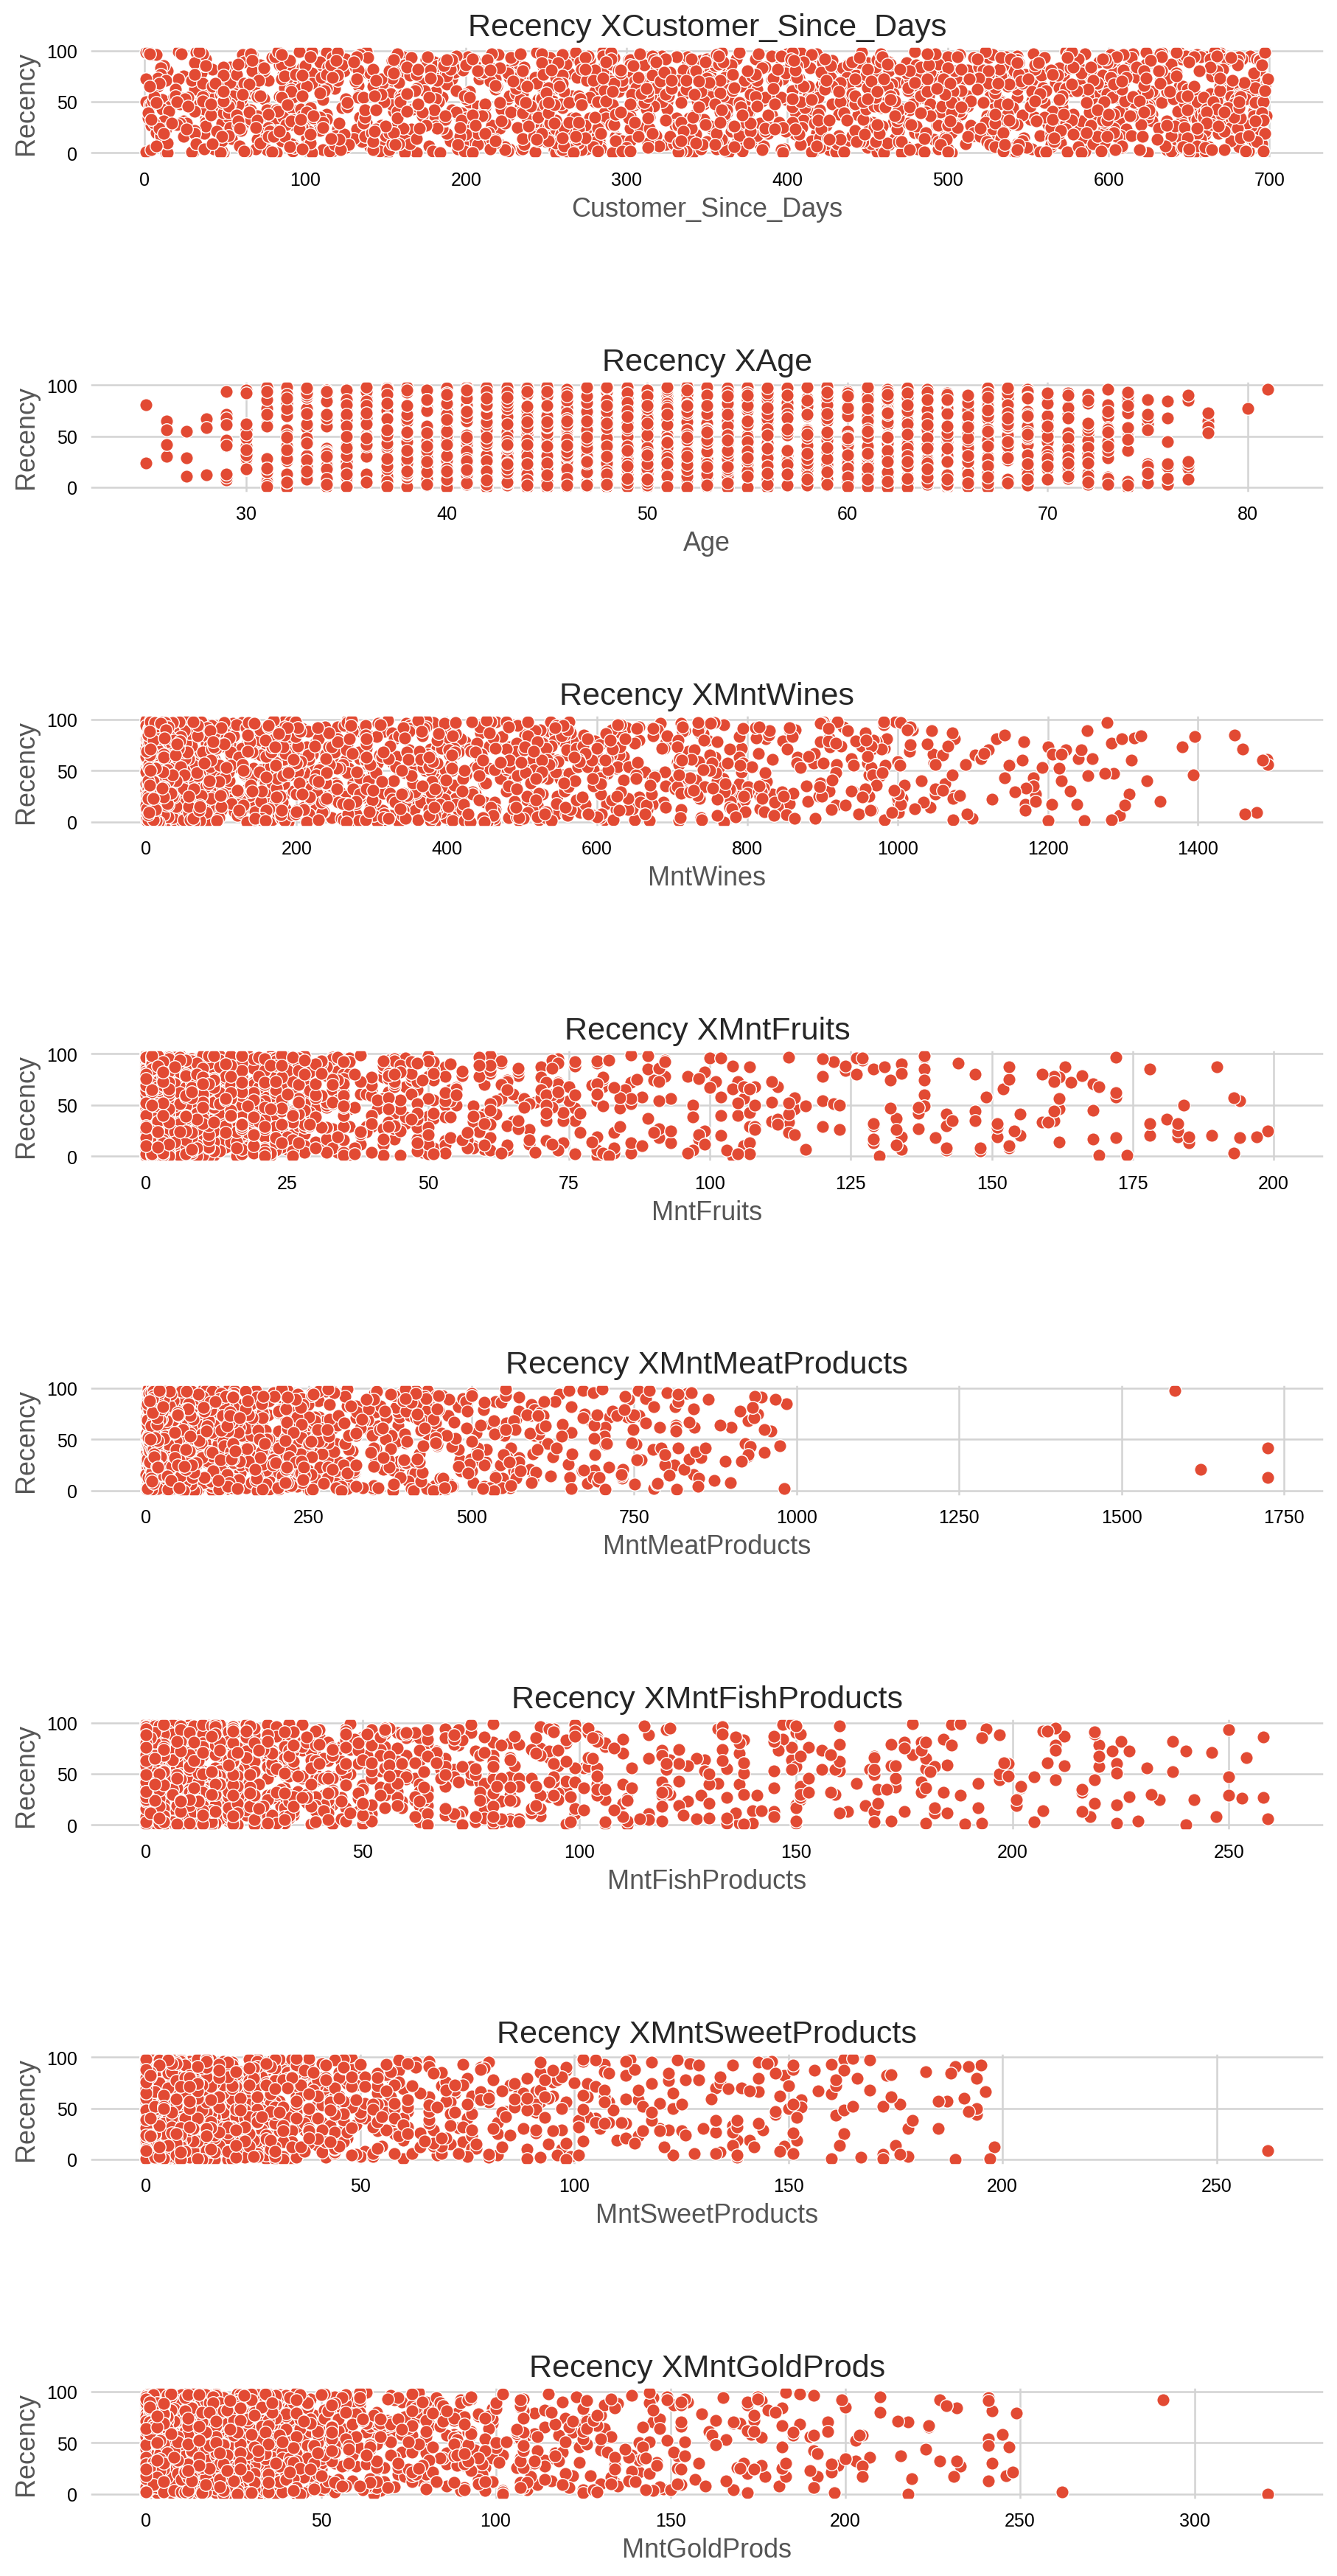

In [809]:
cols = ['Customer_Since_Days', 
        'Age', 'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds']

fig, ax = plt.subplots(figsize=(12,24), nrows=8)
ax = ax.flatten()

plt.subplots_adjust(hspace=2)

for i, col in enumerate(cols):
    sns.scatterplot(data=customers, x=col, y="Recency", ax=ax[i])
    ax[i].set_title(f"Recency X{col}")
    ax[i].set_ylabel("Recency")


plt.show()

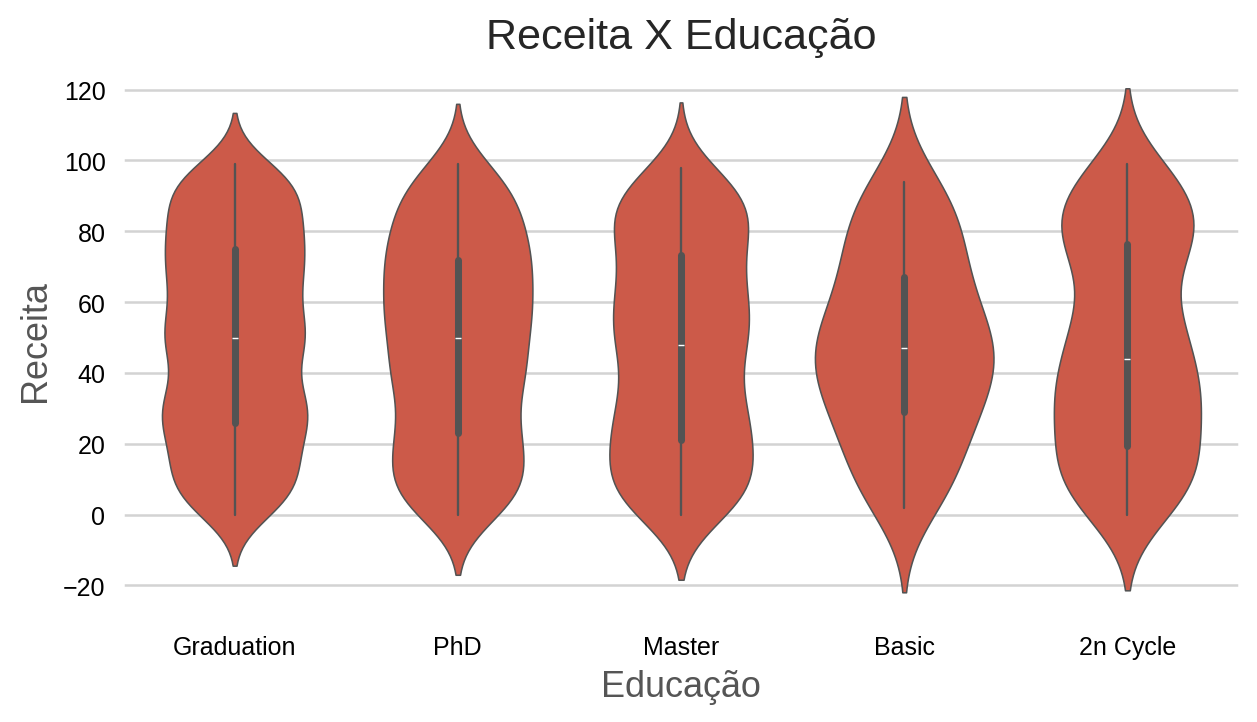

In [804]:
fig, ax = plt.subplots(figsize=(8,4))

sns.violinplot(x="Education", y="Recency", data=customers, ax=ax)

ax.set_xlabel("Educação")
ax.set_ylabel("Receita")
ax.set_title("Receita X Educação")


plt.show()

<h4>Observações: </h4>
<ul> 
    <li>Parece que há uma relação significativa entre a Income e a compra de produtos de múltiplas classes, especialmente de Carne e Vinho</li>
    <li>Não é possível perceber uma relação clara de recência com as outras variáveis analisadas</li>  
    <li>Clientes com até nível básico de formação normalmente tem renda bastante inferior</li>
    <li>A mediana dos clientes graduados, com PhD, e com mestrado sao bastante semelhantes, sendo que a mediana da renda dos PhD é ligeiramente maior </li>
    <li>A mediana da renda dos clientes com segundo grau é o dobro da mediana da renda dos clientes que tem até nível básico </li>
</ul>

<Axes: >

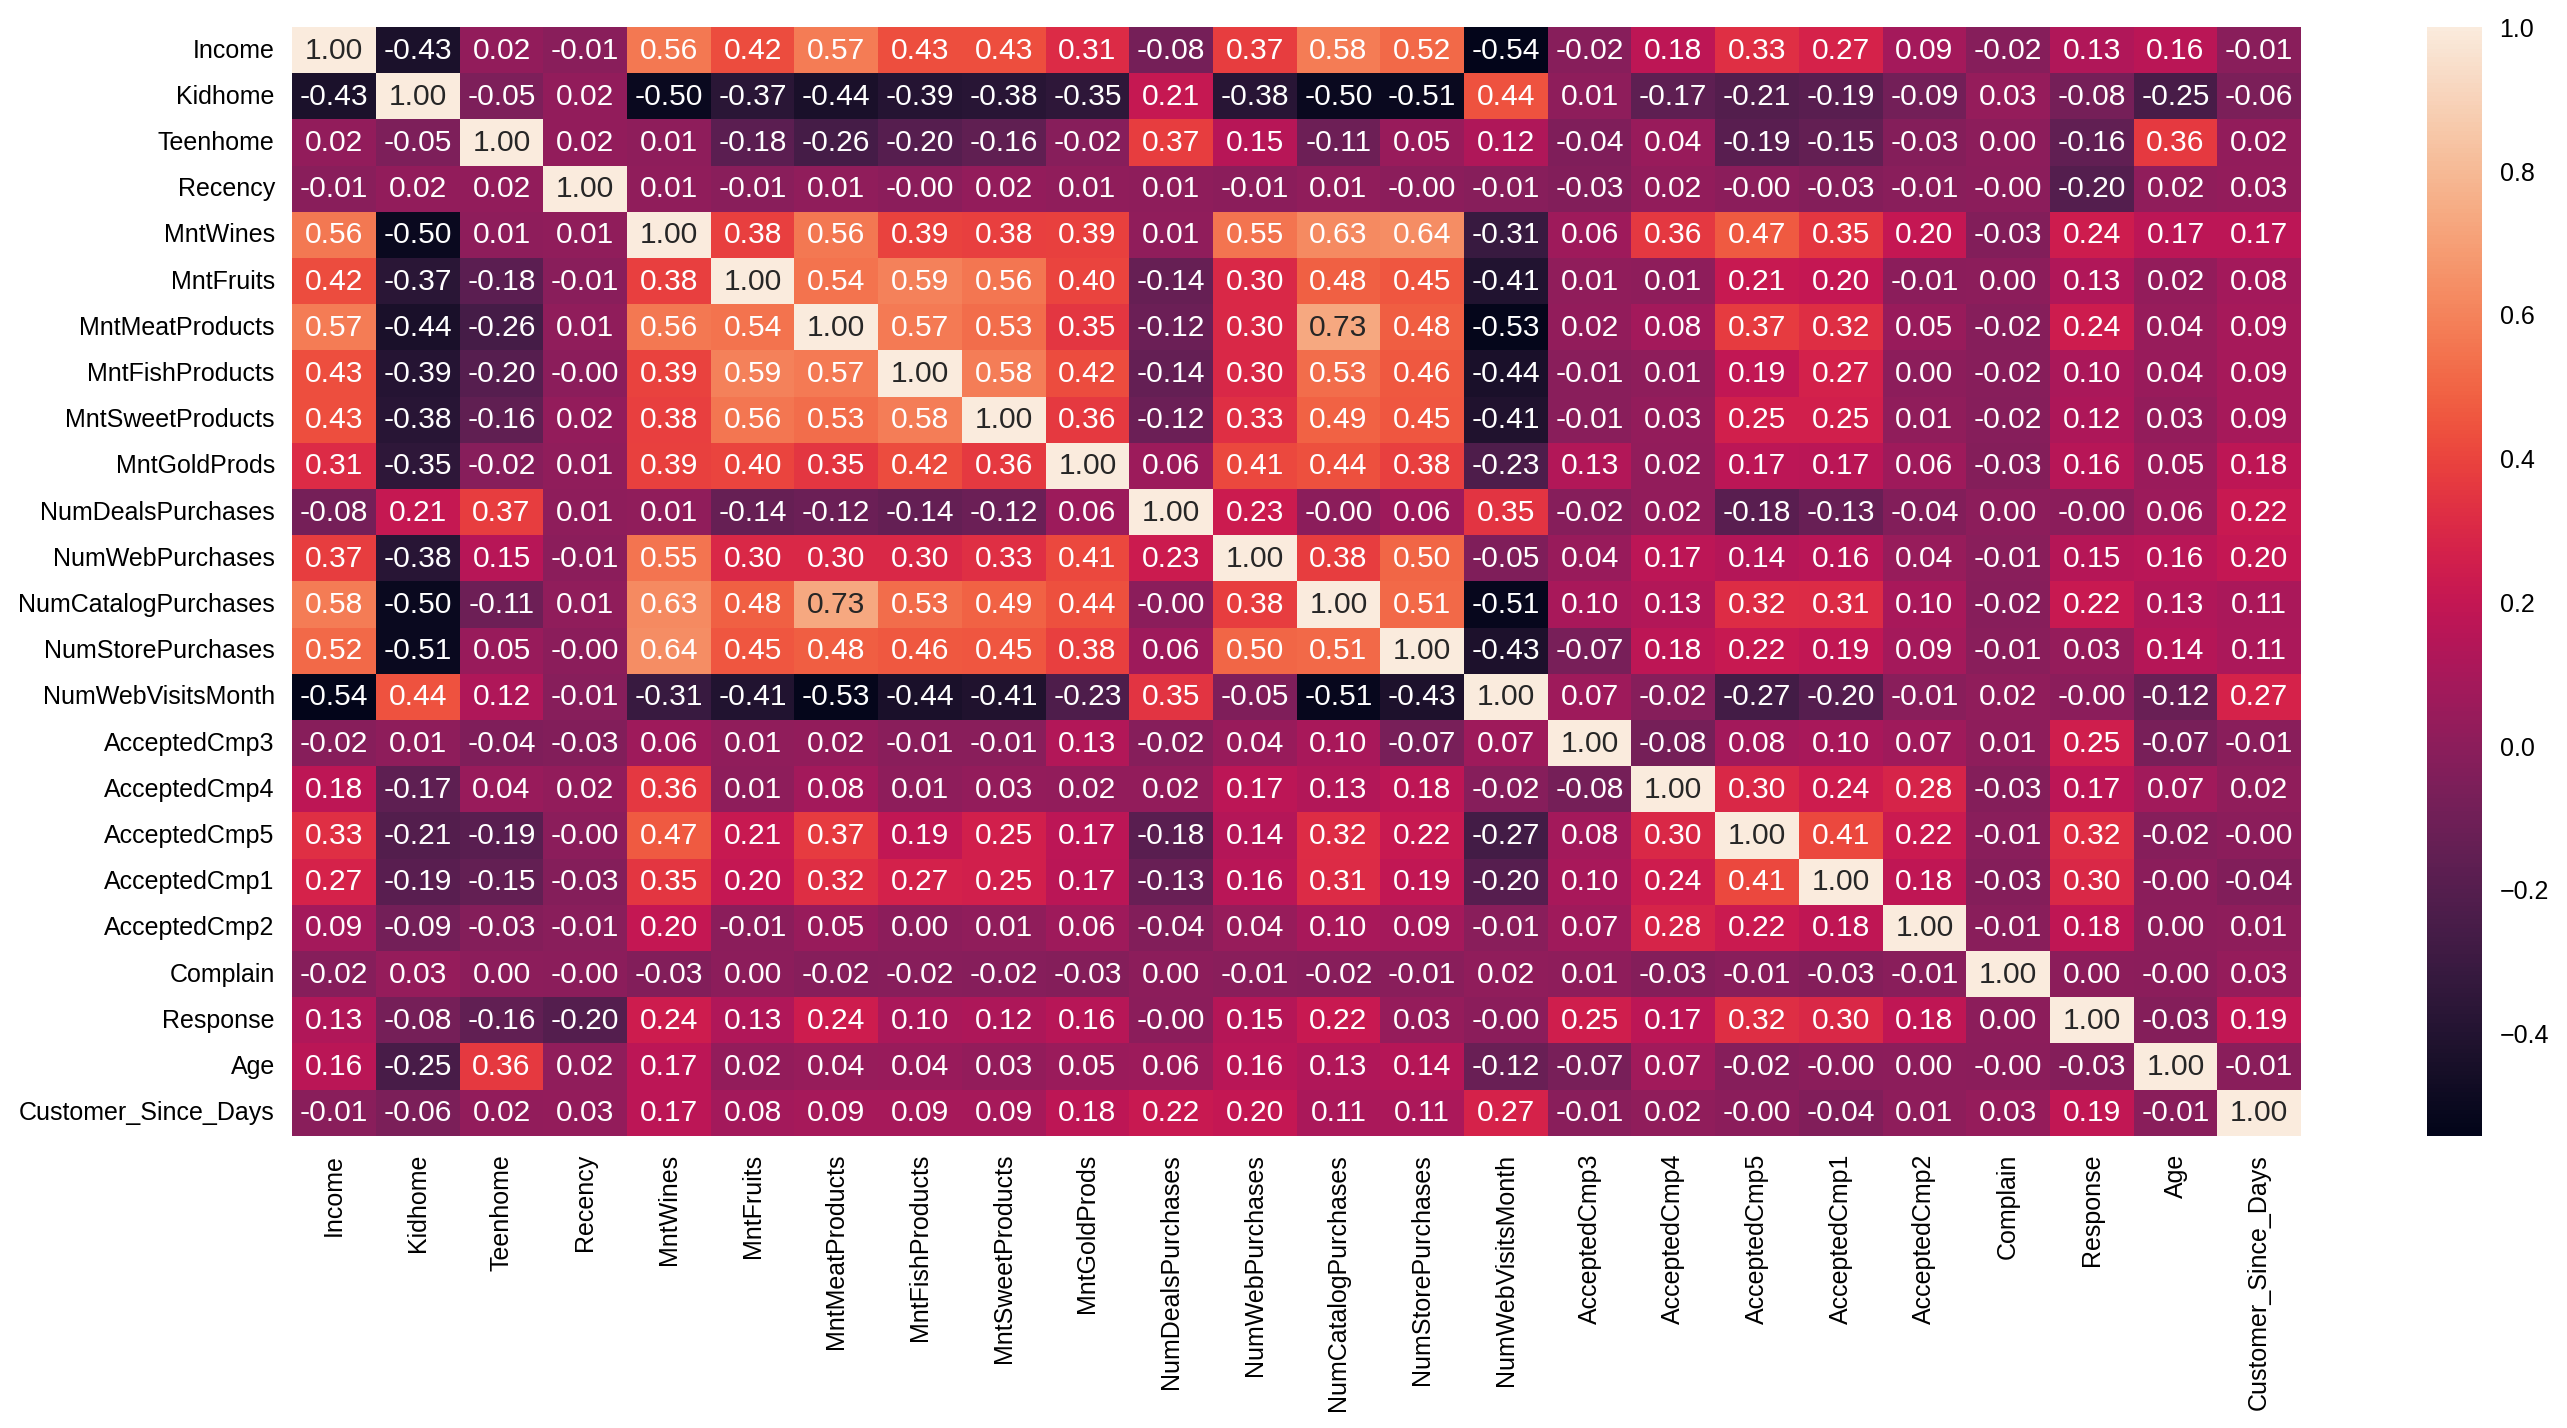

In [655]:
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(customers.select_dtypes(exclude=["object", "category"]).corr(), ax=ax, annot=True,  fmt=".2f")


plt.show()

<h4>Observações: </h4>
<ul> 
    <li>Parece que os clientes que compras de carne tendem a ser por catálogo</li>
    <li>Parece que clientes que fazem muitas compras por catálogo tendem a fazer muitas compras na loja também.</li>
    <li>Clientes que gastam muito em produtos de carne e vinho tendem a gastar consideralmente em outros produtos de forma geral</li>  
    <li>Clientes que fazem muitas compras por catálogo também tendem a fazer muitas compras online</li>
    <li>Clientes que gastam muito em frutas também tendem a gastar em produtos de carne</li>
    <li>Clientes de alta receita tendem a consumir mais carne</li>  
    
</ul>

# Principais Conclusões da Análise Exploratória

<ul>
  <li>A maior parte dos clientes tem de 1 a 4 compras online.</li>
  <li>A maior parte dos clientes nunca comprou usando um catálogo.</li>
  <li>A maior parte dos clientes possui até a graduação, sendo que apenas 2.41% possuem apenas o nível básico.</li>
  <li>Parece que há uma relação significativa entre a renda e a compra de produtos de múltiplas classes, especialmente de carne e vinho.</li>
  <li>Clientes que gastam muito em produtos de carne e vinho tendem a gastar consideravelmente em outros produtos de forma geral.</li>
  <li>Até 3/4 dos clientes tem até 8 compras na loja</li>
  <li>Vinho parece ser um produto que faz sucesso entre os clientes</li>
  <li>A maior parte dos clientes tem de 1 a 4 compras online</li>
 <li> A maior parcela dos clientes visita o site da loja, sendo que a maior parte deles chegam a acessar pelo menos 6 vezes</li>
</ul>

# Feature Engineering

O dataset contém um grande número de outliers, por isso, descartá-los não é uma boa opção, resultaria em uma grande perda de dados. Nesse caso, optarei por aplicar o Winsorize, que é uma técnica que trata de outliers sem removê-los, substituindo valores extremos(muito grandes ou pequenos), por valores em percentis mais altos ou mais baixos

In [ ]:
def winsorize_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)
    return df


numericas = customers.select_dtypes(exclude=["object", "category"]).columns
customers = winsorize_outliers(customers, numericas)

Abaixo, criarei novas features para aumentar a qualidade da segmentação de clientes

In [658]:
customers["Children"] = customers["Kidhome"] + customers["Teenhome"]
customers["Preferred_Product_Category"] = customers[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].idxmax(axis=1)
customers["Total_Spend"] = customers["MntWines"] + customers["MntFruits"] + customers["MntMeatProducts"] + customers["MntFishProducts"] + customers["MntSweetProducts"] + customers["MntGoldProds"]
customers["NumTotalPurchases"] = customers["NumDealsPurchases"] + customers["NumWebPurchases"] + customers["NumCatalogPurchases"] + customers["NumStorePurchases"]
customers["Total_Campaigns"] = customers[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1)
customers["Expected_Household_Size"] = customers["Children"] + customers["Living_With"].apply(lambda x: 2 if x == "partner" else 1)
customers["Purchase_Frequency"] = (customers["NumTotalPurchases"] / customers["Customer_Since_Days"]).round(4)
customers["Complaints_Rate"] = (customers["Complain"] / customers["Customer_Since_Days"]).round(4)
customers["Wines_Spend_Proportion"] = (customers["MntWines"] / customers["Total_Spend"]).round(4)
customers["Fruits_Spend_Proportion"] = (customers["MntFruits"] / customers["Total_Spend"]).round(4)
customers["Meat_Spend_Proportion"] = (customers["MntMeatProducts"] / customers["Total_Spend"]).round(4)
customers["Fish_Spend_Proportion"] = (customers["MntFishProducts"] / customers["Total_Spend"]).round(4)
customers["Sweet_Spend_Proportion"] = (customers["MntSweetProducts"] / customers["Total_Spend"]).round(4)
customers["Gold_Spend_Proportion"] = (customers["MntGoldProds"] / customers["Total_Spend"]).round(4)


# Data Preprocessing

In [660]:
customers.head().T

0           1           2  \
Education                   Graduation  Graduation  Graduation   
Income                         58138.0     46344.0     71613.0   
Kidhome                              0           1           0   
Teenhome                             0           1           0   
Recency                             58          38          26   
MntWines                         635.0        11.0       426.0   
MntFruits                         79.5         1.0        49.0   
MntMeatProducts                  546.0         6.0       127.0   
MntFishProducts                  120.5         2.0       111.0   
MntSweetProducts                 82.25         1.0        21.0   
MntGoldProds                      88.0         6.0        42.0   
NumDealsPurchases                  3.0         2.0         1.0   
NumWebPurchases                    8.0         1.0         8.0   
NumCatalogPurchases               10.0         1.0         2.0   
NumStorePurchases                    4           2          10   
NumWebVisitsMonth                  7.0         5.0         4.0   
AcceptedCmp3                       0.0         0.0         0.0   
AcceptedCmp4                       0.0         0.0         0.0   
AcceptedCmp5                       0.0         0.0         0.0   
AcceptedCmp1                       0.0         0.0         0.0   
AcceptedCmp2                       0.0         0.0         0.0   
Complain                           0.0         0.0         0.0   
Response                           0.0         0.0         0.0   
Age                                 64          67          56   
Living_With                      Alone       Alone     Partner   
Customer_Since_Days                663         113         312   
Children                             0           2           0   
Preferred_Product_Category    MntWines    MntWines    MntWines   
Total_Spend                    1551.25        27.0       776.0   
NumTotalPurchases                 25.0         6.0        21.0   
Total_Campaigns                    0.0         0.0         0.0   
Expected_Household_Size              1           3           1   
Purchase_Frequency              0.0377      0.0531      0.0673   
Complaints_Rate                    0.0         0.0         0.0   
Wines_Spend_Proportion          0.4093      0.4074       0.549   
Fruits_Spend_Proportion         0.0512       0.037      0.0631   
Meat_Spend_Proportion            0.352      0.2222      0.1637   
Fish_Spend_Proportion           0.0777      0.0741       0.143   
Sweet_Spend_Proportion           0.053       0.037      0.0271   
Gold_Spend_Proportion           0.0567      0.2222      0.0541   

                                          3         4  
Education                        Graduation       PhD  
Income                              26646.0   58293.0  
Kidhome                                   1         1  
Teenhome                                  0         0  
Recency                                  26        94  
MntWines                               11.0     173.0  
MntFruits                               4.0      43.0  
MntMeatProducts                        20.0     118.0  
MntFishProducts                        10.0      46.0  
MntSweetProducts                        3.0      27.0  
MntGoldProds                            5.0      15.0  
NumDealsPurchases                       2.0       5.0  
NumWebPurchases                         2.0       5.0  
NumCatalogPurchases                     0.0       3.0  
NumStorePurchases                         4         6  
NumWebVisitsMonth                       6.0       5.0  
AcceptedCmp3                            0.0       0.0  
AcceptedCmp4                            0.0       0.0  
AcceptedCmp5                            0.0       0.0  
AcceptedCmp1                            0.0       0.0  
AcceptedCmp2                            0.0       0.0  
Complain                                0.0       0.0  
Response                                0.

In [661]:
categoricas_onehot = ["Living_With", "Preferred_Product_Category"]
categoricas_ordinal = ["Education"]
numericas = customers.select_dtypes(exclude=["object", "category"]).columns.tolist()

In [662]:
print(f"Essas são as features categóricas binárias: {categoricas_onehot + categoricas_ordinal}")
print(f"Essas são as features numéricas: {numericas}")

Essas são as features categóricas binárias: ['Living_With', 'Preferred_Product_Category', 'Education']
Essas são as features numéricas: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Since_Days', 'Children', 'Total_Spend', 'NumTotalPurchases', 'Total_Campaigns', 'Expected_Household_Size', 'Purchase_Frequency', 'Complaints_Rate', 'Wines_Spend_Proportion', 'Fruits_Spend_Proportion', 'Meat_Spend_Proportion', 'Fish_Spend_Proportion', 'Sweet_Spend_Proportion', 'Gold_Spend_Proportion']


In [663]:
categoricas_onehot_transformer = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

categoricas_ordinal_transformer = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder())
])

numericas_transformer = Pipeline(steps=[
    ("num_imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat_onehot", categoricas_onehot_transformer, categoricas_onehot),
    ("cat_ordinal", categoricas_ordinal_transformer, categoricas_ordinal),
    ("num", numericas_transformer, numericas)
])

In [664]:
customers_processed = pd.DataFrame(preprocessor.fit_transform(customers))

In [665]:
renamed_columns = []

product_cat_replace_dict = {
    "0": "MntWines",
    "1": "MntMeatProducts",
    "2": "MntFruits",
    "3": "MntFishProducts",
    "4": "MntGoldProds",
    "5": "MntSweetProducts"
}
for col in preprocessor.get_feature_names_out():
    if col.startswith("cat_onehot__"):
        index = int(col.split("__")[1].split("_")[0])
        sub_index = str(int(col.split("_")[-1]) - 1)
        
        new_col_name = f"{categoricas_onehot[index]}_{sub_index}"
    
        if new_col_name.startswith("Preferred_Product_Category_"):
            new_col_name = new_col_name.replace(sub_index, product_cat_replace_dict[sub_index])
        renamed_columns.append(new_col_name)

    elif col.startswith("cat_ordinal__"):
        index = int(col.split("__")[1])
        renamed_columns.append(categoricas_ordinal[index])
    elif col.startswith("num__"):
        index = numericas.index(col.split("__")[1])
        renamed_columns.append(numericas[index])
    else:
        renamed_columns.append(col)
        
        


Implementando esse loop apenas para obter um nome mais bem formatado das colunas, visando melhor interpretaçao

In [666]:
customers_processed.columns = renamed_columns

In [706]:
customers_processed.head().T

0         1         2  \
Living_With_0                                1.000000  1.000000  0.000000   
Living_With_1                                0.000000  0.000000  1.000000   
Preferred_Product_Category_MntWines          1.000000  1.000000  1.000000   
Preferred_Product_Category_MntMeatProducts   0.000000  0.000000  0.000000   
Preferred_Product_Category_MntFruits         0.000000  0.000000  0.000000   
Preferred_Product_Category_MntFishProducts   0.000000  0.000000  0.000000   
Preferred_Product_Category_MntGoldProds      0.000000  0.000000  0.000000   
Preferred_Product_Category_MntSweetProducts  0.000000  0.000000  0.000000   
Education                                    1.000000  1.000000  1.000000   
Income                                       0.294201 -0.265453  0.933623   
Kidhome                                     -0.826962  1.039216 -0.826962   
Teenhome                                    -0.931435  0.899877 -0.931435   
Recency                                      0.316229 -0.374152 -0.788381   
MntWines                                     0.998155 -0.880969  0.368769   
MntFruits                                    2.162125 -0.763653  1.025358   
MntMeatProducts                              2.211961 -0.811070 -0.133687   
MntFishProducts                              2.196488 -0.743215  1.960816   
MntSweetProducts                             2.163598 -0.756235 -0.037507   
MntGoldProds                                 1.223471 -0.838683  0.066653   
NumDealsPurchases                            0.501036 -0.149606 -0.800248   
NumWebPurchases                              1.475975 -1.161524  1.475975   
NumCatalogPurchases                          2.697883 -0.596566 -0.230516   
NumStorePurchases                           -0.551819 -1.169478  1.301161   
NumWebVisitsMonth                            0.720188 -0.130220 -0.555424   
AcceptedCmp3                                 0.000000  0.000000  0.000000   
AcceptedCmp4                                 0.000000  0.000000  0.000000   
AcceptedCmp5                                 0.000000  0.000000  0.000000   
AcceptedCmp1                                 0.000000  0.000000  0.000000   
AcceptedCmp2                                 0.000000  0.000000  0.000000   
Complain                                     0.000000  0.000000  0.000000   
Response                                     0.000000  0.000000  0.000000   
Age                                          1.021207  1.278472  0.335167   
Customer_Since_Days                          1.532985 -1.183444 -0.200591   
Children                                    -1.276373  1.405794 -1.276373   
Total_Spend                                  1.797296 -0.992491  0.378381   
NumTotalPurchases                            1.379185 -1.172175  0.842057   
Total_Campaigns                              0.000000  0.000000  0.000000   
Expected_Household_Size                     -1.276373  1.405794 -1.276373   
Purchase_Frequency                          -0.121502 -0.104987 -0.089760   
Complaints_Rate                              0.000000  0.000000  0.000000   
Wines_Spend_Proportion                      -0.264389 -0.272726  0.348650   
Fruits_Spend_Proportion                      0.081859 -0.189567  0.309322   
Meat_Spend_Proportion                        0.837633 -0.222148 -0.699784   
Fish_Spend_Proportion                        0.125162  0.076670  1.004763   
Sweet_Spend_Proportion                       0.083713 -0.192538 -0.363469   
Gold_Spend_Proportion                       -0.573298  0.985546 -0.597787   

                                                    3         4  
Living_With_0                                0.000000  0.000000  
Living_With_1                                1.000000  1.000000  
Preferred_Product_Category_MntWines          0.000000  1.000000  
Preferred_Product_Category_MntMeatProducts   1.000000  0.000000  
Preferred_Product_Category_MntFruits         0.000000  0.000000  
Preferred_Product_Category_MntFishPr

# Redução de dimensionalidade com PCA

Vou seguir com o PCA visando a redução de dimensionalidade para uma clusterização mais performática, ou seja, sem redundâncias e de qualidade

In [668]:
pca = PCA()

pca.fit(customers_processed)

PCA()

In [669]:
pca.explained_variance_ratio_

array([3.10753945e-01, 1.45100736e-01, 6.94187773e-02, 5.59105121e-02,
       4.77342584e-02, 4.24645596e-02, 3.41605736e-02, 3.29963551e-02,
       3.14456091e-02, 2.83443168e-02, 2.61043392e-02, 2.45855561e-02,
       2.24869589e-02, 1.81911373e-02, 1.55059747e-02, 1.49726146e-02,
       1.34529771e-02, 1.25919607e-02, 1.00331591e-02, 9.10847140e-03,
       8.11768701e-03, 6.49503843e-03, 6.16221159e-03, 4.59968990e-03,
       4.14057167e-03, 2.83125500e-03, 1.35523004e-03, 5.61872465e-04,
       2.02835779e-04, 1.70814984e-04, 1.71348641e-09, 5.08752001e-30,
       7.21901977e-31, 5.30492525e-31, 5.68212486e-32, 6.34066639e-33,
       2.24966318e-33, 2.24966318e-33, 2.24966318e-33, 2.24966318e-33,
       2.24966318e-33, 2.24966318e-33, 2.24966318e-33, 2.24966318e-33,
       2.24966318e-33, 2.24966318e-33])

In [670]:
soma_acumulativa = [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))]

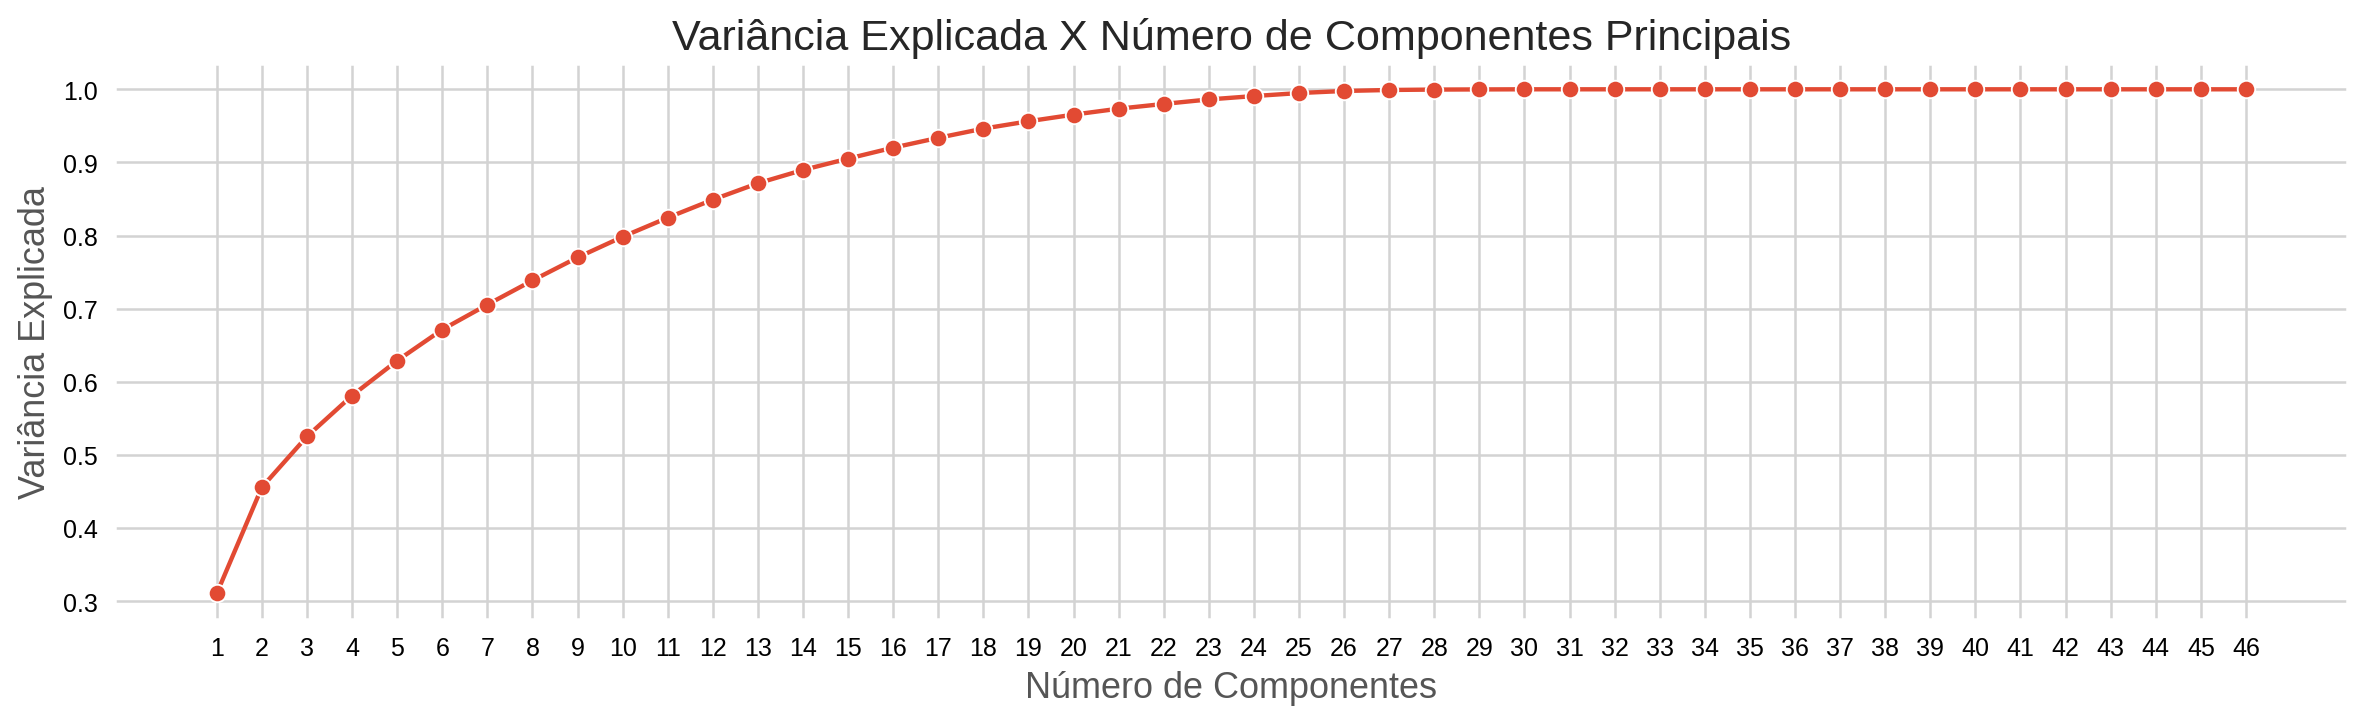

In [671]:
plt.figure(figsize = (16, 4))

sns.lineplot(x = range(1, len(soma_acumulativa)+1), y=soma_acumulativa, markers=True, marker = "o")

plt.title("Variância Explicada X Número de Componentes Principais")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada")


plt.xticks(np.arange(1, len(soma_acumulativa)+1, 1))

plt.show()

In [672]:
pca = PCA(n_components=3, random_state=42)

customers_pca = pca.fit_transform(customers_processed)

In [673]:
print(f"Temos então, {pca.n_components_} componentes principais, com uma variância explicada de {np.sum(pca.explained_variance_ratio_ * 100)}%")

Temos então, 3 componentes principais, com uma variância explicada de 52.527345755675256%


# Clusterização com KMedoid

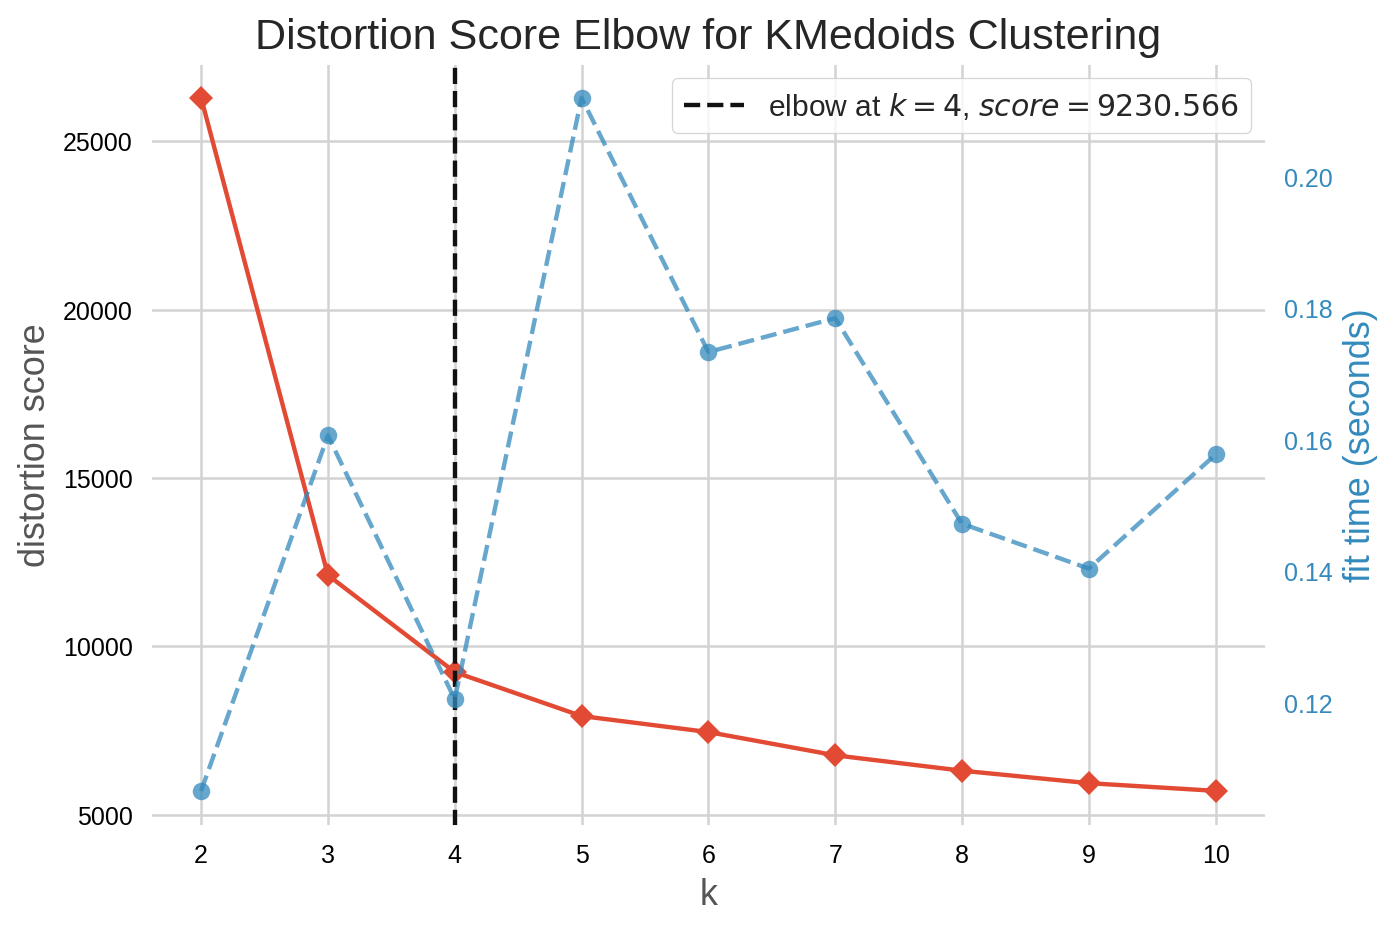

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [674]:
Elbow_M = KElbowVisualizer(KMedoids(random_state=42), k=10)
Elbow_M.fit(customers_pca)
Elbow_M.show()

In [675]:
silhouette_scores = []

for i in range(2, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    labels = kmedoids.fit_predict(customers_pca)

    distortion = kmedoids.inertia_
    silhouette_avg = silhouette_score(customers_pca, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score para {i} Clusters: {silhouette_avg:.2f}")

Silhouette Score para 2 Clusters: 0.22
Silhouette Score para 3 Clusters: 0.38
Silhouette Score para 4 Clusters: 0.35
Silhouette Score para 5 Clusters: 0.33
Silhouette Score para 6 Clusters: 0.31
Silhouette Score para 7 Clusters: 0.29
Silhouette Score para 8 Clusters: 0.29
Silhouette Score para 9 Clusters: 0.26
Silhouette Score para 10 Clusters: 0.28


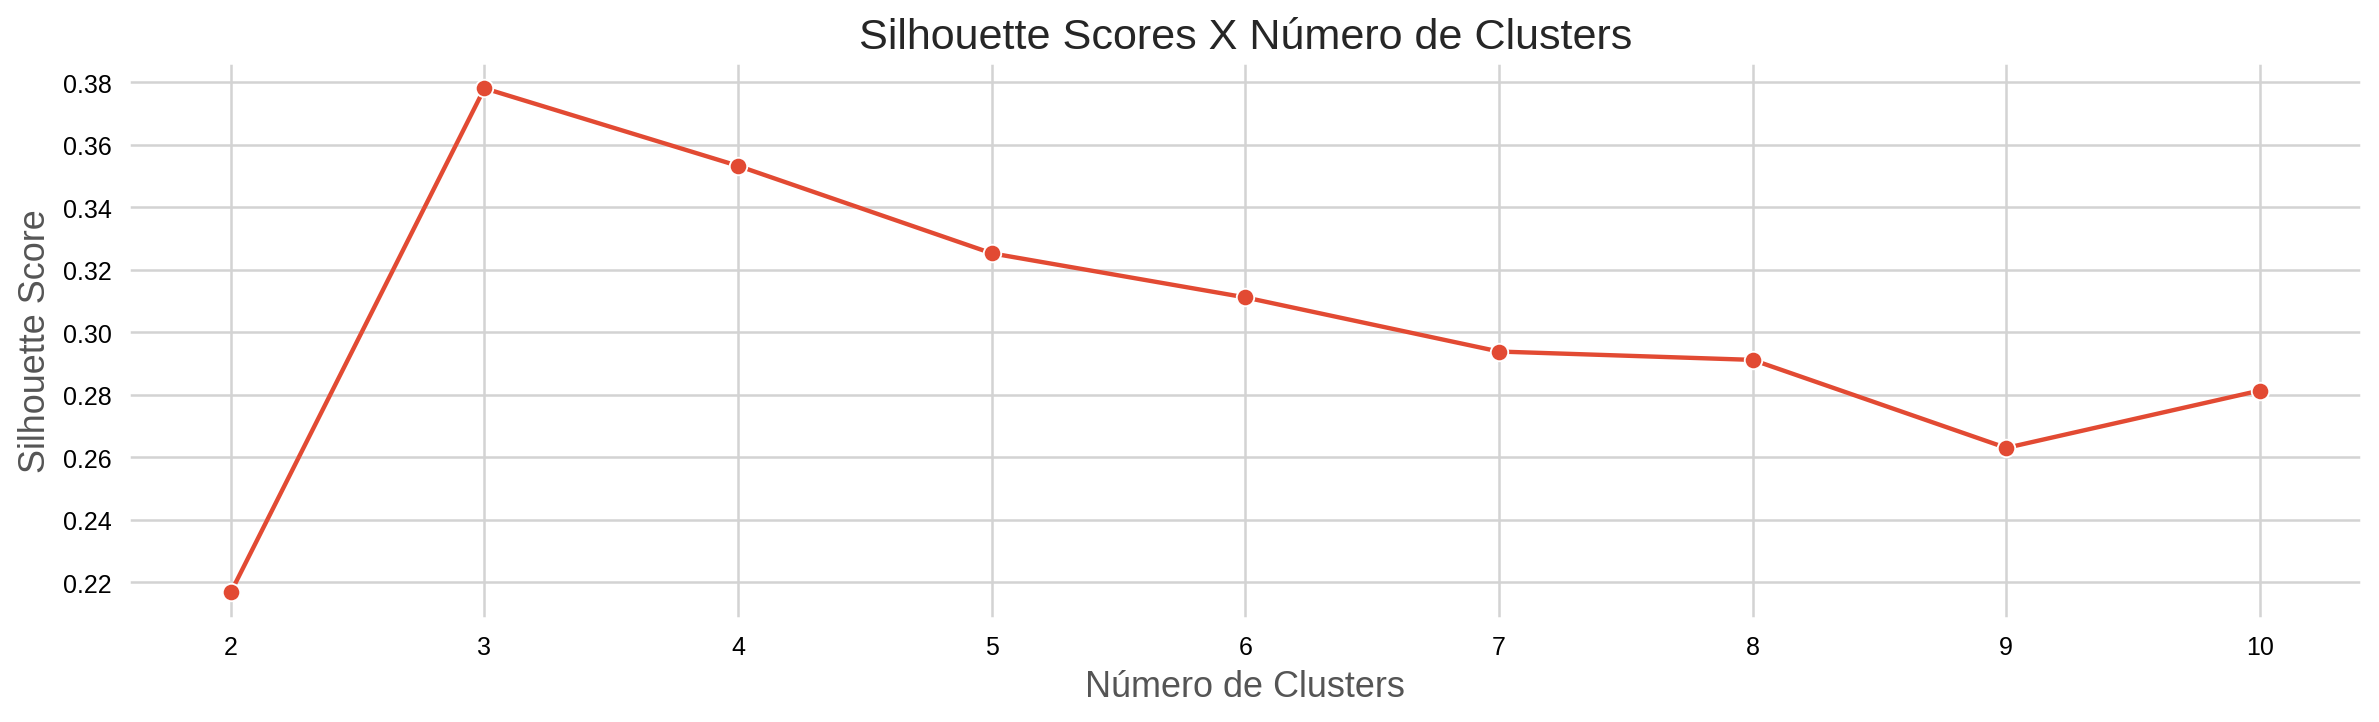

In [676]:
plt.figure(figsize = (16, 4))

sns.lineplot(x = range(2, len(silhouette_scores)+2), y=silhouette_scores, markers=True, marker = "o")

plt.title("Silhouette Scores X Número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")


plt.xticks(np.arange(2, len(silhouette_scores)+2, 1))

plt.show()

4 Clusters para um bom número, pois equilibra o Silhouette Score e a Distortion/Inércia

In [677]:
kmedoids = KMedoids(n_clusters=4, init="k-medoids++", random_state=42)


kmedoids.fit(customers_pca)


labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_


In [678]:
customers["Cluster"] = labels

Temos então o dataset customers com os clusters aplicados: 

In [679]:
customers.head(10)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation  58138.0        0         0       58     635.0       79.5   
1  Graduation  46344.0        1         1       38      11.0        1.0   
2  Graduation  71613.0        0         0       26     426.0       49.0   
3  Graduation  26646.0        1         0       26      11.0        4.0   
4         PhD  58293.0        1         0       94     173.0       43.0   
5      Master  62513.0        0         1       16     520.0       42.0   
6  Graduation  55635.0        0         1       34     235.0       65.0   
7         PhD  33454.0        1         0       32      76.0       10.0   
8         PhD  30351.0        1         0       19      14.0        0.0   
9         PhD   5648.0        1         1       68      28.0        0.0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0            546.0            120.5             82.25  ...   
1              6.0              2.0              1.00  ...   
2            127.0            111.0             21.00  ...   
3             20.0             10.0              3.00  ...   
4            118.0             46.0             27.00  ...   
5             98.0              0.0             42.00  ...   
6            164.0             50.0             49.00  ...   
7             56.0              3.0              1.00  ...   
8             24.0              3.0              3.00  ...   
9              6.0              1.0              1.00  ...   

   Expected_Household_Size  Purchase_Frequency  Complaints_Rate  \
0                        1              0.0377              0.0   
1                        3              0.0531              0.0   
2                        1              0.0673              0.0   
3                        2              0.0576              0.0   
4                        2              0.1180              0.0   
5                        2              0.0751              0.0   
6                        2              0.0354              0.0   
7                        2              0.0240              0.0   
8                        2              0.0155              0.0   
9                        3              0.0185              0.0   

   Wines_Spend_Proportion  Fruits_Spend_Proportion  Meat_Spend_Proportion  \
0                  0.4093                   0.0512                 0.3520   
1                  0.4074                   0.0370                 0.2222   
2                  0.5490                   0.0631                 0.1637   
3                  0.2075                   0.0755                 0.3774   
4                  0.4100                   0.1019                 0.2796   
5                  0.7263                   0.0587                 0.1369   
6                  0.3983                   0.1102                 0.2780   
7                  0.4497                   0.0592                 0.3314   
8                  0.3043                   0.0000                 0.5217   
9                  0.5714                   0.0000                 0.1224   

   Fish_Spend_Proportion  Sweet_Spend_Proportion  Gold_Spend_Proportion  \
0                 0.0777                  0.0530                 0.0567   
1                 0.0741                  0.0370                 0.2222   
2                 0.1430                  0.0271                 0.0541   
3                 0.1887                  0.0566                 0.0943   
4                 0.1090                  0.0640                 0.0355   
5                 0.0000                  0.0587                 0.0196   
6                 0.0847                  0.0831                 0.0458   
7                 0.0178                  0.0059                 0.1361   
8                 0.0652                  0.0652                 0.0435   
9                 0.0204                  0.0204                 0.2653   

   Cluster  
0        2  
1        0  
2        2  
3        3  
4        0  
5    

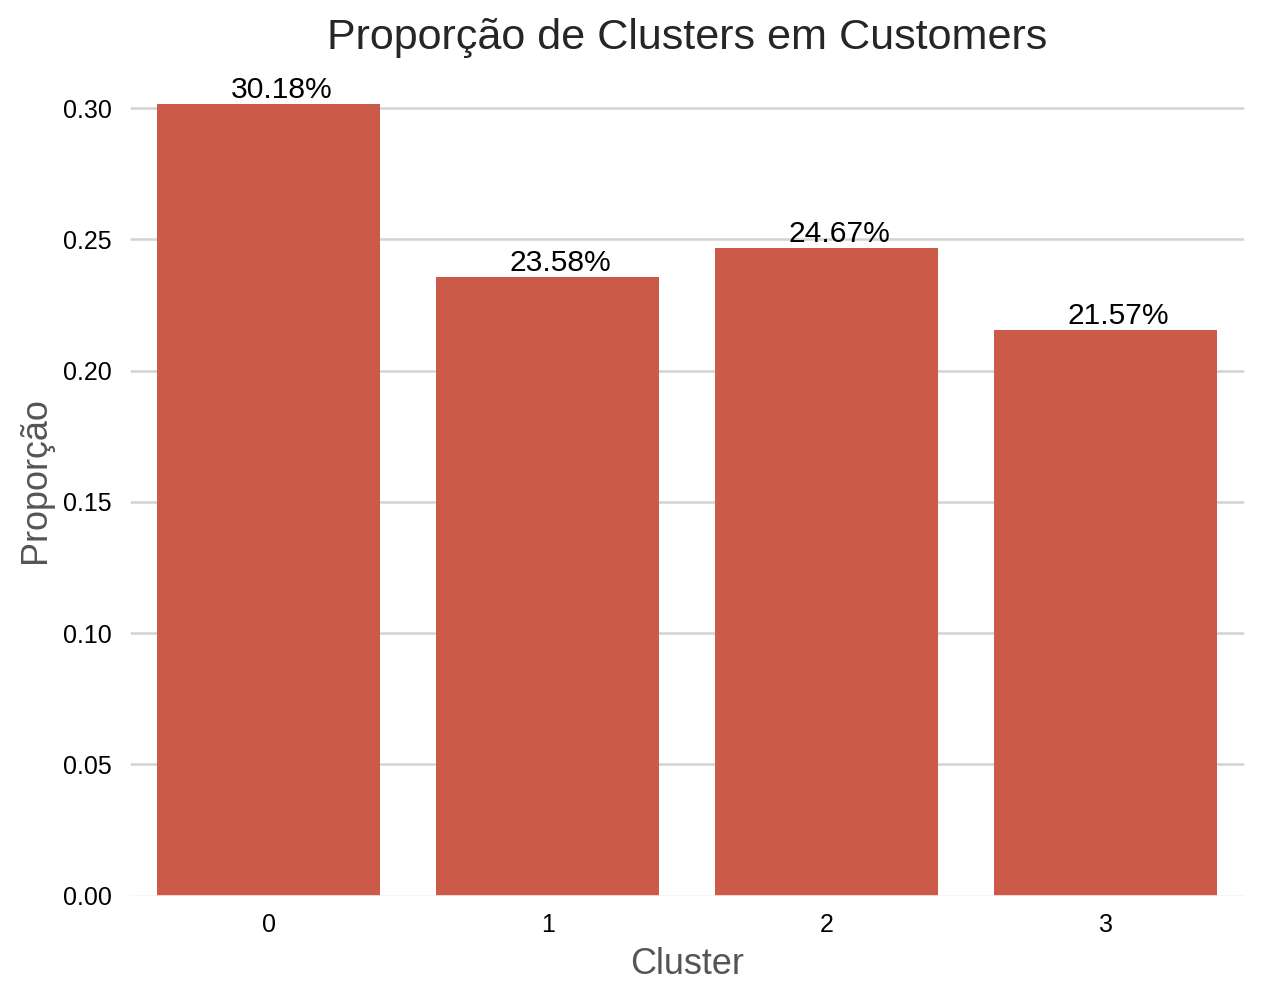

In [680]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=customers.Cluster.value_counts(normalize=True).reset_index(), x="Cluster", y="proportion")

ax.set_xlabel("Cluster")
ax.set_ylabel("Proporção")
ax.set_title("Proporção de Clusters em Customers")


set_annotate(fig, porcentages=True)

plt.show()

# Análise dos Clusters

Aqui, vou optar por observar as métricas estatísticas juntamente com gráficos para me auxiliar na análise do perfil de cada cluster

In [694]:
customers.groupby("Cluster").describe().T

Cluster                                    0             1              2  \
Income                  count     613.000000    479.000000     501.000000   
                        mean    41975.173736  61087.860125   75637.584331   
                        std     11972.256383   9879.870444   11275.754187   
                        min      4023.000000  36130.000000   32632.000000   
                        25%     34380.000000  54523.500000   69661.000000   
                        50%     41551.000000  60894.000000   76445.000000   
                        75%     49187.000000  67361.000000   82332.000000   
                        max    117963.250000  94871.000000  117963.250000   
Kidhome                 count     613.000000    479.000000     501.000000   
                        mean        0.755302      0.202505       0.023952   
                        std         0.529050      0.412557       0.153053   
                        min         0.000000      0.000000       0.000000   
                        25%         0.000000      0.000000       0.000000   
                        50%         1.000000      0.000000       0.000000   
                        75%         1.000000      0.000000       0.000000   
                        max         2.000000      2.000000       1.000000   
Teenhome                count     613.000000    479.000000     501.000000   
                        mean        0.761827      0.947808       0.119760   
                        std         0.497094      0.413413       0.325006   
                        min         0.000000      0.000000       0.000000   
                        25%         0.000000      1.000000       0.000000   
                        50%         1.000000      1.000000       0.000000   
                        75%         1.000000      1.000000       0.000000   
                        max         2.000000      2.000000       1.000000   
Recency                 count     613.000000    479.000000     501.000000   
                        mean       48.794454     48.968685      48.960080   
                        std        29.077710     28.697985      29.395823   
                        min         0.000000      0.000000       0.000000   
                        25%        24.000000     25.000000      23.000000   
                        50%        49.000000     49.000000      51.000000   
                        75%        75.000000     72.000000      73.000000   
                        max        99.000000     99.000000      99.000000   
MntWines                count     613.000000    479.000000     501.000000   
                        mean       85.107667    560.997912     574.714571   
                        std        80.457768    283.345521     308.857657   
                        min         2.000000     96.000000       1.000000   
                        25%        23.000000    341.500000     332.000000   
                        50%        53.000000    508.000000     531.000000   
                        75%       135.000000    734.500000     792.000000   
                        max       451.000000   1228.000000    1228.000000   
MntFruits               count     613.000000    479.000000     501.000000   
                        mean        3.641109     23.920668      51.950100   
                        std         6.189946     24.094479      26.861059   
                        min         0.000000      0.000000       0.000000   
                        25%         0.000000      5.000000      26.000000   
                        50%         1.000000     16.000000      55.000000   
                        75%         4.000000     35.000000      79.500000   
                        max        55.000000     79.500000      79.500000   
MntMeatProducts         count     613.000000    479.000000     501.000000   
                        mean       32.629690    159.123173     397.904192   
                        std        33.854913    106.672432     154.079755

In [685]:
customers.groupby("Cluster").describe(include=["object", "category"]).T

Cluster                                     0           1           2  \
Education                  count          613         479         501   
                           unique           4           4           5   
                           top     Graduation  Graduation  Graduation   
                           freq           284         228         276   
Living_With                count          613         479         501   
                           unique           2           2           2   
                           top        Partner     Partner     Partner   
                           freq           399         312         307   
Preferred_Product_Category count          613         479         501   
                           unique           4           3           3   
                           top       MntWines    MntWines    MntWines   
                           freq           553         461         344   

Cluster                                          3  
Education                  count               438  
                           unique                5  
                           top          Graduation  
                           freq                231  
Living_With                count               438  
                           unique                2  
                           top             Partner  
                           freq                283  
Preferred_Product_Category count               438  
                           unique                6  
                           top     MntMeatProducts  
                           freq                155

De uma maneira mais visual: 

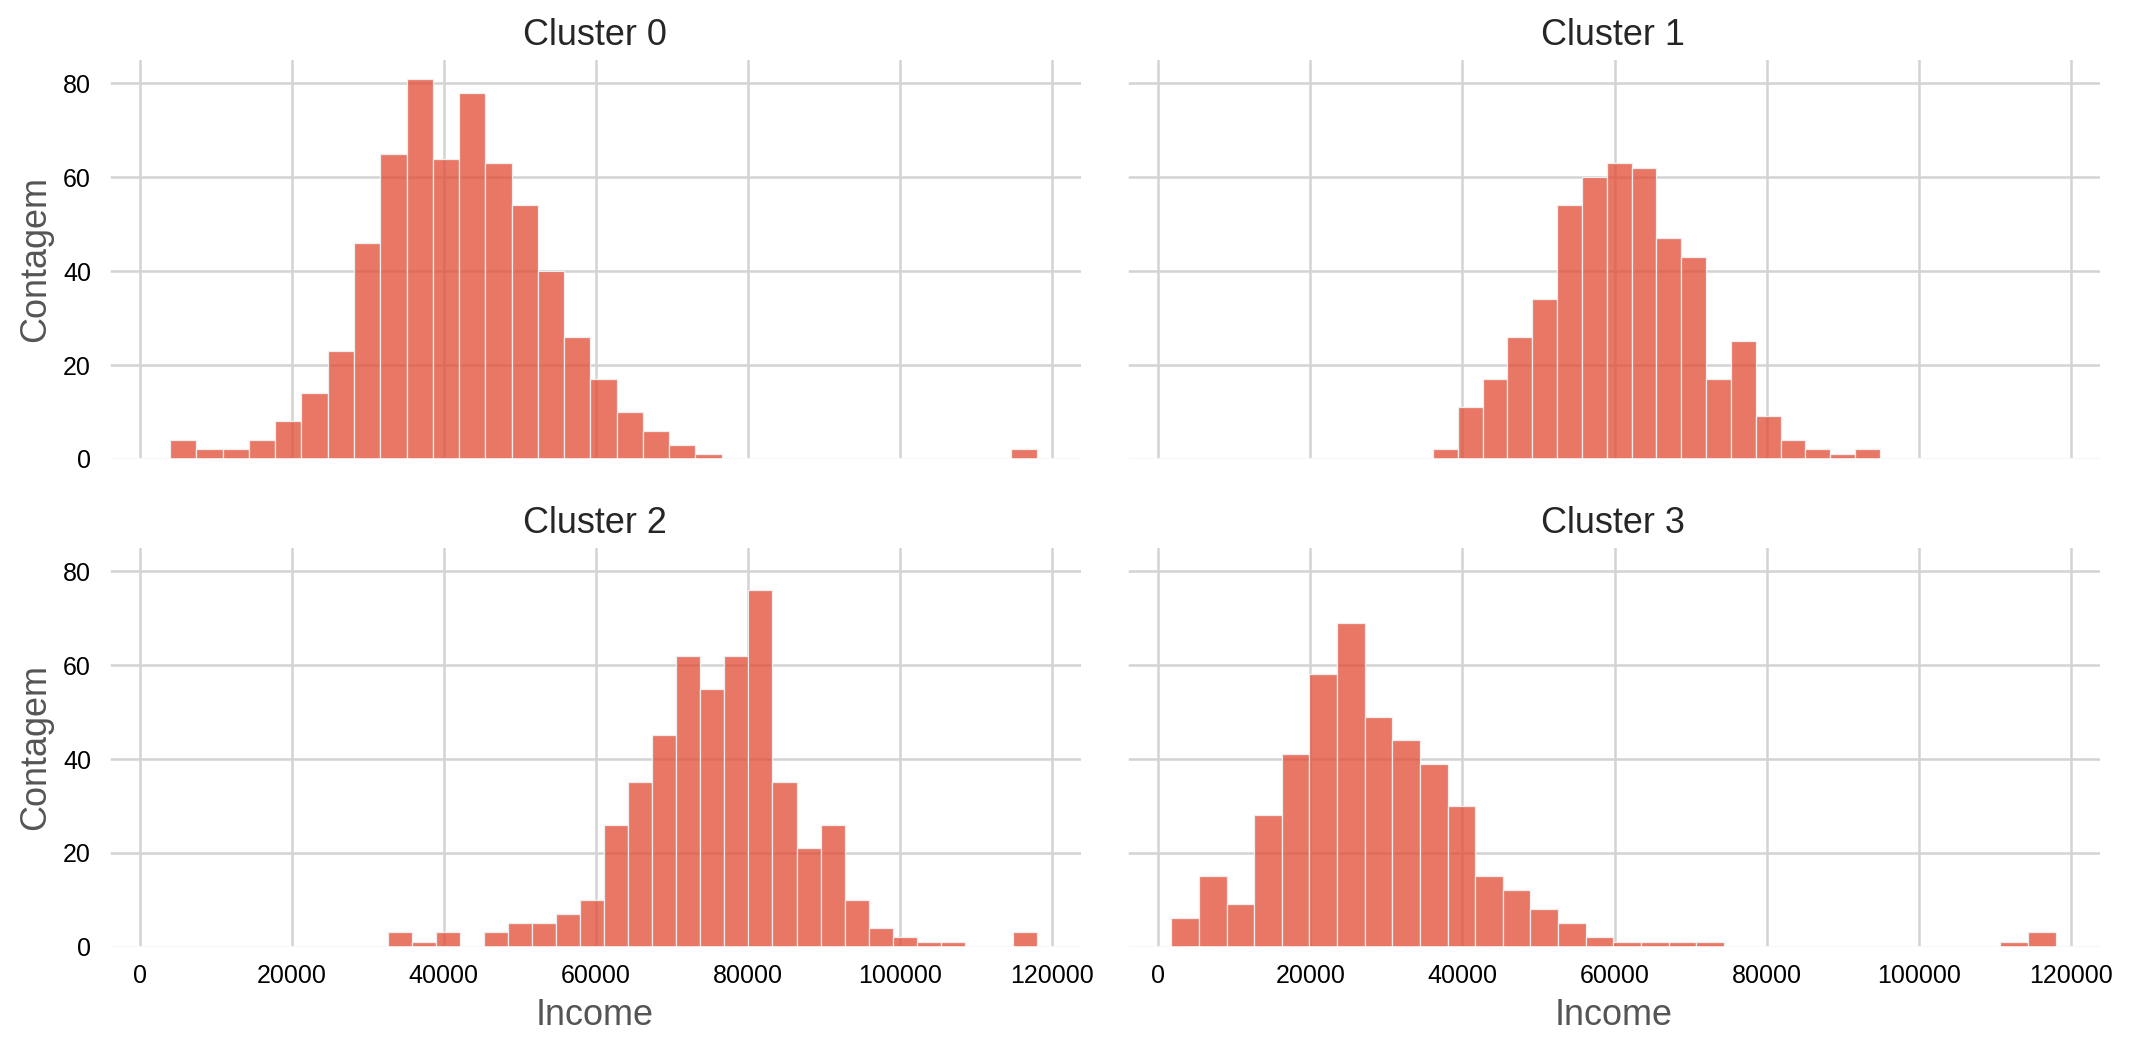

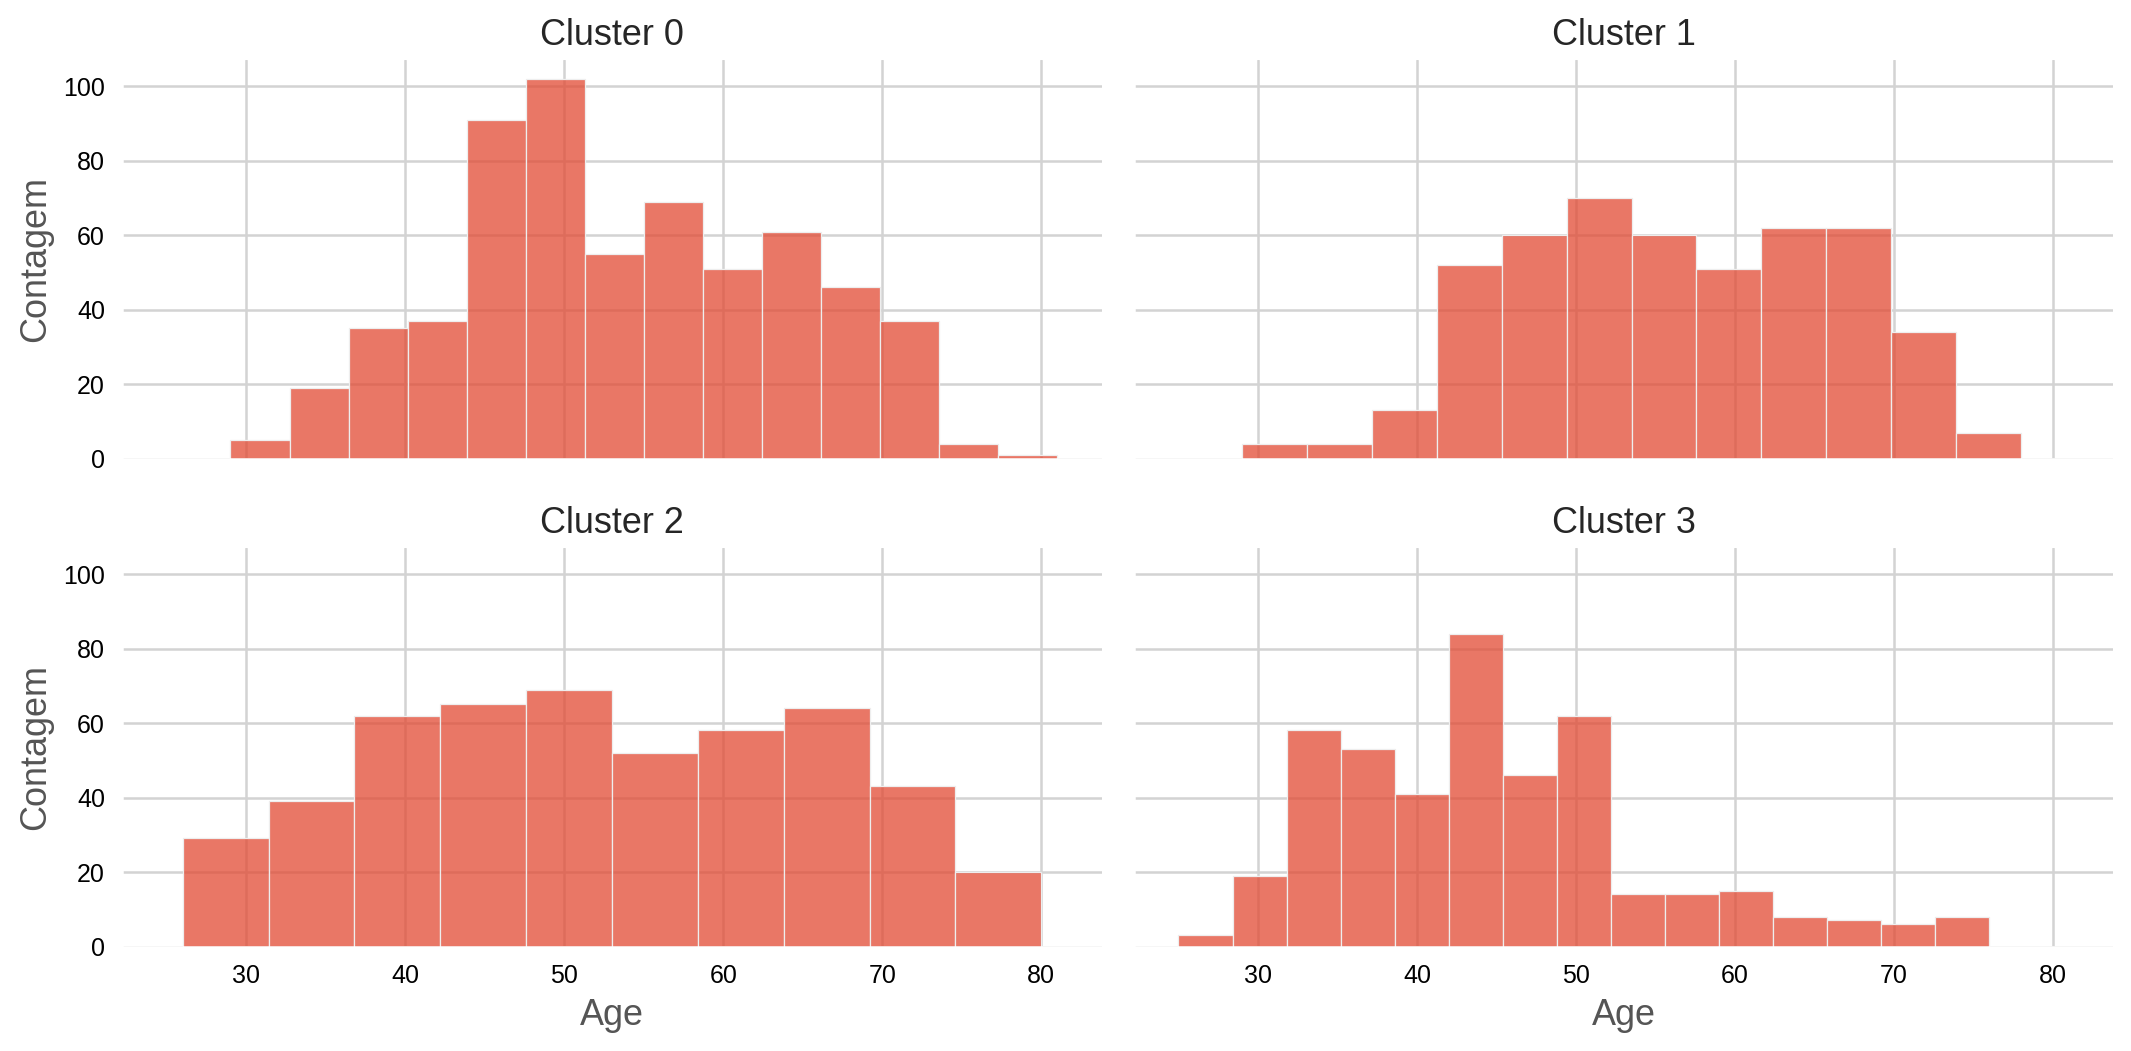

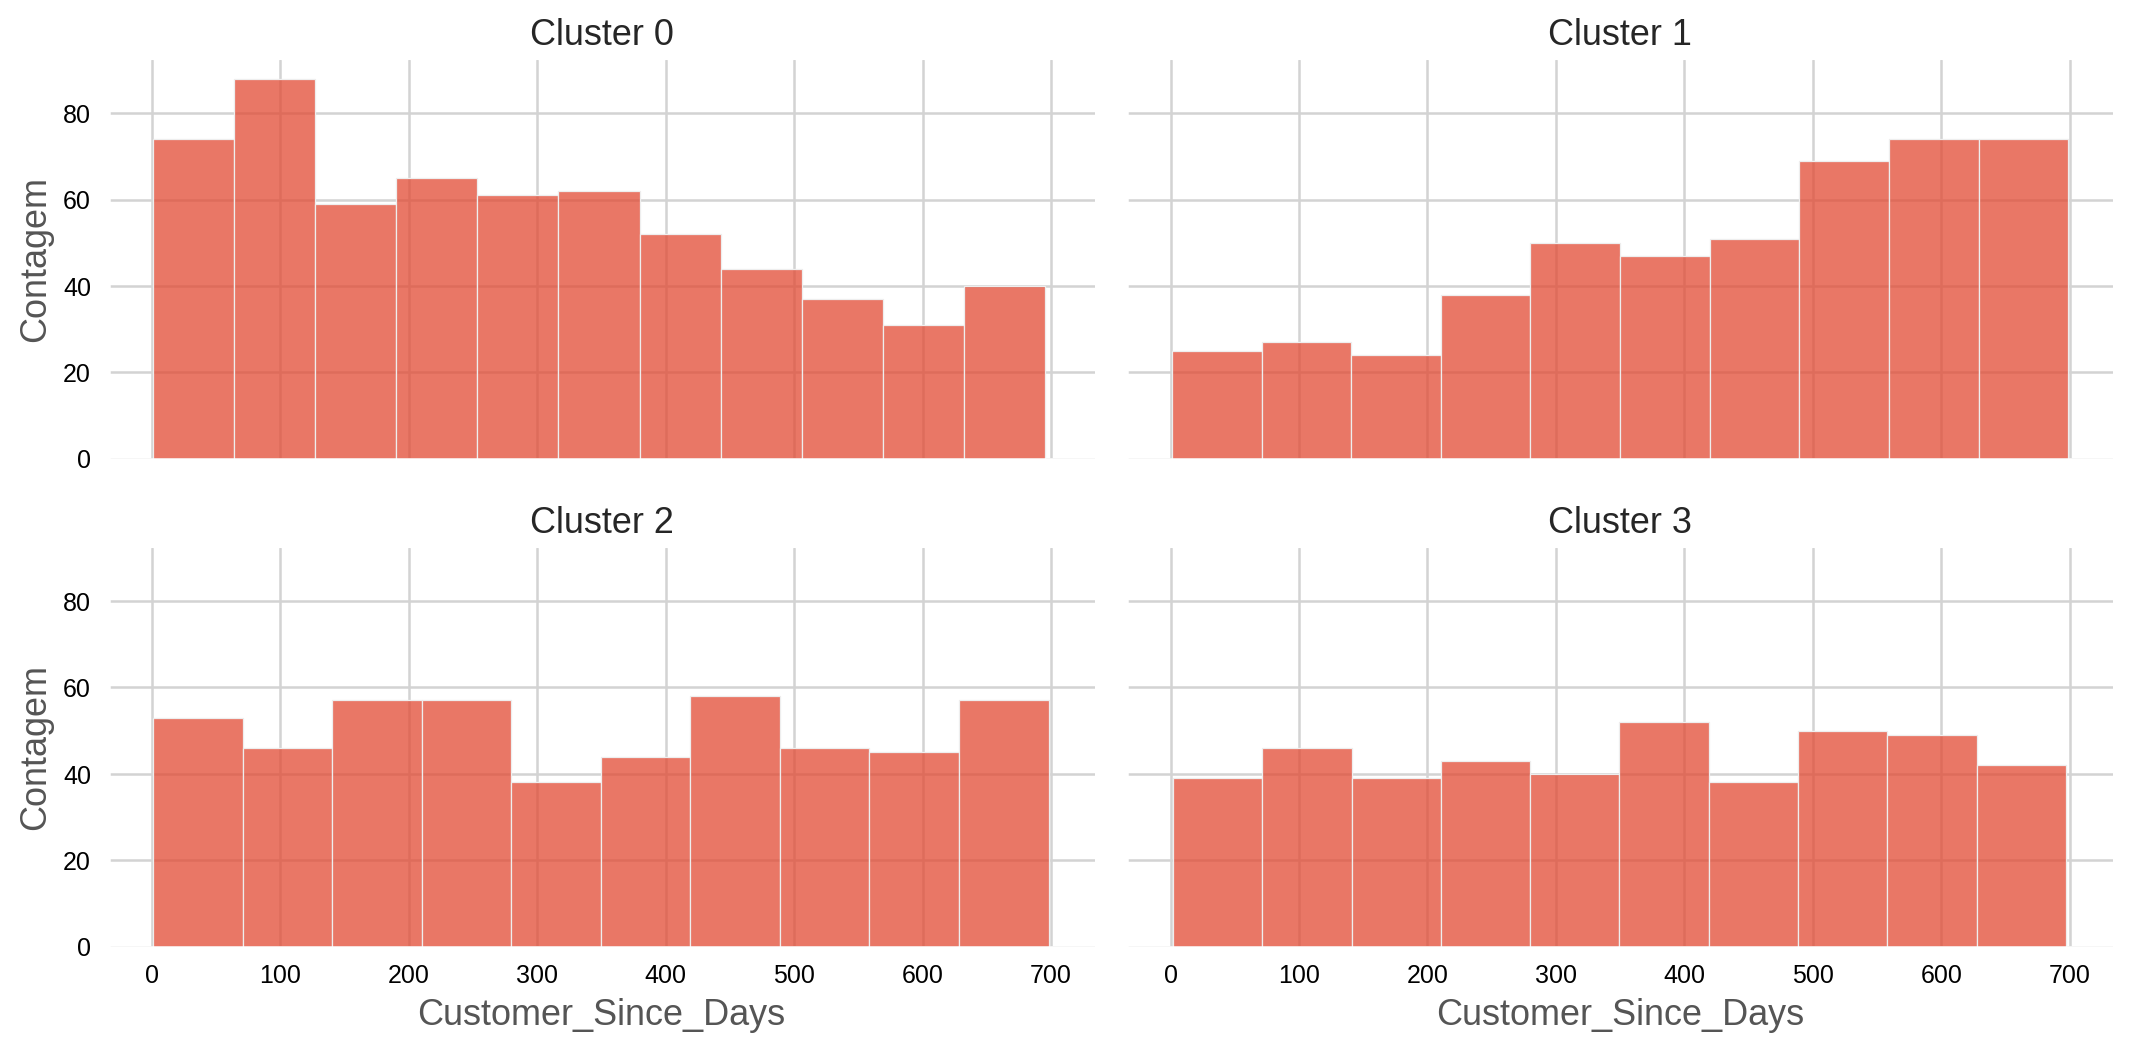

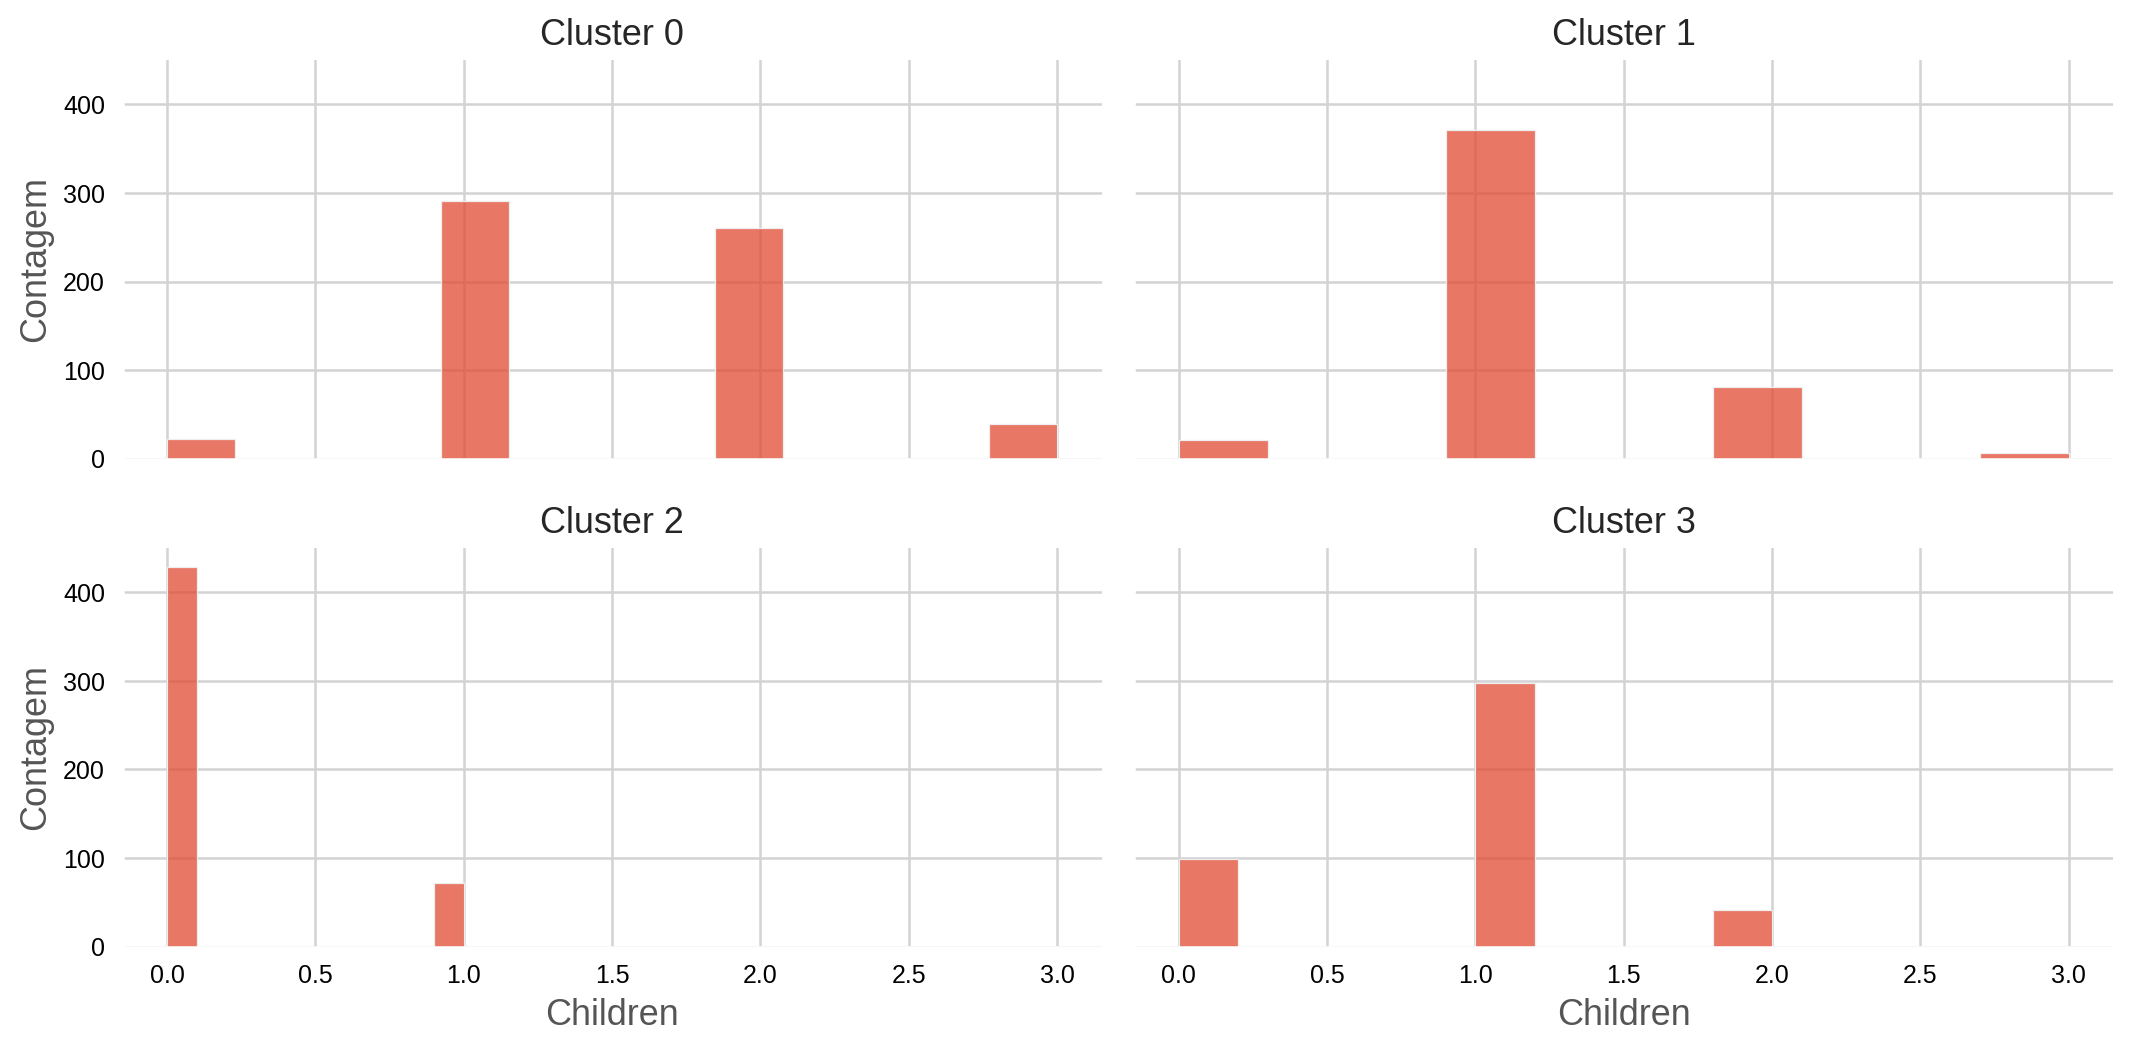

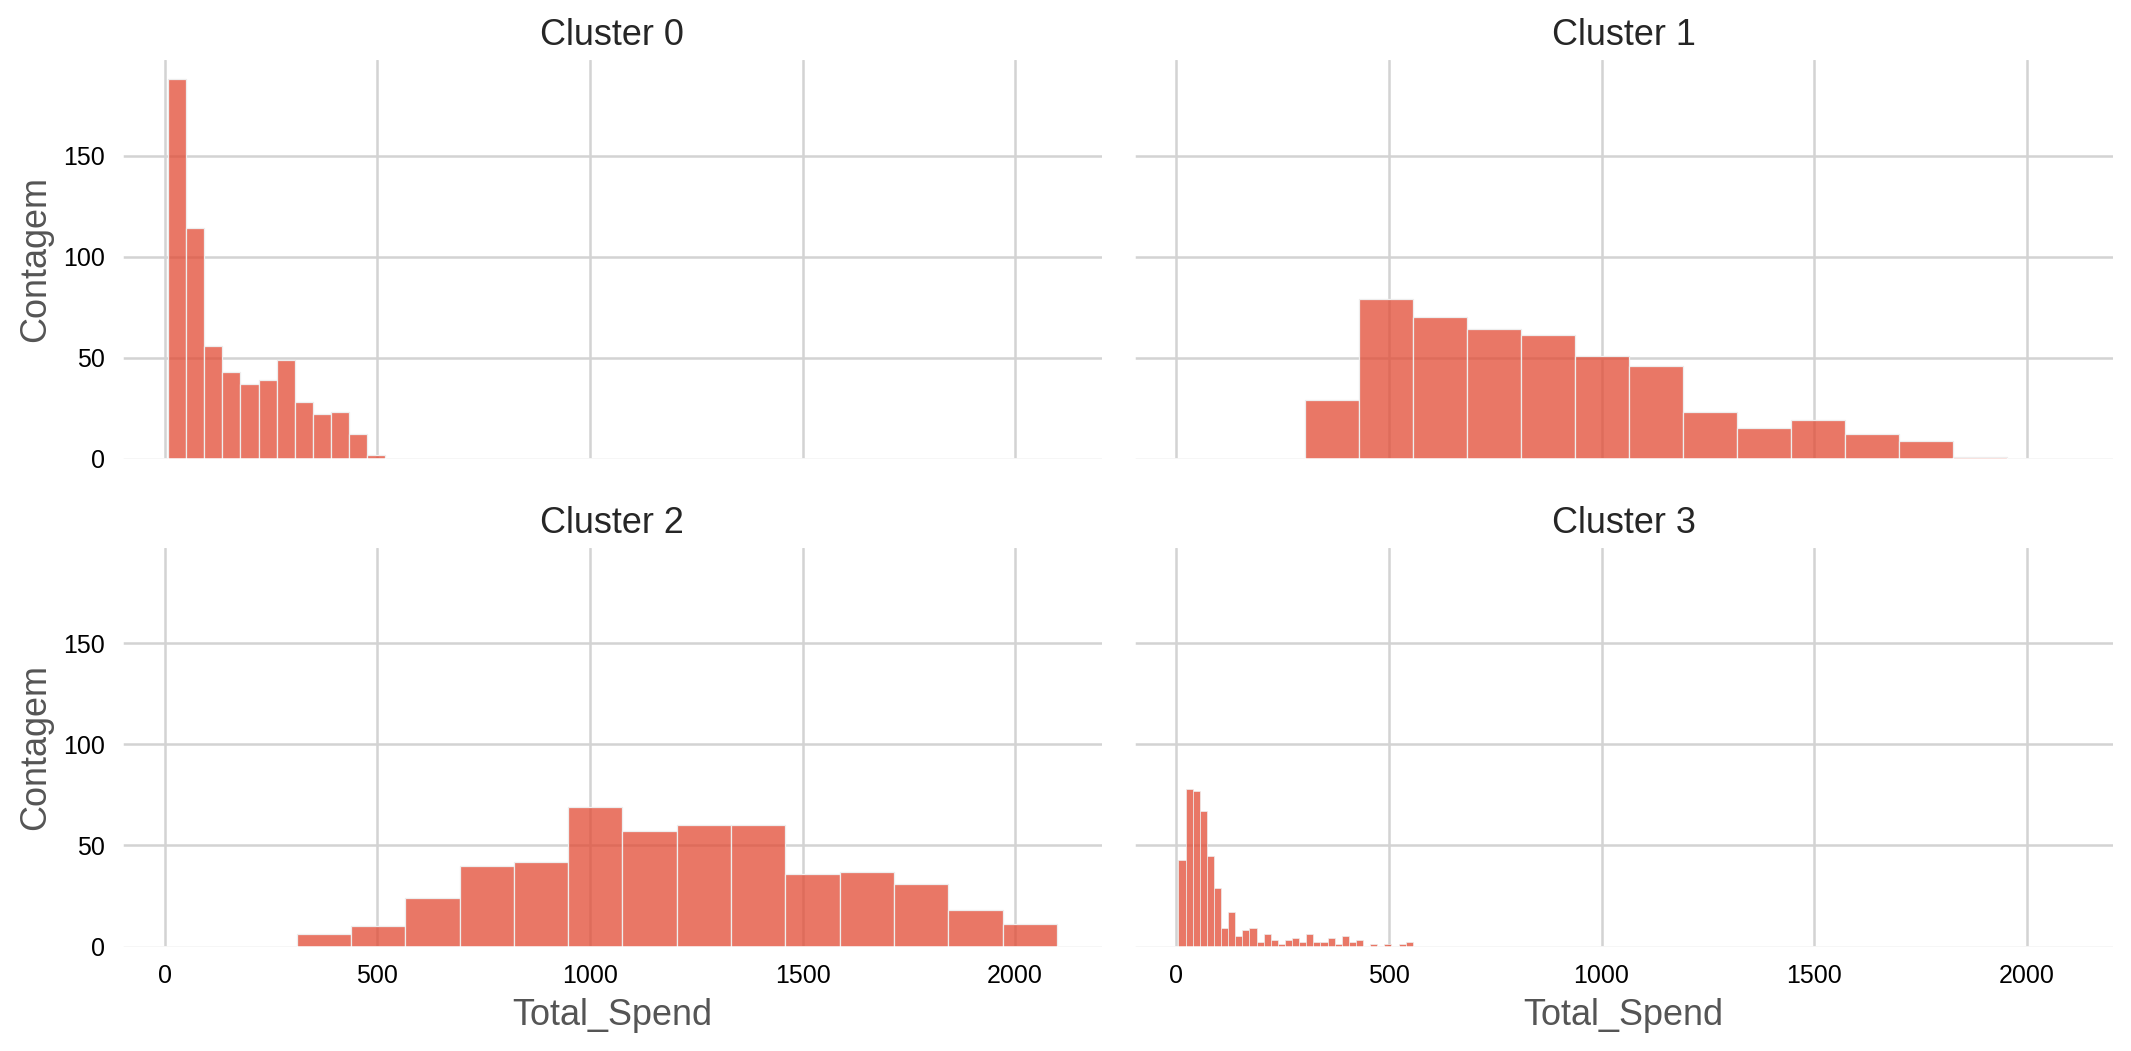

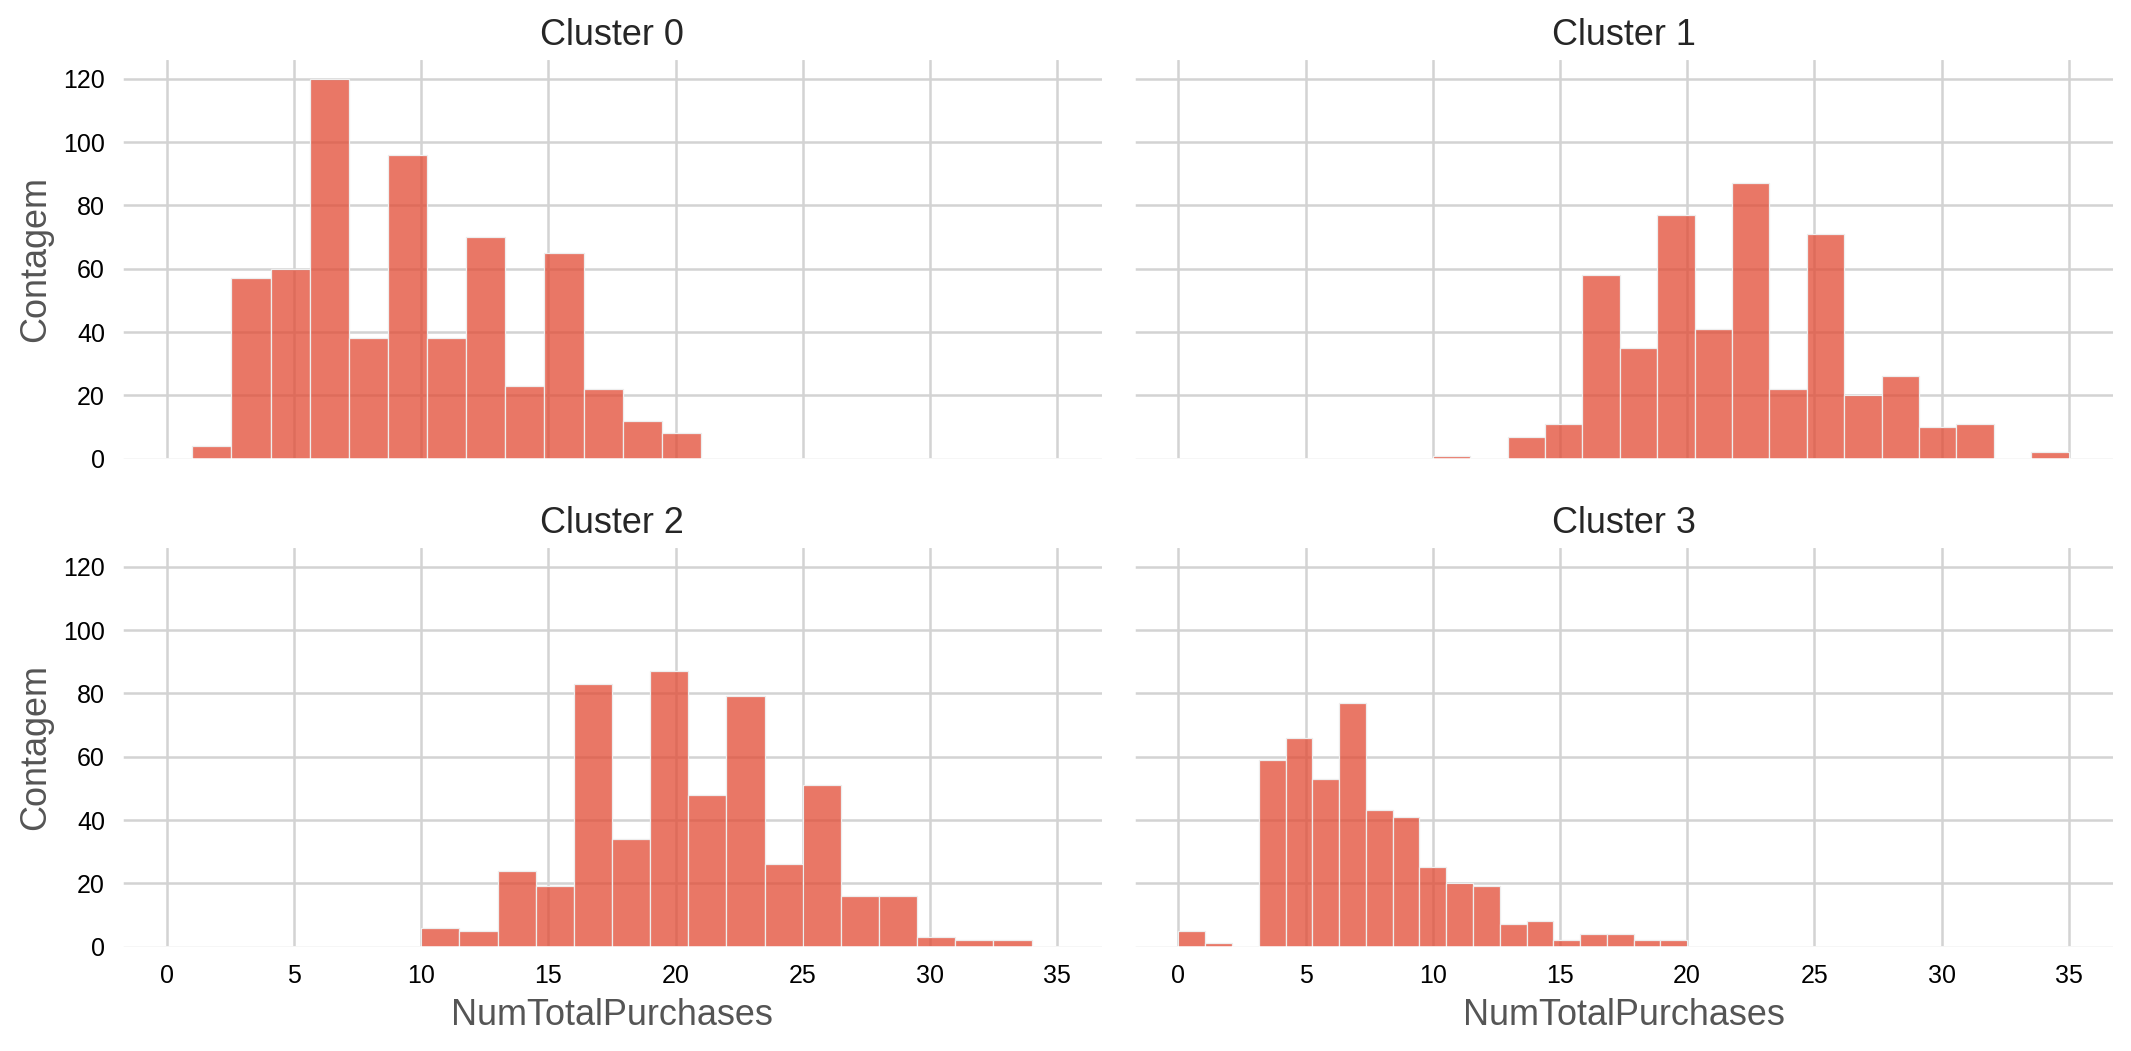

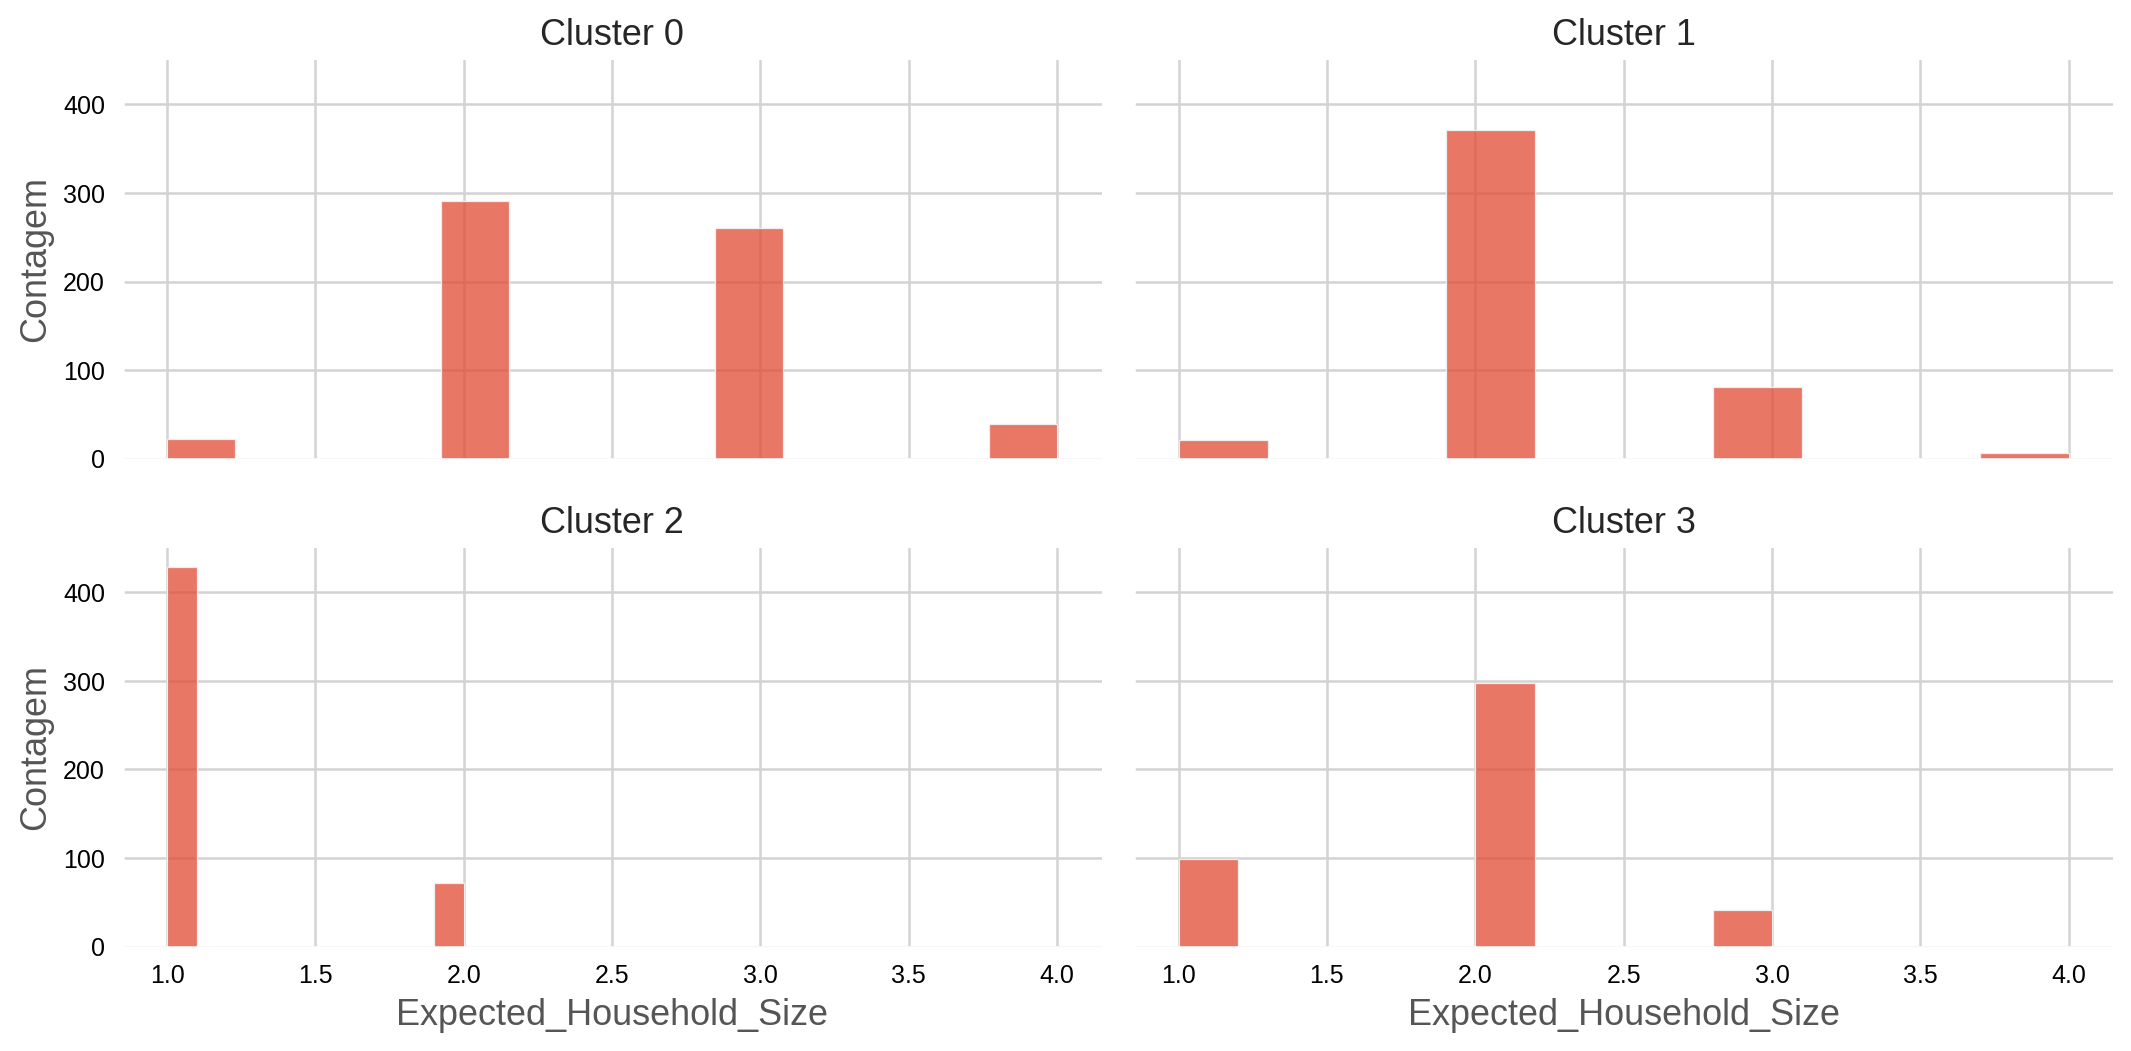

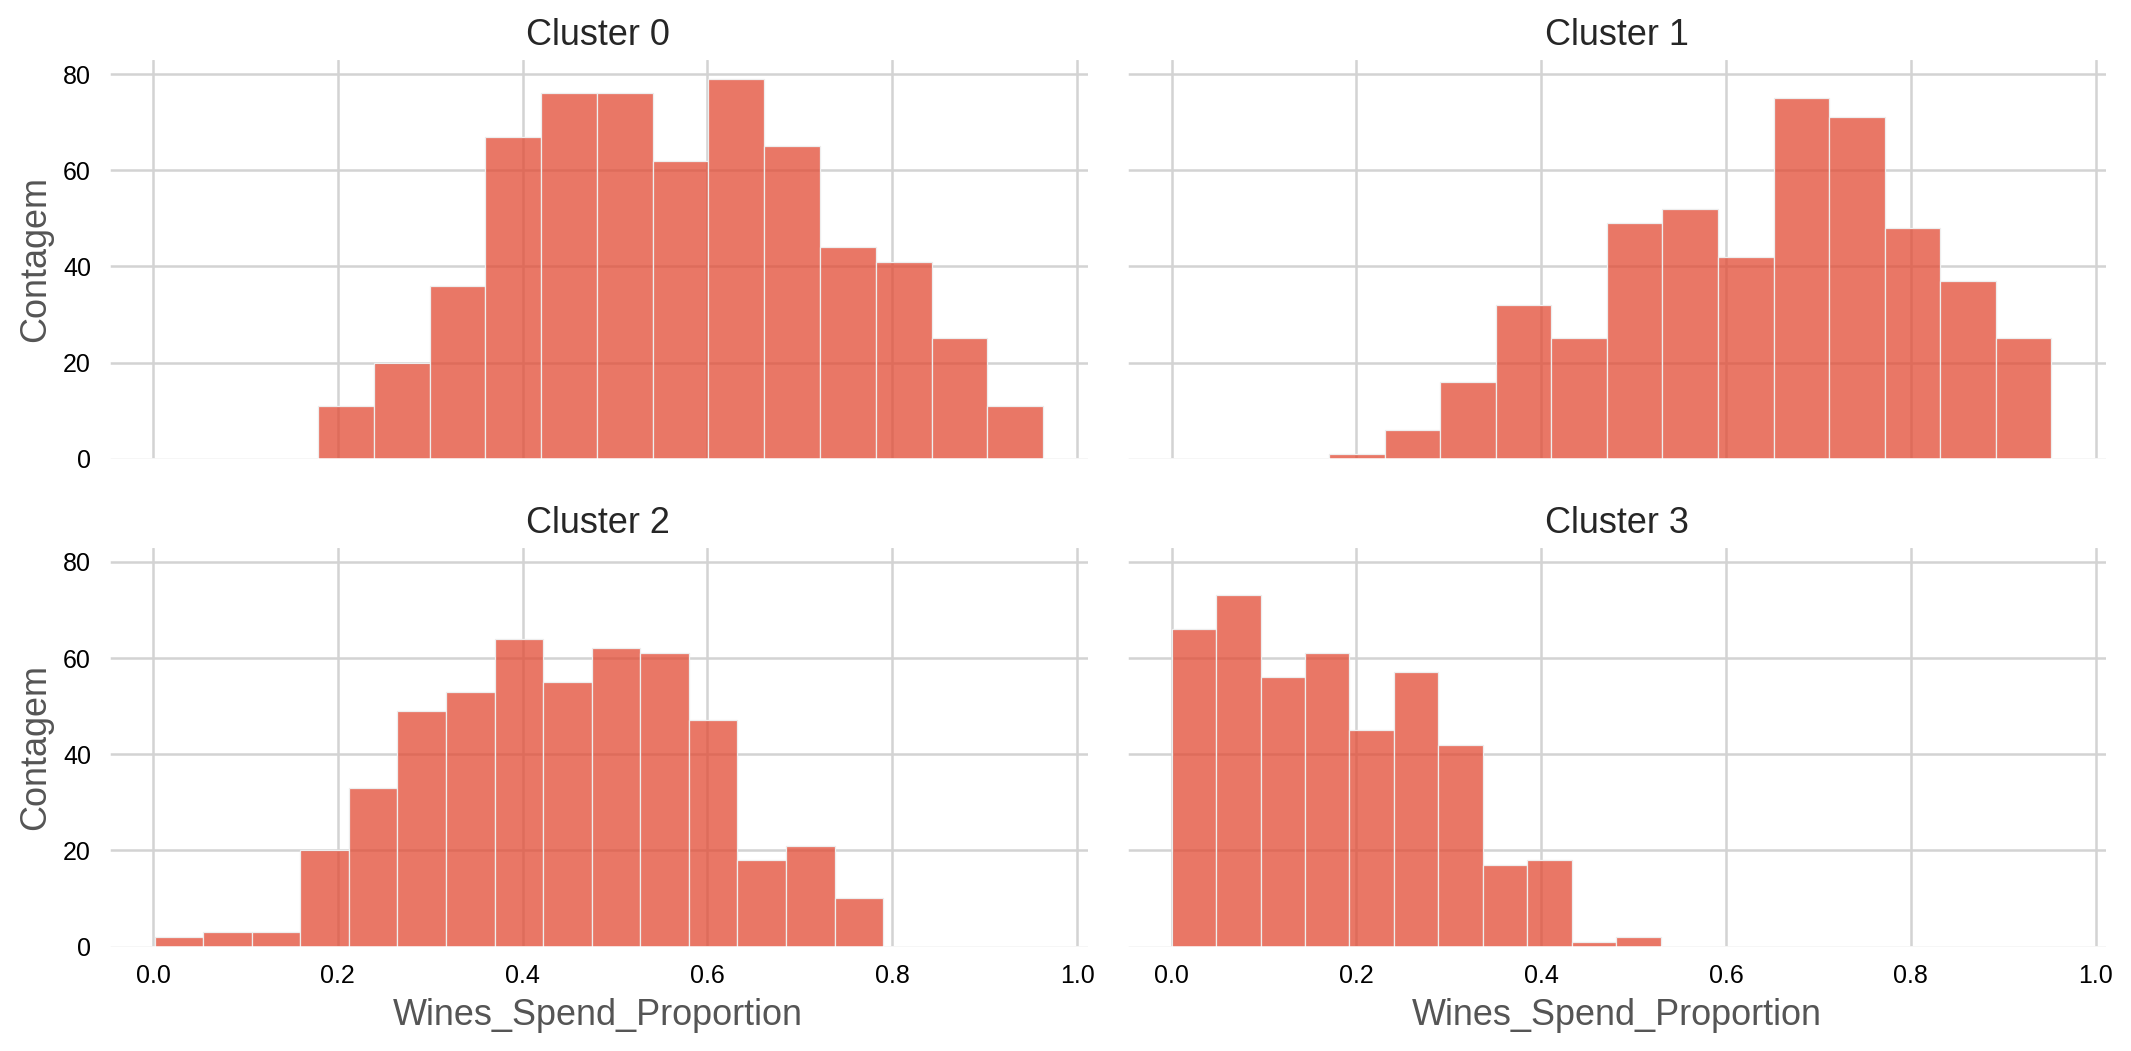

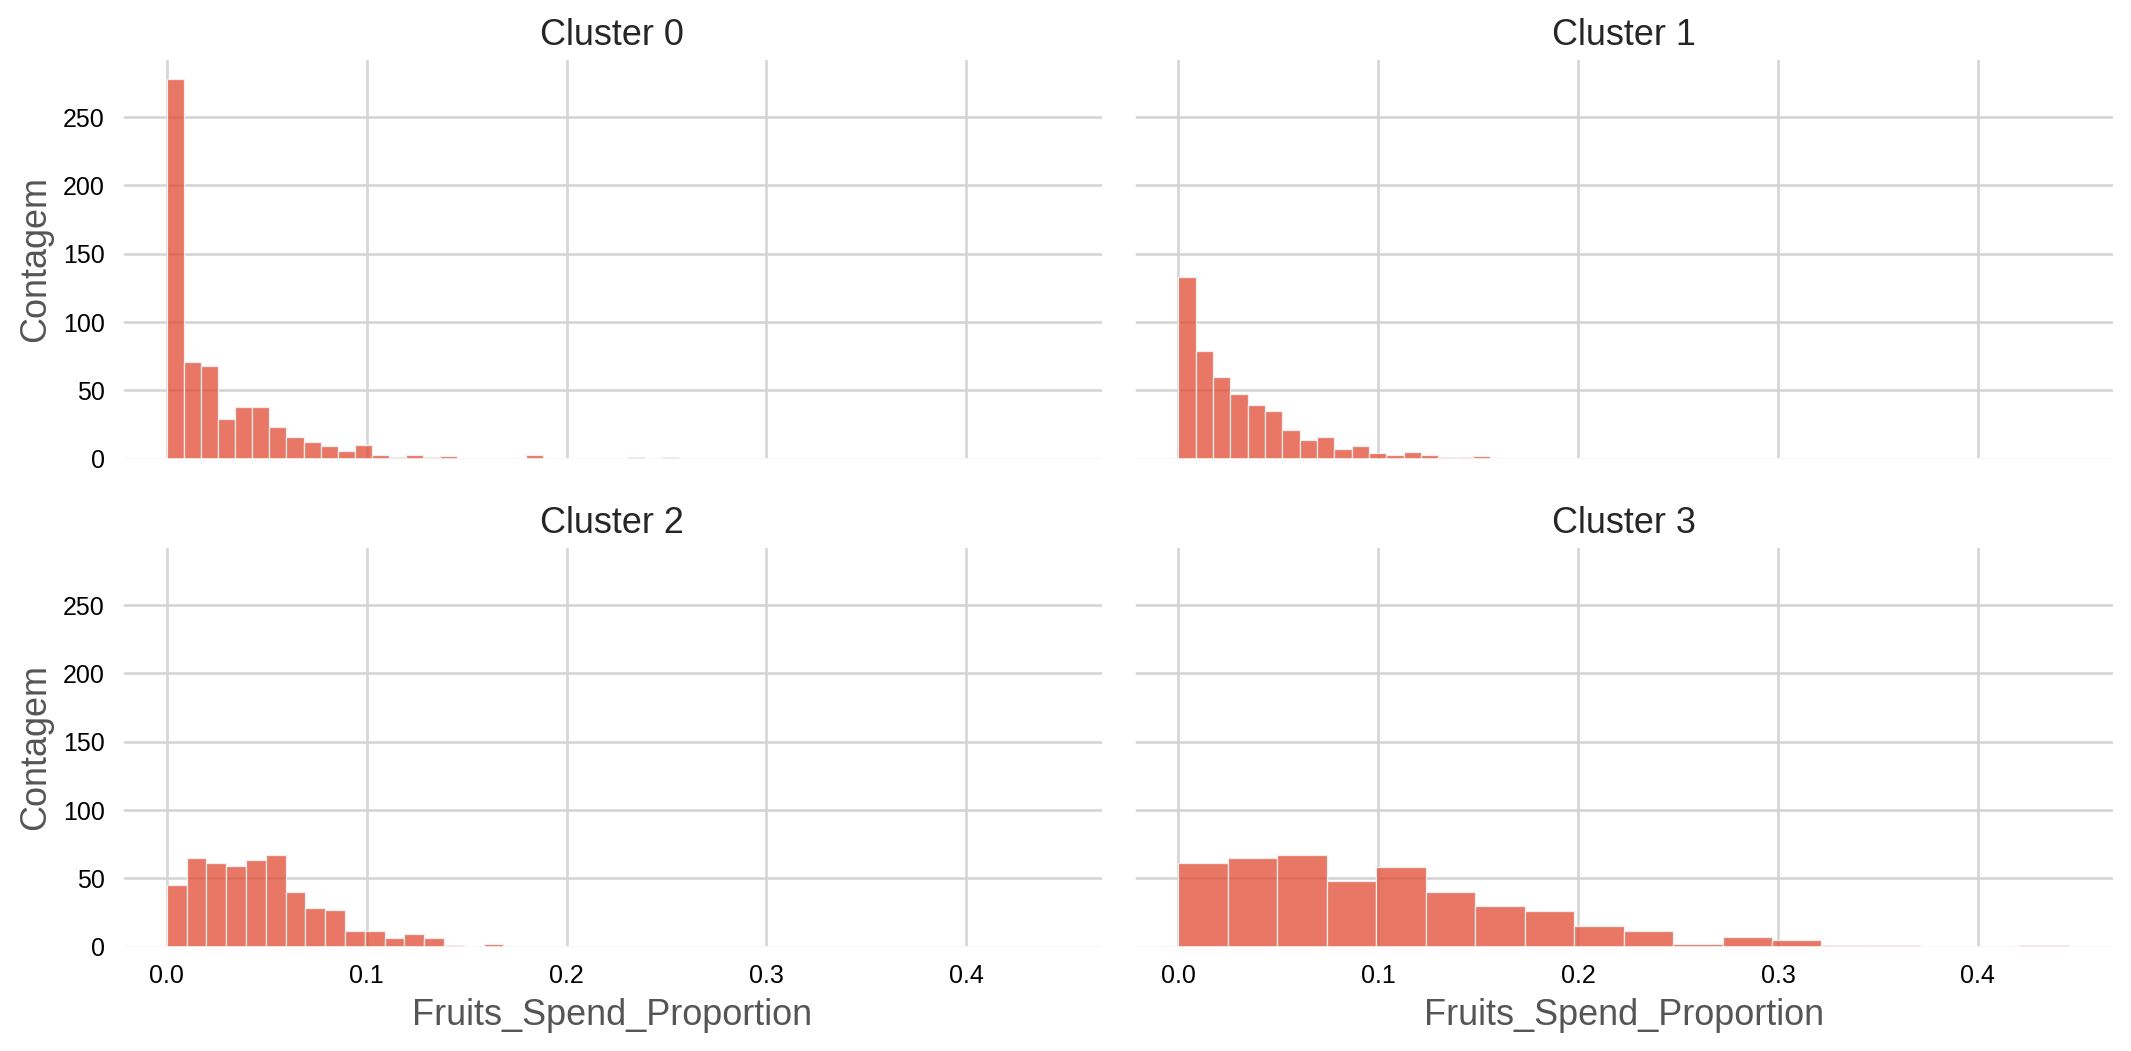

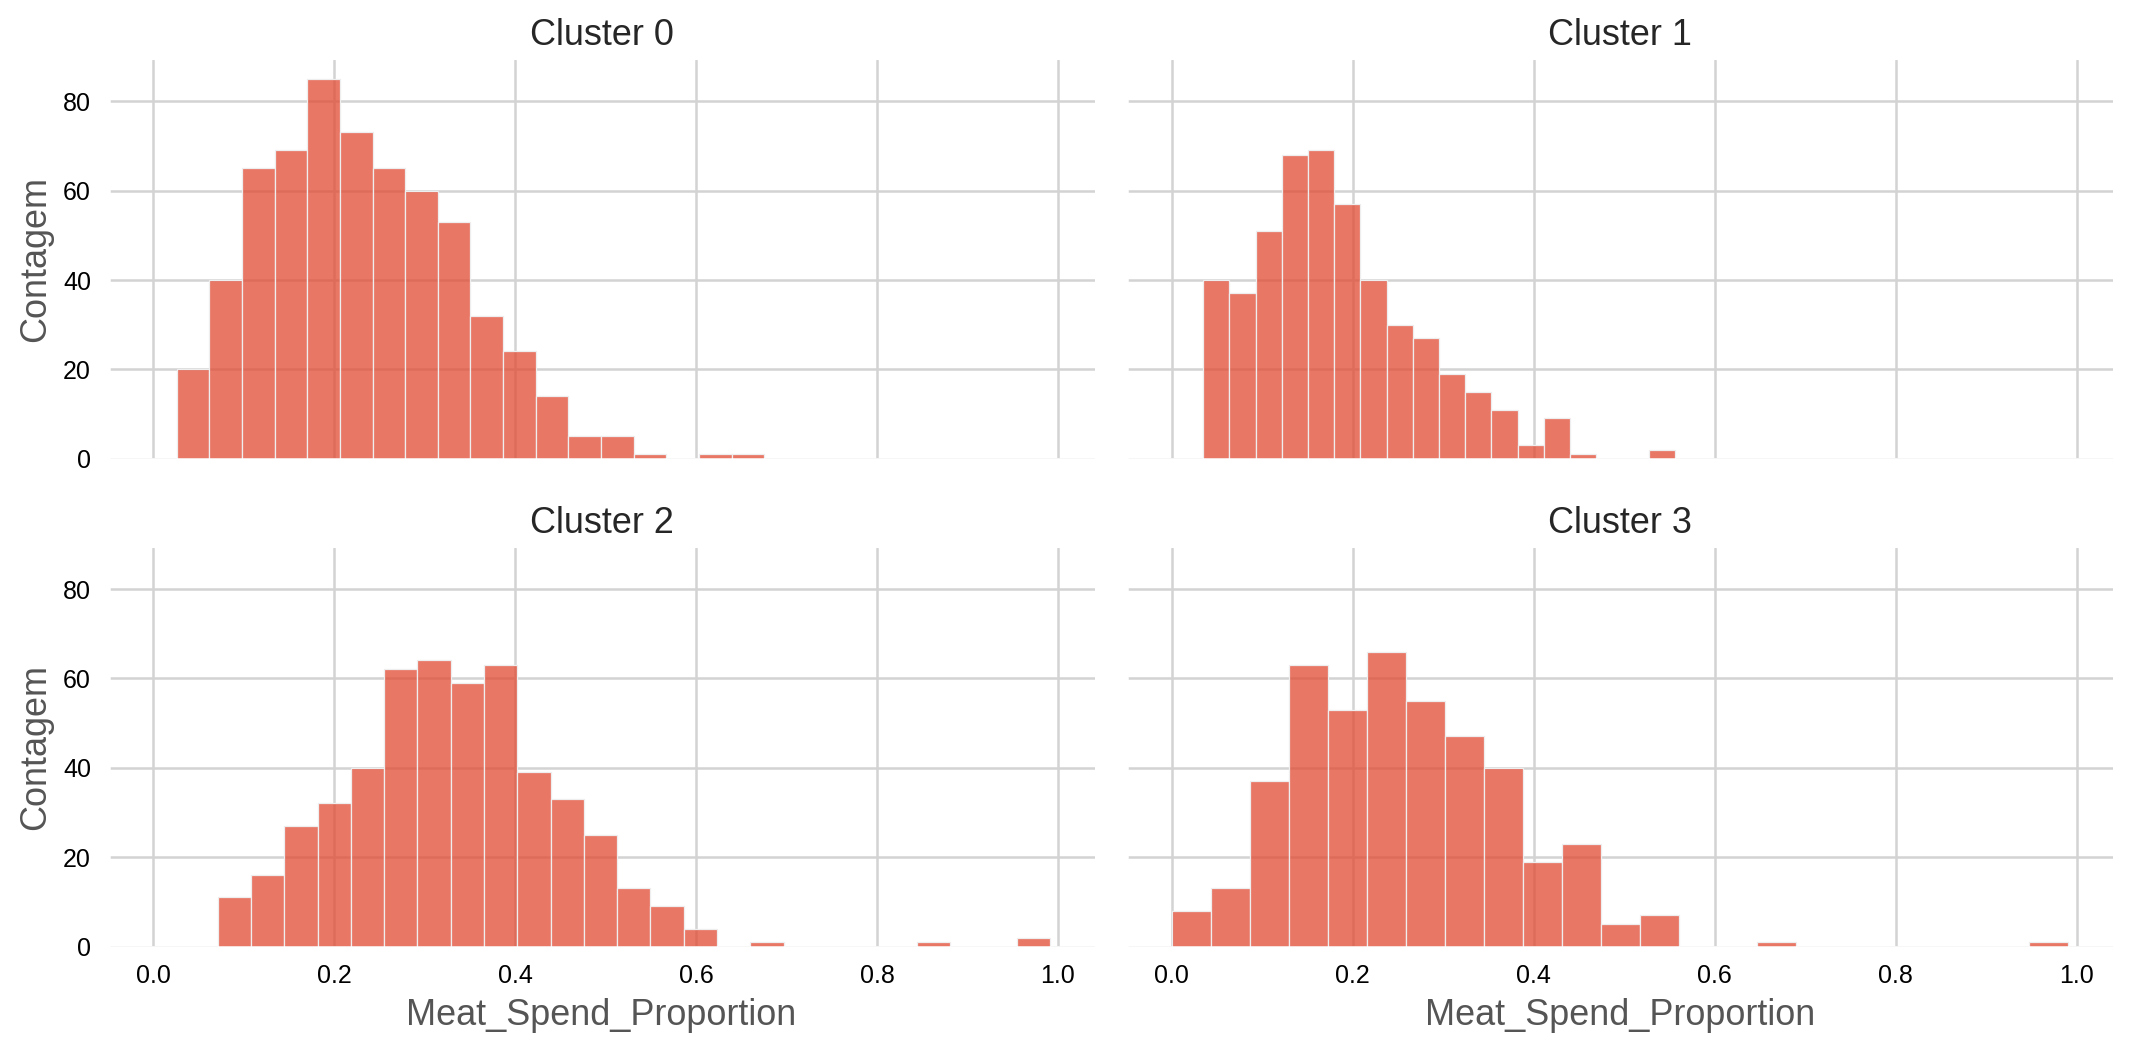

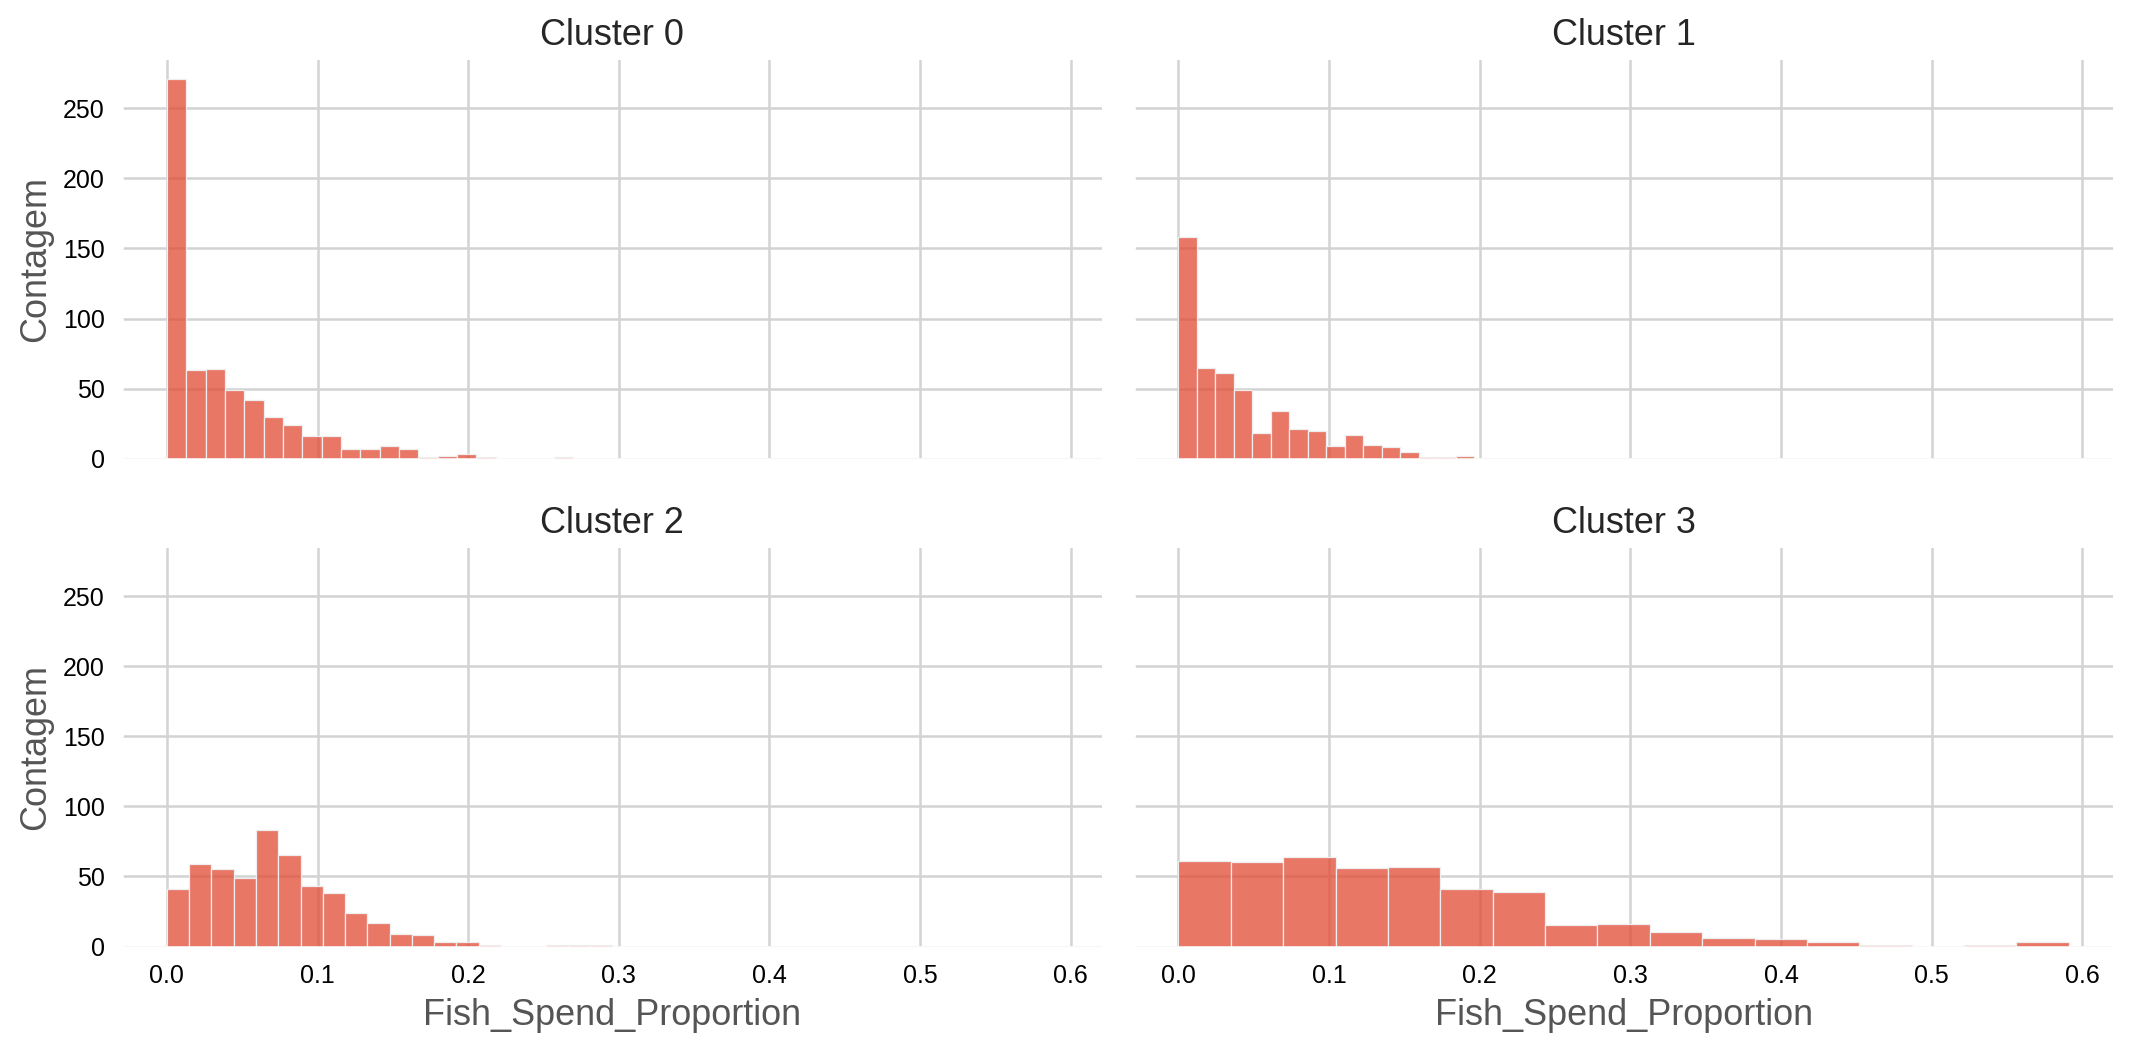

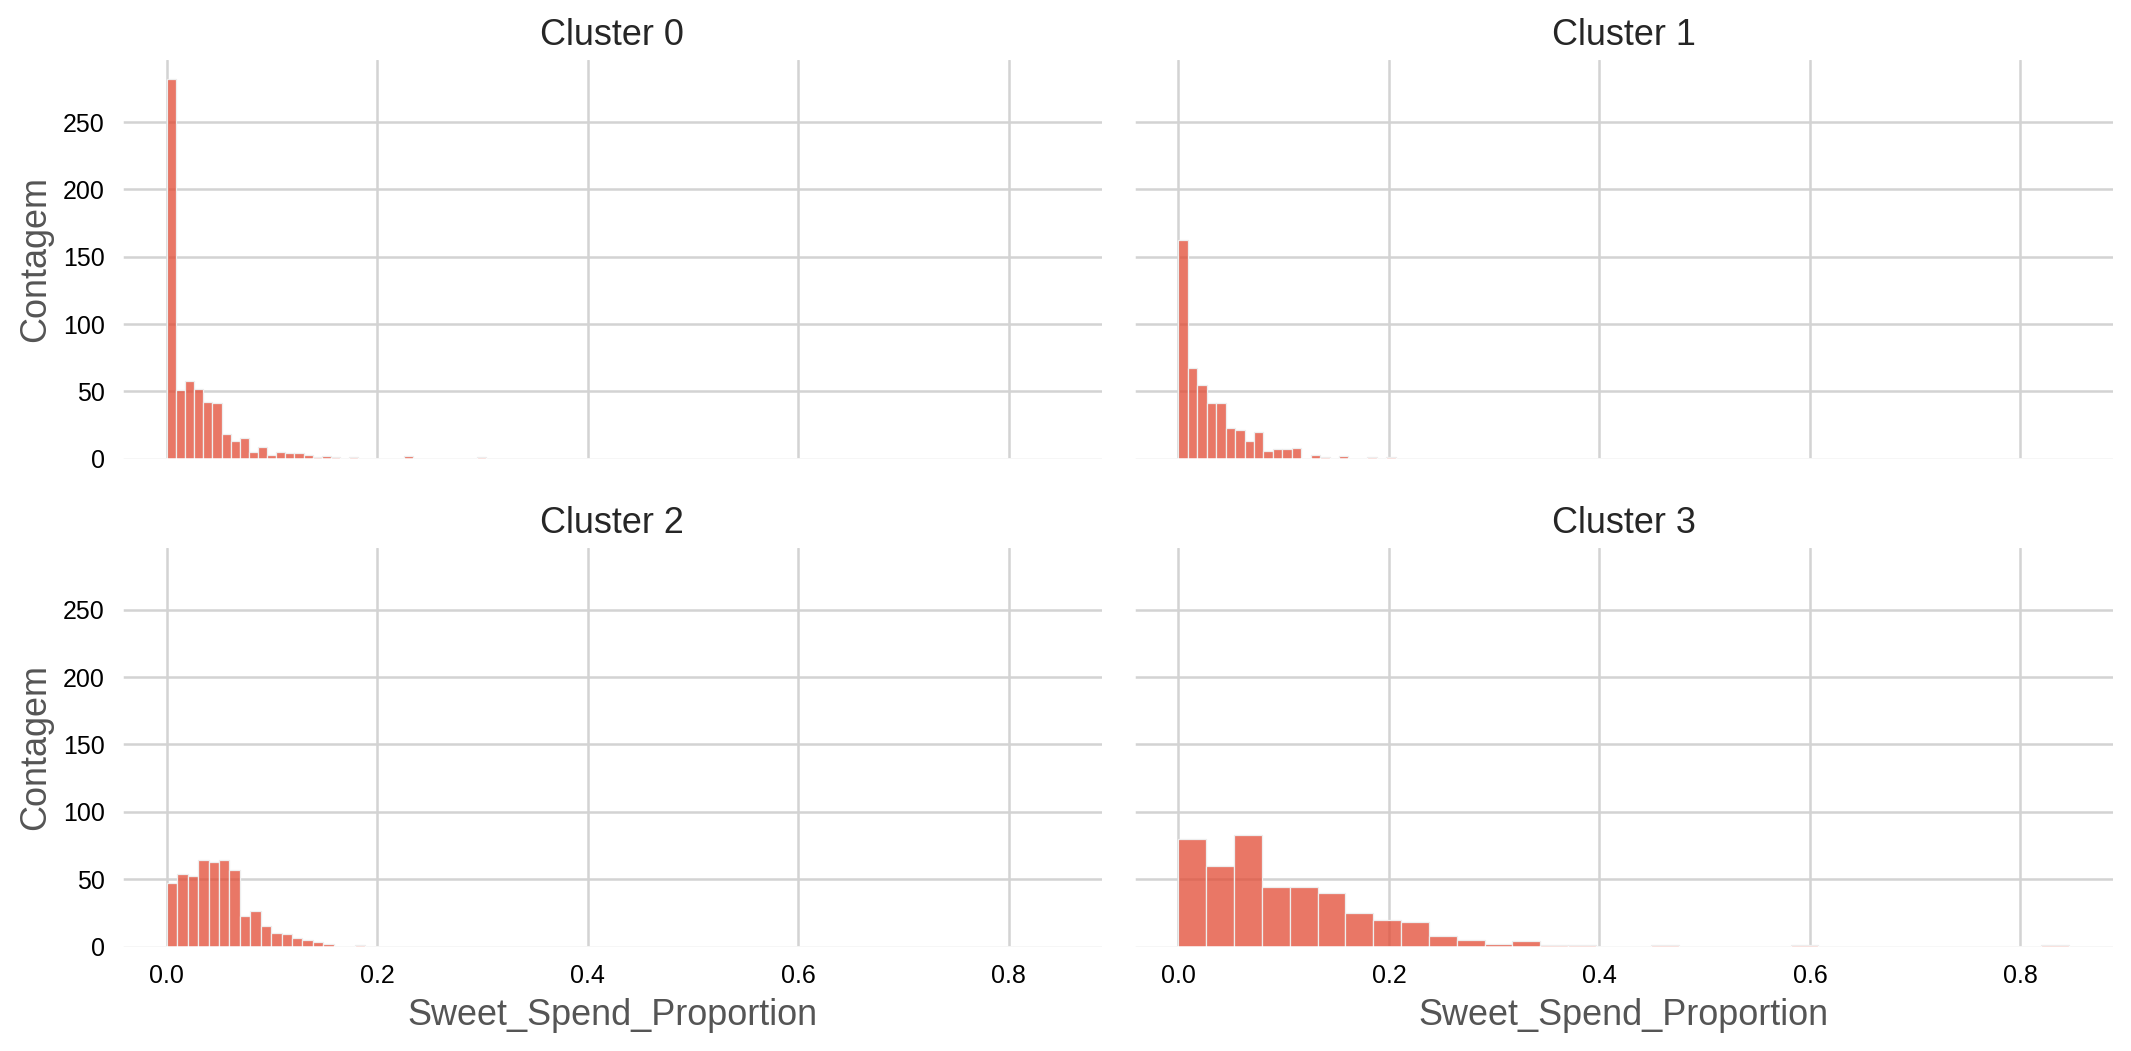

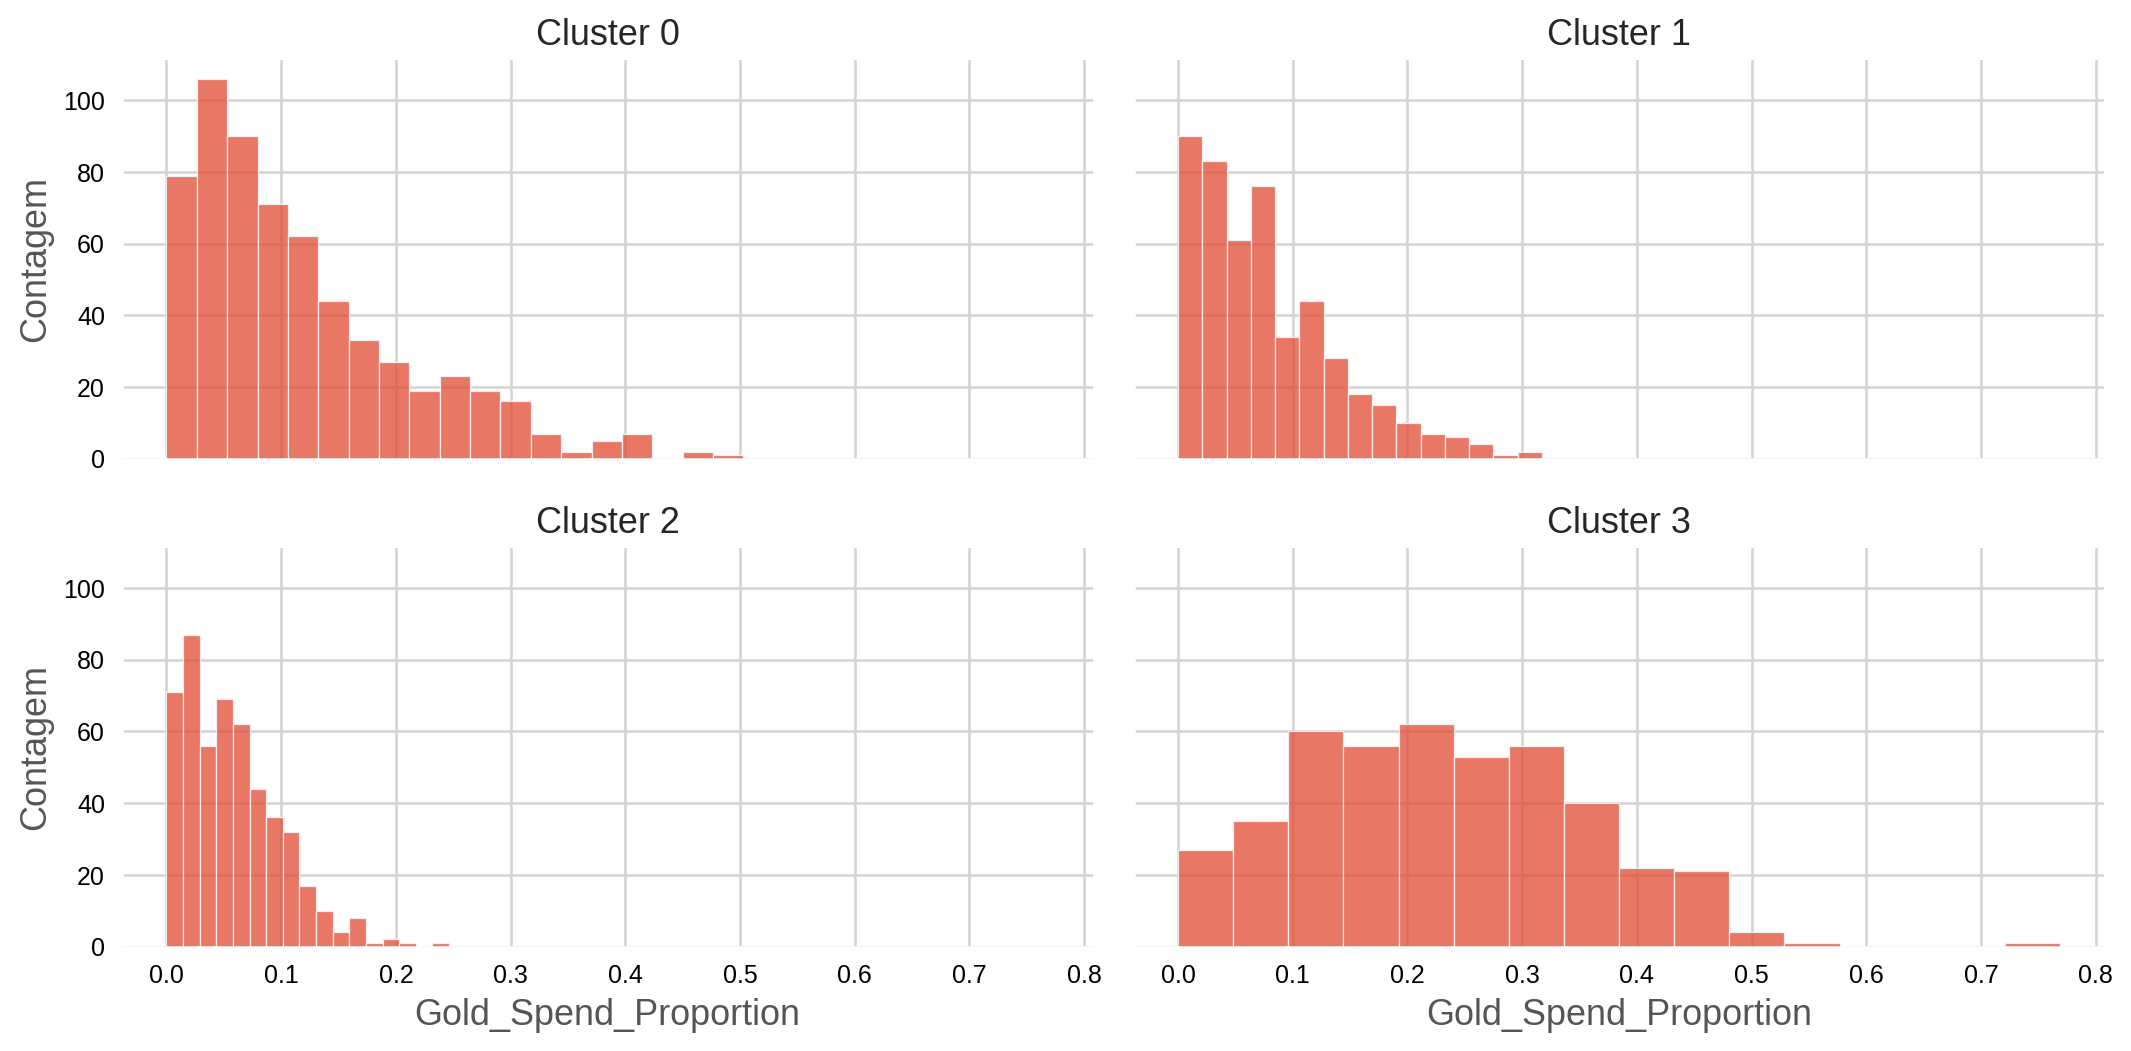

In [702]:
cols_cluster_analise = ['Income',
                        'Age',
                        'Customer_Since_Days',
                        'Children',
                        'Total_Spend',
                        'NumTotalPurchases',
                        'Expected_Household_Size',
                        'Wines_Spend_Proportion',
                        'Fruits_Spend_Proportion',
                        'Meat_Spend_Proportion',
                        'Fish_Spend_Proportion',
                        'Sweet_Spend_Proportion',
                        'Gold_Spend_Proportion']

for col in cols_cluster_analise:
    g = sns.FacetGrid(customers, col="Cluster", col_wrap=2, height=3, aspect=2)
    g.map(sns.histplot, col)

    g.set_titles(col_template="Cluster {col_name}")
    g.set_axis_labels(col, "Contagem")

    
    plt.show()

## Análise do Perfil de Cada Cluster 

**Cluster 0**:
- Este cluster tem uma renda média baixa comparada aos outros clusters (U$ 41.975,17)
- Despesas modestas com vinhos e carnes
- Pouco gasto com frutas, peixes, doces e produtos de ouro
- Realizam mais compras em loja física e web, com um número considerável de visitas ao site
- Possuem 1,52 filhos em média
- Média de 53,68 anos
- Média de 295 dias sendo clientes


**Cluster 1**:
- Cluster com renda média-alta (U$ 61.087,86)
- Gastam consideravelmente com vinhos, carnes e produtos de ouro
- Realizam muitas compras via web e catálogo
- Têm um número alto de visitas ao site e compras em loja física
- Possuem 1,15 filhos em média
- Clientes relativamente mais velhos (Média de 56,27 anos)
- Média de 425 dias sendo clientes

**Cluster 2**:
- Cluster com a renda mais alta (U$ 75.637,58)
- Gastam significativamente com vinhos, carnes e produtos de ouro
- Realizam muitas compras via catálogo e loja física
- Baixo número de compras via web e visitas ao site
- Menor média de filhos, sendo 0,14 em média, sugerindo famílias menores ou solteiros
- Média de 52,54 anos
- Média de 348 dias sendo clientes

**Cluster 3**:
- Cluster com a menor renda média (U$ 28.767,05)
- Despesas modestas em todas as categorias de produtos
- Número moderado de compras em loja física e web
- Muitas visitas ao site, mas pouca conversão em compras
- Possuem 0,87 filhos em média
- Clientes relativamente mais novos (Média de 44,78 anos)
- Média de 359 dias sendo clientes